In [15]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from functools import partial
from keras.preprocessing.image import ImageDataGenerator, array_to_img

In [16]:
test = pd.read_csv("dataset\sign_mnist_test.csv")
train = pd.read_csv("dataset\sign_mnist_train.csv")
labels = train["label"].value_counts().sort_index(ascending=True)
labels

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

In [17]:
labels_test = test["label"].value_counts().sort_index(ascending=True)
labels_test

0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: label, dtype: int64

训练集维度 (27455, 785)
测试集维度 (27455, 785)


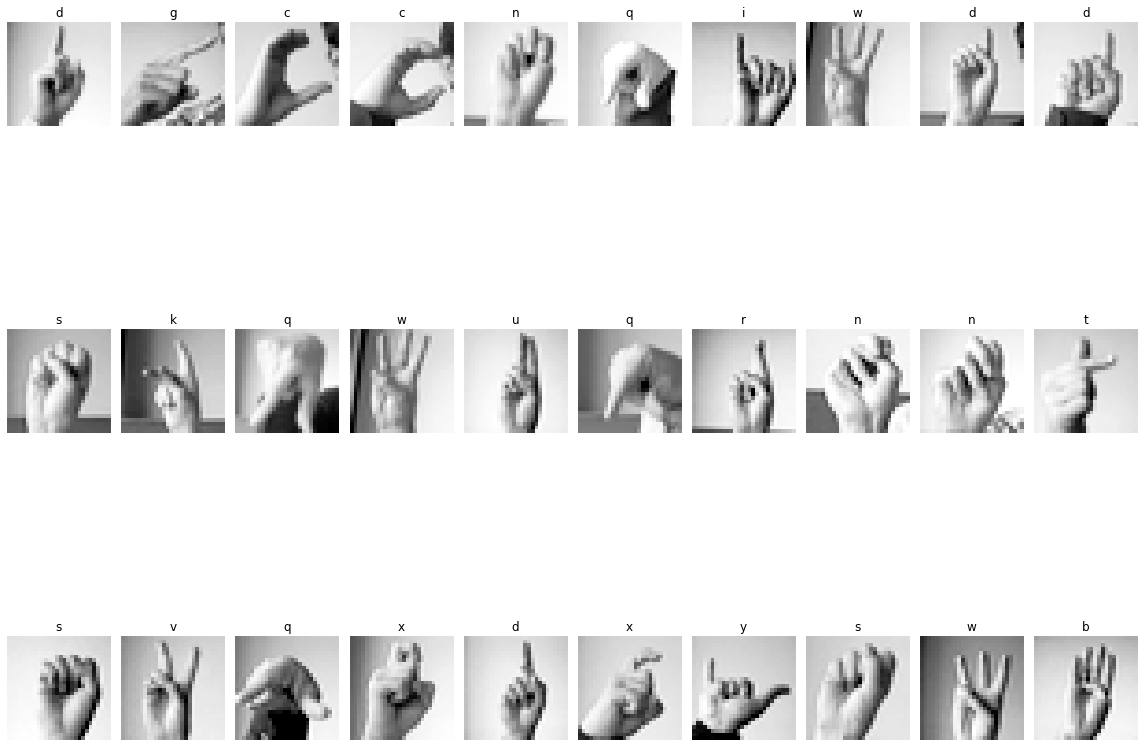

In [18]:
# 读取数据
test = pd.read_csv("dataset\sign_mnist_test.csv")
train = pd.read_csv("dataset\sign_mnist_train.csv")

# 输出基本信息
print("训练集维度", train.shape)
print("测试集维度", train.shape)

# 输出标签信息
labels = train["label"].value_counts().sort_index(ascending=True)
labels

# 切分特征与标签
train_x = train.drop(labels = "label", axis = 1)
train_y = train["label"]
test_x = test.drop(labels = "label", axis = 1)
test_y = test["label"]
train_x.head()

# 数据预处理与可视化

# 存储标签数据
test_classes= test_y
train_clasees = train_y

# 特征转为numpy格式
train_x = train_x.to_numpy()
test_x = test_x.to_numpy()

# 把数据转为3维图像数据（图片数量*宽*高，这里如果是灰度图，颜色通道为1，省略）
train_x = train_x.reshape(-1,28,28)
test_x = test_x.reshape(-1,28,28)

# 在训练集中取样30张图片，做可视化查看
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(3, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(30):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(train_x, train_y)

In [12]:
def create_model():
    model = tf.keras.models.Sequential([
    # 卷积层
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # 池化层
    tf.keras.layers.MaxPooling2D(2,2),
    # 卷积层
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # 池化层
    tf.keras.layers.MaxPooling2D(2,2),
    # 展平
    tf.keras.layers.Flatten(),
    # 全连接层
    tf.keras.layers.Dense(512, activation='relu'),
    # softmax分类
    tf.keras.layers.Dense(26, activation='softmax')])

    model.compile(
    optimizer='adam',  #优化器
    loss='sparse_categorical_crossentropy',  #损失函数
    metrics=['accuracy']) #评估准则
  
    return model

In [6]:
model = create_model()
print(model)

In [13]:
# 初始化模型
model = create_model()
# 拟合数据
history = model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y))

Epoch 1/20


858/858 [==============================] - 7s 7ms/step - loss: 0.5369 - accuracy: 0.9127 - val_loss: 0.5592 - val_accuracy: 0.8608
Epoch 2/20
858/858 [==============================] - 6s 7ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.6489 - val_accuracy: 0.8701
Epoch 3/20
858/858 [==============================] - 6s 7ms/step - loss: 2.4373e-04 - accuracy: 1.0000 - val_loss: 0.6744 - val_accuracy: 0.8735
Epoch 4/20
858/858 [==============================] - 6s 7ms/step - loss: 7.0659e-05 - accuracy: 1.0000 - val_loss: 0.6885 - val_accuracy: 0.8788
Epoch 5/20
858/858 [==============================] - 6s 7ms/step - loss: 3.8357e-05 - accuracy: 1.0000 - val_loss: 0.7123 - val_accuracy: 0.8787
Epoch 6/20
858/858 [==============================] - 6s 7ms/step - loss: 2.3409e-05 - accuracy: 1.0000 - val_loss: 0.7216 - val_accuracy: 0.8818
Epoch 7/20
858/858 [==============================] - 6s 7ms/step - loss: 1.4601e-05 - accuracy: 1.0000 - val_loss: 0.7460 - val_a

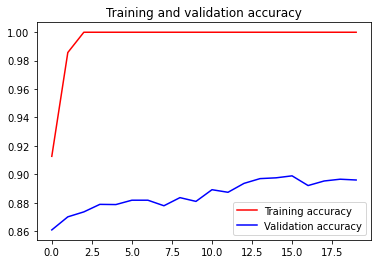

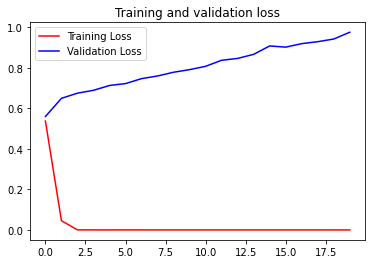

In [14]:
# 获取准确率与损失函数情况
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# matplotlib绘制训练过程中指标的变化状况
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Defining the identity block of the Resnet-50 Model. 
def identity_block(X, f, filters, training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # First Component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
   
    # Second Component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (1,1), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
   
    # Third Component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    
    # Adding the two tensors 
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Returning the last output
    return X

# Defining the Convolution Block of the Resnet-50 Model. 
def convolutional_block(X, f, filters, s=2,training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # First Component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    
    # Second Component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (s,s), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    
    # Third Component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    
    # Converting the Input Volume to the match the last output for addition. 
    X_shortcut =tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3)(X_shortcut, training = training)
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Adding the last two tensors
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    # Returning the output tensor
    return X

# Defining a modified Resnet-50 Model using the Identity and Convolution Blocks. 
def ResNet50(input_shape = (28, 28, 1), classes = 26):
    
    # Defining the input as a tensor with shape input_shape
    X_input = tf.keras.Input(input_shape)
    
    # Zero-Padding
    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = tf.keras.layers.Conv2D(64, (5, 5), strides = (1, 1))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    
    # Add an Average Pool Layer
    X = tf.keras.layers.AveragePooling2D((2,2))(X)

    # Output Layer
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax')(X)
    
    # Create Model
    model = tf.keras.Model(inputs = X_input, outputs = X)

    return model

In [20]:
# 初始化模型
model = ResNet50()

# 编译
model.compile(optimizer="adam",metrics=["accuracy"],loss = "sparse_categorical_crossentropy")

# 训练
history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs =10)

Epoch 1/10
858/858 [==============================] - 58s 64ms/step - loss: 0.8996 - accuracy: 0.9001 - val_loss: 0.7627 - val_accuracy: 0.8869
Epoch 2/10
858/858 [==============================] - 58s 68ms/step - loss: 0.0898 - accuracy: 0.9834 - val_loss: 0.4934 - val_accuracy: 0.9388
Epoch 3/10
858/858 [==============================] - 58s 67ms/step - loss: 0.0637 - accuracy: 0.9877 - val_loss: 0.8759 - val_accuracy: 0.9183
Epoch 4/10
858/858 [==============================] - 57s 67ms/step - loss: 0.0472 - accuracy: 0.9922 - val_loss: 1.0193 - val_accuracy: 0.9261
Epoch 5/10
858/858 [==============================] - 55s 65ms/step - loss: 0.0339 - accuracy: 0.9942 - val_loss: 0.5840 - val_accuracy: 0.9529
Epoch 6/10
858/858 [==============================] - 54s 63ms/step - loss: 0.0340 - accuracy: 0.9953 - val_loss: 0.6905 - val_accuracy: 0.9526
Epoch 7/10
858/858 [==============================] - 56s 65ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.2927 - val_accuracy:

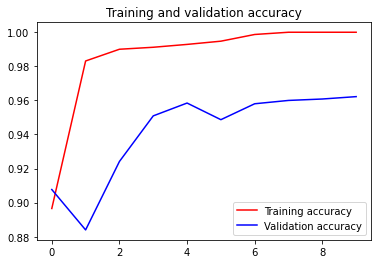

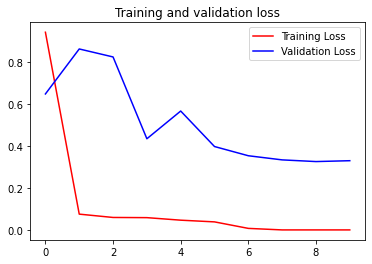

In [6]:
# 获取准确率与损失函数情况
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# matplotlib绘制训练过程中指标的变化状况
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
tf.keras.models.save_model(model,'model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [8]:
model=tf.keras.models.load_model('model')

In [9]:
import keras
import numpy as np
from PIL import Image
import string
import pandas as pd
import tensorflow as tf

In [10]:
import cv2
from matplotlib import pyplot as plt

In [11]:
dim = (28, 28) # 图像维度
letters = list(string.ascii_lowercase) # 识别的字母

In [26]:
frame=plt.imread('hand5.jpg')

In [27]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 转成灰度图
#img = cv2.GaussianBlur(img, (5, 5), 0) # 图像平滑
img = cv2.resize(img, dim) # 图像大小缩放

In [28]:
img.shape

(28, 28)

In [29]:
img = np.reshape(img, (1,img.shape[0],img.shape[1]))
img = tf.cast(img, tf.float32)


In [30]:
pred=model.predict(img)

1/1 [==============================] - 0s 25ms/step


In [31]:
# 结果输出
print(pred)
print(letters[np.argmax(pred[0])])

[[4.14103820e-18 0.00000000e+00 8.66807682e-19 4.73994728e-31
  7.33451976e-30 1.17750579e-12 1.07730826e-25 2.96610259e-17
  3.63294252e-15 1.97952144e-35 3.17794251e-32 1.49270780e-17
  1.02421695e-33 1.15436974e-23 3.14668132e-20 4.13444659e-15
  1.19686691e-29 1.37013594e-32 2.98585124e-20 1.68860152e-12
  8.24653184e-34 5.51412572e-16 6.94246648e-29 2.75679573e-22
  1.00000000e+00 4.20781892e-35]]
y


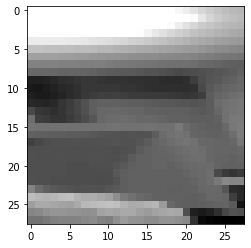

1/1 [==============================] - 0s 318ms/step
[[1.4252723e-07 5.8879782e-20 4.5840313e-24 2.2988318e-16 3.4190134e-10
  5.7994205e-14 3.1368740e-04 4.3929121e-03 1.2661331e-12 1.7092641e-26
  6.7692663e-10 7.0815695e-14 1.2666300e-13 6.9987825e-15 1.5878671e-14
  9.9529254e-01 2.1345317e-12 4.0101706e-20 5.8536895e-09 6.7259549e-07
  1.6202058e-20 2.3530755e-18 1.8528236e-23 3.7479820e-21 4.5814737e-11
  1.9529195e-26]]
p


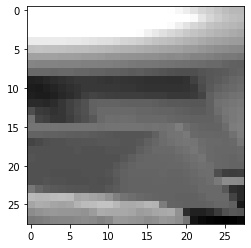

1/1 [==============================] - 0s 27ms/step
[[4.6296299e-07 1.0405420e-19 2.7820385e-23 4.8873801e-16 1.4947684e-09
  1.9238468e-13 1.1377448e-03 2.1270674e-03 1.4498690e-12 3.7093352e-26
  1.2364043e-09 1.3960651e-13 1.1419878e-12 1.2648599e-14 1.6925275e-14
  9.9673069e-01 2.4301312e-12 3.6966908e-19 1.3053557e-08 4.0248497e-06
  7.2499253e-20 3.7056157e-18 1.0358553e-22 5.7470073e-21 5.4036442e-10
  4.7571243e-26]]
p


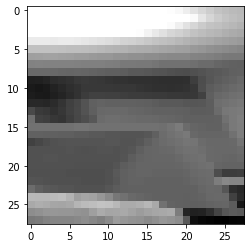

1/1 [==============================] - 0s 29ms/step
[[3.4614365e-07 2.3831583e-19 9.1479371e-24 1.8481526e-15 2.3392250e-09
  2.6503046e-13 1.0587961e-03 3.4328881e-03 3.3530624e-12 5.9115295e-26
  2.0382933e-09 9.6258647e-14 1.2777210e-12 1.1288404e-14 6.9180989e-14
  9.9550241e-01 6.4140008e-12 2.1466402e-19 3.1266264e-08 5.5828164e-06
  1.3363003e-19 2.2240792e-18 8.6704510e-23 1.0433984e-20 8.5489721e-10
  7.9856630e-26]]
p


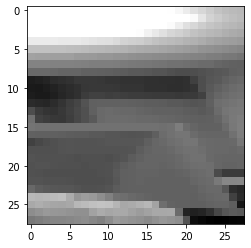

1/1 [==============================] - 0s 31ms/step
[[3.8937739e-07 3.9557398e-19 8.4749007e-24 1.2291884e-15 2.2244167e-09
  3.8263601e-13 6.6523976e-04 1.5808130e-03 1.8518121e-12 4.8431265e-26
  1.7574751e-09 5.3291688e-14 1.4924466e-12 1.3871085e-14 6.1408472e-14
  9.9773455e-01 1.3092326e-12 7.9252084e-20 1.5324767e-08 1.8898683e-05
  4.9014458e-20 9.8672628e-19 2.0593047e-22 9.4055630e-21 2.7490246e-10
  6.0101938e-26]]
p


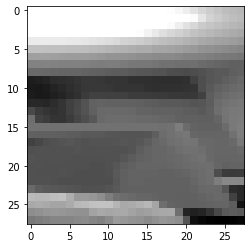

1/1 [==============================] - 0s 28ms/step
[[4.3340742e-07 3.2793896e-19 6.8059117e-24 1.1482379e-15 1.5188183e-09
  3.2123647e-13 5.4750830e-04 1.3317637e-03 3.0927810e-12 3.8286760e-26
  1.2747358e-09 6.2764870e-14 8.8645508e-13 1.5029332e-14 6.4313131e-14
  9.9811244e-01 1.6141490e-12 6.5860689e-20 3.0096174e-08 7.8567300e-06
  2.7210733e-20 4.9435715e-19 2.1885112e-22 1.3297674e-20 3.9487508e-10
  5.1796348e-26]]
p


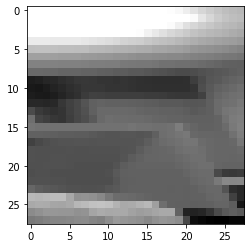

1/1 [==============================] - 0s 27ms/step
[[2.90715121e-07 1.78840132e-19 1.12448280e-23 9.12755610e-16
  7.77724274e-10 4.48915617e-13 6.42338826e-04 1.61208189e-03
  2.34747963e-12 4.50404140e-26 1.64967695e-09 3.85354861e-14
  3.54198962e-12 1.32855136e-14 6.87485686e-14 9.97727573e-01
  7.29403083e-13 1.23855304e-19 4.39474697e-08 1.77668753e-05
  2.51415295e-20 8.89052895e-19 2.24802008e-22 1.97042532e-20
  6.78593126e-10 5.86595737e-26]]
p


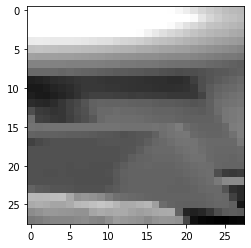

1/1 [==============================] - 0s 27ms/step
[[5.15472607e-07 2.42029713e-19 1.13009216e-23 5.89300144e-16
  1.06039022e-09 2.44380417e-13 4.90857870e-04 2.29654135e-03
  1.23038938e-12 4.95099643e-26 2.64406674e-09 7.00010796e-14
  2.69738528e-12 9.92214903e-15 5.19074902e-14 9.97181296e-01
  1.82914274e-12 1.57533213e-19 3.44061064e-08 3.07332011e-05
  4.43386095e-20 1.15132540e-18 2.95266143e-22 1.26671264e-20
  4.64354249e-10 6.34034935e-26]]
p


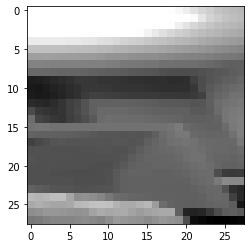

1/1 [==============================] - 0s 32ms/step
[[2.29979278e-07 1.41762188e-19 7.88987596e-24 5.47214730e-16
  7.37605532e-10 1.87341977e-13 4.90649370e-04 1.25082792e-03
  1.02597238e-12 3.41359250e-26 8.54697868e-10 4.74209837e-14
  2.34828194e-12 5.88607515e-15 3.63988997e-14 9.98241782e-01
  2.23313013e-12 1.00675635e-19 2.11660129e-08 1.65527526e-05
  3.35230550e-20 6.31441607e-19 1.73416934e-22 9.56444385e-21
  4.48133641e-10 4.08223193e-26]]
p


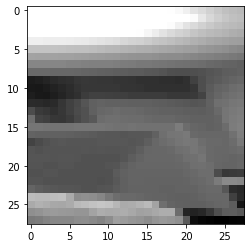

1/1 [==============================] - 0s 27ms/step
[[1.5741421e-07 5.7946212e-20 9.3795325e-24 1.1046439e-15 2.3356708e-10
  8.4079458e-14 9.5683639e-04 3.7982166e-03 8.4005914e-13 3.8771725e-26
  2.0979081e-09 7.2301384e-14 1.5359932e-12 1.1209662e-14 3.2793548e-14
  9.9522531e-01 3.0147143e-12 4.8364206e-19 2.9393798e-08 1.9309207e-05
  3.4654767e-20 1.1288856e-18 2.2498610e-23 1.1895728e-20 7.1242673e-10
  4.8827298e-26]]
p


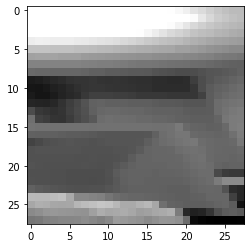

1/1 [==============================] - 0s 26ms/step
[[3.5229640e-08 6.4193326e-20 4.1796659e-24 1.5724632e-15 1.5637816e-10
  5.9374401e-14 1.0273263e-03 3.5936774e-03 6.9000600e-13 3.0808426e-26
  2.8602287e-09 3.0301770e-14 1.6999943e-12 9.1367276e-15 3.4684014e-14
  9.9535960e-01 1.9508306e-12 3.5959793e-19 2.4219236e-08 1.9388228e-05
  5.1868871e-20 4.9290343e-19 1.0471305e-23 1.1747068e-20 2.4594135e-10
  4.0955218e-26]]
p


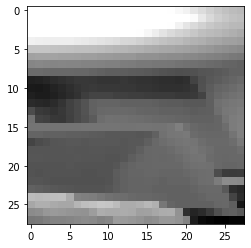

1/1 [==============================] - 0s 28ms/step
[[4.60699034e-08 3.41021073e-20 4.42430785e-24 2.59597218e-15
  1.00895396e-10 9.22040832e-14 1.01824116e-03 4.19008499e-03
  7.10964328e-13 2.86268594e-26 1.70062864e-09 4.81429404e-14
  1.19678193e-12 7.13265862e-15 2.56614019e-14 9.94780362e-01
  2.28044710e-12 1.52983771e-19 2.69421836e-08 1.12818498e-05
  1.98975825e-20 5.50844385e-19 1.38833114e-23 3.53463323e-20
  1.35849373e-10 3.69217626e-26]]
p


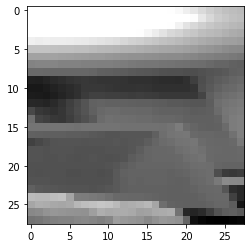

1/1 [==============================] - 0s 27ms/step
[[3.48501885e-08 4.21540837e-20 4.03710455e-24 1.32760482e-15
  1.20713273e-10 7.43299058e-14 4.63038479e-04 2.91444501e-03
  1.01074726e-12 2.51522722e-26 1.58893043e-09 1.89436530e-14
  2.35976473e-12 3.55187872e-15 2.26949942e-14 9.96593177e-01
  6.15513283e-13 5.38041245e-20 1.96201970e-08 2.92077439e-05
  1.33817725e-20 1.69077036e-19 2.88035141e-23 3.16976936e-20
  1.36033615e-10 3.09123404e-26]]
p


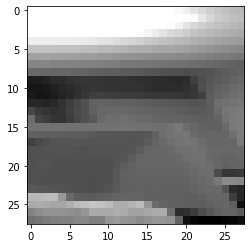

1/1 [==============================] - 0s 31ms/step
[[3.7415674e-08 3.8918690e-19 2.9222494e-24 8.8196662e-15 1.7585561e-10
  7.9944292e-13 1.0250618e-03 8.7731052e-04 3.9228541e-13 1.1971307e-25
  8.6873575e-10 5.4955078e-15 6.6171624e-11 1.4730154e-14 5.1956662e-14
  9.9759680e-01 6.9800550e-12 6.0883020e-18 4.2702013e-08 5.0082413e-04
  4.4173223e-19 1.8644422e-19 1.4987030e-21 4.9127672e-20 5.2243954e-10
  1.4279274e-25]]
p


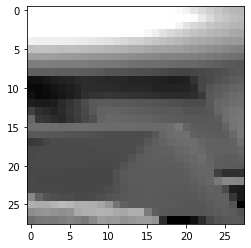

1/1 [==============================] - 0s 26ms/step
[[5.1809820e-07 2.0148561e-17 9.7387421e-27 1.2767784e-14 7.6313000e-10
  4.3957063e-14 7.7571050e-04 1.7351815e-05 1.2796980e-12 1.7240088e-25
  1.8425528e-10 3.1202073e-16 1.6726502e-10 3.9142496e-13 4.3603193e-13
  9.9826825e-01 6.0117689e-11 6.5066900e-17 5.5110131e-06 9.3217625e-04
  4.7164184e-17 2.5231067e-21 4.3873147e-21 3.2791113e-20 4.2643043e-07
  3.2377743e-25]]
p


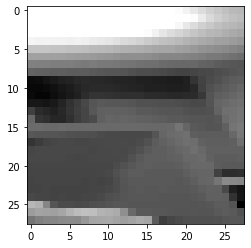

1/1 [==============================] - 0s 25ms/step
[[1.8656146e-06 3.7689533e-16 6.2259047e-26 1.5063829e-13 7.3502110e-10
  2.0924629e-13 2.2302575e-03 1.4145096e-06 3.1827541e-13 7.7928201e-25
  5.3749898e-09 2.7265898e-16 8.2029796e-09 1.3639309e-13 1.0796902e-11
  9.5412326e-01 2.3567983e-11 1.4329420e-16 6.6985429e-04 4.2903684e-02
  3.8811549e-15 2.5097005e-21 1.2889241e-22 3.7260225e-17 6.9697038e-05
  1.4461318e-24]]
p


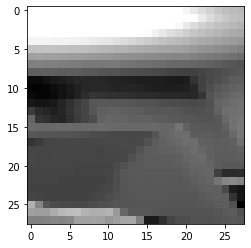

1/1 [==============================] - 0s 29ms/step
[[8.1000180e-06 3.8758258e-16 6.0963536e-28 6.3127921e-13 5.5805671e-10
  7.5101614e-14 3.7078364e-04 2.9390102e-07 5.2911804e-13 5.9528696e-25
  2.2288680e-09 1.6596553e-17 1.2357961e-08 2.0171931e-13 1.0303219e-11
  9.7409999e-01 2.0701317e-10 4.7066296e-17 7.1699737e-04 2.4273906e-02
  5.0901111e-16 4.0891964e-22 8.4437541e-22 1.8318158e-17 5.2998000e-04
  1.2801608e-24]]
p


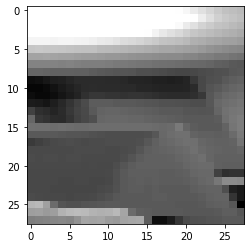

1/1 [==============================] - 0s 27ms/step
[[3.0991469e-06 2.3996263e-16 4.8265025e-27 4.8510485e-13 7.2978429e-10
  1.0658287e-14 4.1694712e-04 4.0125151e-06 3.1957480e-13 5.4484922e-25
  1.0320529e-08 1.2171714e-16 2.0700039e-09 1.1648787e-12 5.7666801e-12
  9.9174565e-01 5.9248384e-10 6.8633055e-17 3.2669838e-04 7.1142660e-03
  2.2366723e-16 7.3208862e-22 4.0514823e-23 9.3346521e-18 3.8927663e-04
  1.3042061e-24]]
p


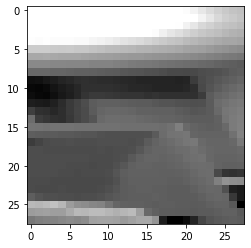

1/1 [==============================] - 0s 25ms/step
[[3.82317353e-07 2.80128251e-18 2.07853817e-26 9.69274455e-15
  1.44956380e-09 3.37089566e-17 1.89331069e-03 1.09578345e-04
  5.59381304e-14 2.37350349e-25 5.10301001e-09 1.79582504e-15
  4.35744690e-10 2.32144273e-13 8.96357505e-14 9.96272326e-01
  1.18373444e-08 1.41514080e-15 4.82326868e-06 1.66820397e-03
  2.56887861e-16 6.15970141e-21 1.00928963e-23 2.50451726e-20
  5.13501036e-05 4.04903370e-25]]
p


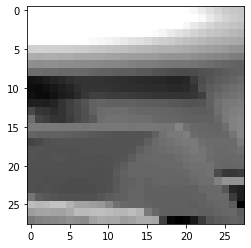

1/1 [==============================] - 0s 31ms/step
[[2.1009147e-07 3.5481102e-18 4.7721162e-27 4.6646951e-14 2.4050082e-09
  1.0557167e-16 1.0858117e-02 4.8675374e-04 2.5526573e-13 5.7697962e-25
  1.6682606e-08 1.0052533e-15 3.7977632e-10 3.1893463e-13 1.0832180e-13
  9.8389393e-01 2.2535991e-08 4.0742552e-15 1.1208279e-05 4.7046435e-03
  9.0631922e-16 9.4670110e-21 1.7164111e-23 3.9301542e-20 4.5108536e-05
  1.0688825e-24]]
p


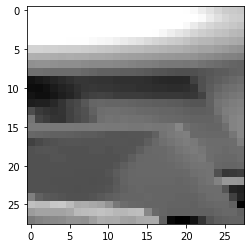

1/1 [==============================] - 0s 26ms/step
[[3.48654453e-07 1.97176035e-18 7.64645572e-27 2.89025429e-14
  1.94961913e-09 1.22288542e-16 9.78779141e-03 9.94823757e-04
  2.73674719e-13 7.15133521e-25 2.22574226e-08 8.76959627e-16
  6.23115559e-10 1.04649789e-13 6.39879656e-14 9.80190575e-01
  3.38176775e-08 7.89337775e-16 9.75637977e-06 9.00196750e-03
  6.30947166e-16 1.06488154e-20 8.19802239e-23 2.99069509e-20
  1.47255414e-05 1.05955922e-24]]
p


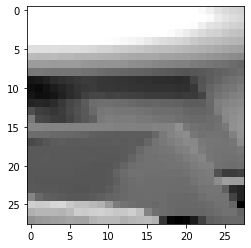

1/1 [==============================] - 0s 27ms/step
[[3.8279492e-07 6.7830518e-18 1.0909217e-26 2.7454791e-13 1.8334375e-09
  8.5297277e-17 4.9743403e-02 3.9063985e-03 1.6257457e-13 1.3897233e-24
  1.6474374e-07 9.2015743e-17 7.7977969e-10 8.1558871e-14 1.2107163e-14
  8.1121594e-01 1.4011632e-08 2.7818298e-16 1.5516744e-06 1.3512094e-01
  1.7702979e-15 2.7597429e-21 8.6029661e-23 8.3620877e-20 1.1223432e-05
  2.0186523e-24]]
p


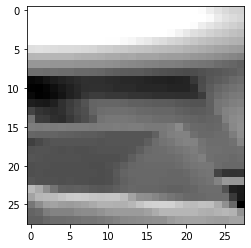

1/1 [==============================] - 0s 26ms/step
[[6.2814483e-11 1.2292262e-22 1.7511601e-21 1.1383456e-14 1.3151477e-14
  1.5461159e-17 5.6725501e-05 6.4187475e-02 5.8277120e-15 2.5680163e-27
  1.4105778e-08 1.8977318e-11 1.6799306e-12 3.4110414e-16 1.9655158e-18
  9.3575579e-01 5.6193283e-10 2.2477034e-20 4.8338694e-11 5.1728782e-10
  8.9077933e-21 4.6653384e-20 1.7211072e-28 7.9032630e-19 7.3237649e-12
  2.3987005e-27]]
p


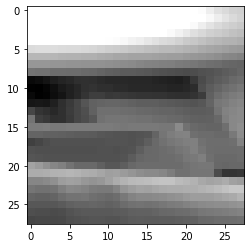

1/1 [==============================] - 0s 26ms/step
[[5.1492356e-07 4.7935407e-20 3.5119254e-22 1.1357296e-11 9.0412866e-14
  7.1637930e-15 1.1276000e-05 1.0656707e-05 2.8256059e-11 6.2292061e-25
  1.8458428e-07 1.4407549e-06 4.7005266e-10 5.8456271e-14 1.2126383e-15
  9.9995768e-01 1.6985219e-05 2.3720822e-17 6.6221133e-08 1.9128983e-09
  5.9541902e-23 1.6769385e-18 1.1286350e-24 1.2781623e-20 1.2528435e-06
  7.2037664e-25]]
p


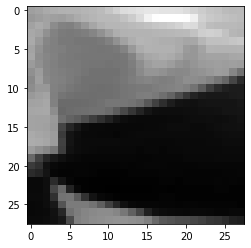

1/1 [==============================] - 0s 28ms/step
[[2.80222935e-07 2.20503460e-25 3.99099698e-10 7.36195368e-24
  5.95070935e-14 3.39197203e-13 9.13504380e-26 5.53716326e-08
  2.66576139e-03 6.76478055e-26 9.37427826e-12 1.34594488e-22
  2.26824852e-14 2.74332705e-20 2.53992782e-16 2.23209327e-08
  1.72059700e-14 1.17208106e-26 1.74568537e-08 9.97009516e-01
  1.25692957e-22 3.24201392e-04 8.07346801e-10 2.98632213e-13
  1.46930157e-17 7.26180976e-27]]
t


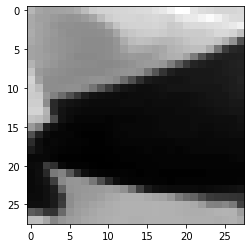

1/1 [==============================] - 0s 27ms/step
[[7.6761316e-05 1.1486586e-24 1.4156047e-06 7.9839886e-23 1.8359629e-18
  5.2287276e-13 1.3853844e-10 8.2653651e-07 2.4600413e-09 2.4406826e-28
  1.4557434e-06 6.5749277e-09 3.1814706e-10 8.2877358e-22 1.3676159e-21
  1.2198374e-10 9.0394177e-12 1.4067407e-35 1.2060220e-13 9.9966037e-01
  2.4486110e-27 2.5923626e-04 4.8613153e-17 1.3187133e-16 2.7523996e-24
  1.3303924e-28]]
t


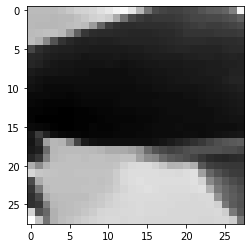

1/1 [==============================] - 0s 28ms/step
[[5.8303921e-23 2.5740199e-38 2.7843531e-34 1.7649686e-33 5.9593638e-34
  7.4849485e-37 0.0000000e+00 8.5025978e-18 8.8986899e-18 0.0000000e+00
  5.2759732e-21 1.0946377e-23 3.3052688e-32 5.3102663e-33 1.1452593e-31
  5.1329306e-24 1.0000000e+00 2.2701304e-27 2.5367351e-30 1.0604337e-30
  7.4112216e-29 4.0370745e-13 6.9452592e-33 0.0000000e+00 1.2294566e-25
  0.0000000e+00]]
q


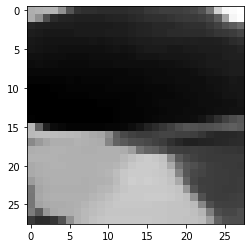

1/1 [==============================] - 0s 25ms/step
[[4.20226792e-28 0.00000000e+00 0.00000000e+00 2.80176278e-34
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.30475969e-23
  1.18337707e-32 0.00000000e+00 2.95487921e-23 8.50453917e-27
  9.18924973e-35 5.37490155e-37 0.00000000e+00 1.20618199e-34
  1.00000000e+00 3.79698722e-26 3.78904975e-30 4.82412550e-34
  1.72422395e-30 1.04380213e-22 4.36438581e-36 0.00000000e+00
  1.73728754e-25 0.00000000e+00]]
q


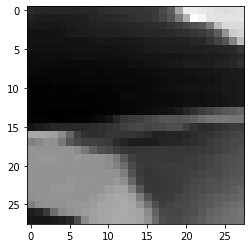

1/1 [==============================] - 0s 28ms/step
[[3.04405664e-20 2.07612874e-34 8.71150635e-33 3.32777055e-35
  0.00000000e+00 1.15356930e-37 0.00000000e+00 2.40735250e-17
  1.34450815e-30 0.00000000e+00 1.97144352e-27 6.25313741e-32
  2.85362721e-24 6.02594462e-22 5.69306371e-26 4.96628070e-33
  1.00000000e+00 6.94901380e-28 5.34841995e-20 2.05991373e-30
  1.10661693e-29 1.43803669e-20 8.02602001e-35 0.00000000e+00
  3.24948062e-27 0.00000000e+00]]
q


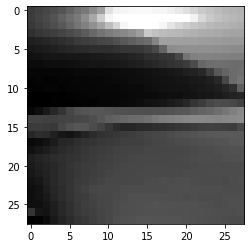

1/1 [==============================] - 0s 29ms/step
[[8.0530494e-01 5.8474303e-22 6.3104497e-33 1.5973301e-23 1.2442551e-20
  3.4580166e-23 3.2679675e-32 4.1954196e-12 1.2615958e-04 1.7861175e-28
  1.8751340e-16 3.8407180e-25 5.3908469e-09 9.3004916e-16 1.4645736e-01
  2.9356736e-06 3.7486717e-14 0.0000000e+00 7.2524774e-05 4.8036054e-02
  4.2520441e-28 1.1663661e-13 3.3370447e-22 2.6119336e-29 1.6284246e-23
  2.6192572e-29]]
a


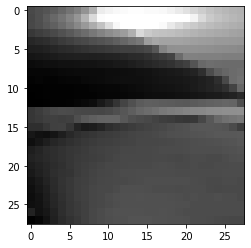

1/1 [==============================] - 0s 27ms/step
[[1.61854496e-05 7.15539097e-30 3.76976762e-35 1.91600093e-28
  1.30315162e-25 4.10950728e-25 7.82074816e-35 9.81714230e-17
  2.73848020e-08 4.53728653e-32 1.95745193e-22 4.14280283e-30
  1.32642005e-14 1.61385677e-16 6.32108524e-02 1.11700738e-09
  1.09192726e-24 0.00000000e+00 1.08795710e-08 9.36772943e-01
  3.03338498e-34 6.60692058e-19 1.40830654e-25 1.34461778e-29
  1.80114078e-26 9.35215371e-33]]
t


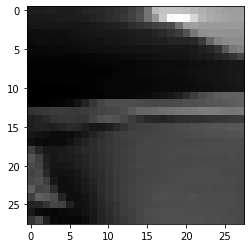

1/1 [==============================] - 0s 25ms/step
[[1.15629128e-14 8.62765871e-19 4.29684520e-23 1.43532156e-22
  2.84930569e-25 2.56853080e-26 4.17666528e-27 7.84036940e-18
  4.74346993e-24 3.41569694e-30 1.51096107e-30 2.49772193e-28
  8.90032113e-01 7.83889860e-08 5.34300161e-05 2.92044950e-17
  1.09914303e-01 1.19135365e-30 1.39984691e-10 7.23921227e-19
  3.42647432e-16 3.71039877e-19 1.35206633e-17 8.06286719e-28
  1.32449490e-24 1.81826162e-30]]
m


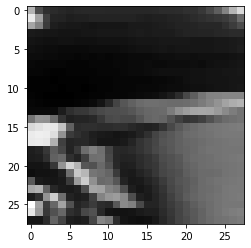

1/1 [==============================] - 0s 28ms/step
[[2.45628996e-07 5.50234256e-27 2.51426404e-16 7.25025584e-21
  3.78936996e-19 8.68153065e-20 3.29675361e-16 9.79939103e-01
  1.10524673e-10 4.69868497e-29 3.39107054e-09 1.32602405e-27
  1.24362527e-17 3.16582074e-13 8.02856844e-16 6.64201210e-25
  1.37380612e-05 3.34055254e-25 2.79092393e-17 6.70742462e-10
  5.47833965e-20 5.56260333e-13 2.63036300e-19 6.30875006e-29
  2.00469419e-02 7.30149172e-29]]
h


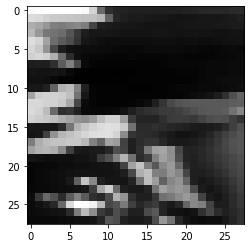

1/1 [==============================] - 0s 25ms/step
[[7.5541482e-22 9.6860909e-34 1.0418374e-25 3.4545319e-30 4.4133559e-32
  1.0893225e-34 3.8179671e-11 4.1620311e-25 2.2636846e-26 0.0000000e+00
  3.5669582e-04 5.1747966e-24 2.5911815e-19 1.2326379e-33 1.7837071e-33
  3.1620432e-19 9.9964333e-01 7.5201723e-35 2.7193512e-33 2.2554161e-28
  6.2888132e-33 5.1825381e-25 7.6257467e-23 0.0000000e+00 1.2256089e-11
  0.0000000e+00]]
q


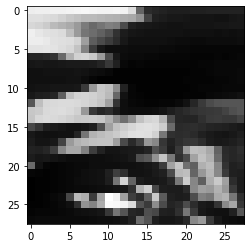

1/1 [==============================] - 0s 28ms/step
[[3.4597634e-29 7.1148150e-34 5.9016818e-24 1.8314259e-23 1.9435415e-32
  6.1748925e-31 6.4661386e-19 1.7936757e-22 7.5423755e-25 0.0000000e+00
  3.5421677e-10 3.1555832e-12 3.2745920e-27 2.1074173e-25 5.0025385e-34
  1.0178149e-08 1.0000000e+00 4.5280994e-33 9.6744878e-32 1.3329378e-35
  0.0000000e+00 4.2895930e-23 6.8906538e-27 1.4269759e-36 2.2554781e-08
  0.0000000e+00]]
q


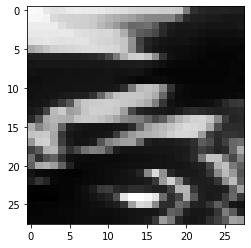

1/1 [==============================] - 0s 27ms/step
[[2.2613497e-19 6.9012227e-29 2.1848266e-22 9.4337485e-22 1.3415322e-29
  6.0860811e-21 5.9795398e-26 1.2405700e-18 2.4273662e-22 0.0000000e+00
  1.4140920e-14 9.6256714e-10 5.3526050e-27 4.1003649e-22 2.7395370e-24
  1.0000000e+00 1.9296351e-20 4.8049502e-27 3.4320970e-19 1.1137983e-24
  1.1835011e-36 1.2101555e-25 7.0615454e-27 8.8929051e-29 5.5399745e-16
  0.0000000e+00]]
p


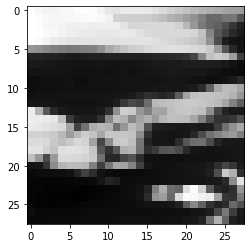

1/1 [==============================] - 0s 32ms/step
[[1.1963465e-07 2.1159235e-30 3.6015591e-15 5.0849693e-28 3.4032630e-21
  1.0696051e-08 7.7700986e-13 4.1938137e-09 7.4892252e-13 2.1269037e-31
  3.2668081e-23 1.8522953e-10 1.0406500e-10 4.0135342e-14 2.8414624e-05
  8.0910813e-06 5.2700325e-05 9.5918342e-23 4.8147098e-13 1.7150982e-09
  9.4690603e-31 2.5543566e-14 3.2317768e-17 6.7774866e-24 9.9991071e-01
  7.4374562e-31]]
y


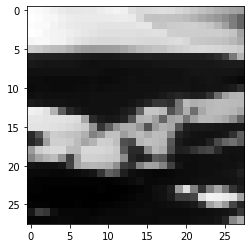

1/1 [==============================] - 0s 26ms/step
[[5.2325369e-04 1.0564012e-29 3.2005918e-20 1.7974592e-28 9.5536502e-17
  1.9824964e-16 9.0592869e-21 1.9269106e-09 9.6339831e-13 1.5252729e-30
  6.3206568e-15 1.3405212e-20 6.9660480e-08 1.8511287e-08 1.0534017e-13
  2.6494291e-09 2.2872625e-06 1.5787369e-20 1.0459480e-09 3.3828025e-12
  3.8471323e-32 4.1428588e-10 1.9118938e-16 1.0135235e-29 9.9947435e-01
  1.0215931e-30]]
y


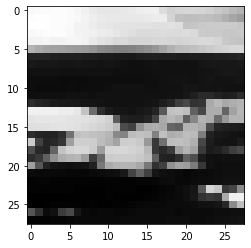

1/1 [==============================] - 0s 27ms/step
[[1.4905237e-09 7.6196642e-25 4.7782652e-23 2.4080754e-24 1.3294314e-13
  6.5636101e-11 1.2025351e-14 2.7805796e-12 2.6026499e-11 3.4034920e-31
  4.0170419e-14 6.1633002e-17 1.9762769e-13 5.5578368e-14 1.5315174e-14
  1.5793988e-05 3.1836259e-07 3.1321851e-28 6.7975918e-07 3.0818503e-12
  2.5191533e-36 2.0076371e-16 1.1602499e-13 2.6033409e-33 9.9998319e-01
  1.3017235e-31]]
y


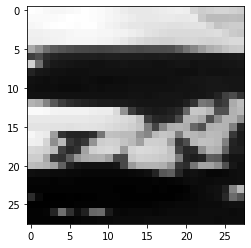

1/1 [==============================] - 0s 31ms/step
[[4.4509786e-08 4.9311414e-25 2.0070419e-21 1.3563660e-28 6.4621324e-19
  6.7219443e-17 3.5624482e-17 8.0852924e-10 2.4679547e-10 2.6301636e-32
  3.4116779e-10 8.5890519e-22 8.8686864e-17 2.1327275e-17 1.0870051e-14
  9.3229928e-06 1.6541639e-08 7.8365371e-32 7.3499464e-13 1.0545815e-24
  5.4789424e-35 1.6131212e-14 3.6019646e-18 1.9364695e-33 9.9999058e-01
  5.8477014e-34]]
y


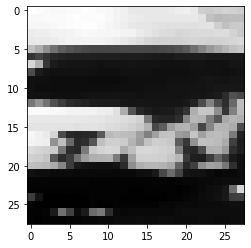

1/1 [==============================] - 0s 25ms/step
[[8.53381607e-06 3.03423830e-24 1.33922092e-19 3.11602561e-28
  1.53941389e-17 1.18521127e-14 9.32975888e-17 5.13170928e-09
  1.41178691e-09 7.21969399e-31 3.44827744e-09 1.28139292e-20
  1.84227760e-15 3.09941187e-16 3.14813313e-14 8.72800360e-04
  3.13514465e-05 3.49848334e-30 4.51819311e-12 9.81849871e-26
  3.19283367e-33 9.21076366e-13 3.13431581e-19 3.21643043e-31
  9.99087334e-01 1.06496725e-32]]
y


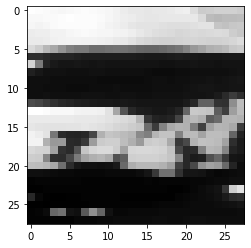

1/1 [==============================] - 0s 29ms/step
[[2.09558024e-08 3.01656836e-25 1.30473817e-21 1.84827717e-28
  1.26715063e-20 1.93518004e-16 2.54004088e-17 1.13947435e-10
  1.94790061e-12 6.45073610e-33 1.88777022e-10 1.86346929e-21
  3.70740259e-16 1.10313199e-18 4.18783578e-17 2.02824449e-05
  2.82735986e-08 2.87132363e-32 1.22404282e-14 5.37303886e-26
  1.85300785e-35 6.49984430e-17 2.24206457e-18 7.77691855e-33
  9.99979734e-01 2.23255581e-34]]
y


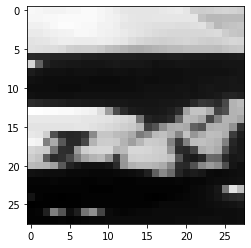

1/1 [==============================] - 0s 35ms/step
[[4.1283343e-10 5.5731104e-29 3.2683055e-25 2.9969966e-30 3.6251481e-23
  1.1608111e-18 8.5678427e-19 2.0008626e-12 1.0433769e-13 1.4256870e-35
  4.2026889e-11 3.8327044e-23 1.1004896e-18 3.3345668e-21 3.3911509e-21
  2.9086948e-09 6.1022753e-13 3.5565525e-37 1.3428936e-15 6.5513049e-25
  0.0000000e+00 4.3299751e-21 5.8616635e-21 6.1527240e-37 1.0000000e+00
  8.5332225e-37]]
y


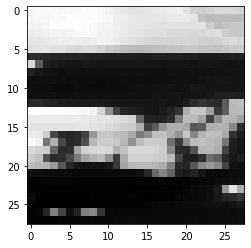

1/1 [==============================] - 0s 27ms/step
[[1.2491917e-10 2.6692586e-29 5.0861271e-26 7.2619925e-31 2.8846559e-24
  1.3376612e-18 1.1239850e-19 5.7529410e-13 7.8920926e-14 2.7204524e-36
  7.4671753e-12 2.4069046e-23 1.1197567e-19 1.3653481e-22 5.8477918e-22
  6.3455535e-10 8.1004446e-15 2.4261249e-38 3.5735778e-15 1.0210343e-24
  0.0000000e+00 1.4806021e-22 6.6562856e-22 1.1218287e-37 1.0000000e+00
  1.7895890e-37]]
y


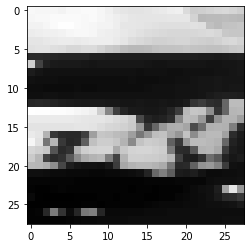

1/1 [==============================] - 0s 24ms/step
[[4.8471466e-11 8.3656553e-29 3.5821157e-26 7.9151197e-31 8.4473545e-24
  1.5426249e-18 9.1778280e-20 8.6047825e-13 4.0840998e-14 3.2213137e-36
  1.7199998e-11 2.5749725e-23 8.2225921e-20 4.5038309e-23 1.0271614e-21
  5.0408244e-10 1.6558224e-14 5.2917099e-38 7.0306242e-15 2.5970186e-24
  0.0000000e+00 2.0573226e-22 2.0444383e-21 2.4867493e-38 1.0000000e+00
  2.3178091e-37]]
y


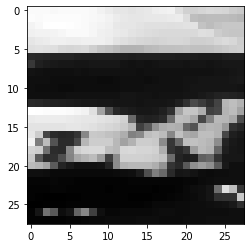

1/1 [==============================] - 0s 25ms/step
[[7.43254677e-12 5.54728183e-27 2.09376996e-26 1.18820534e-29
  4.83478667e-21 4.89063610e-15 1.12099293e-17 3.32798632e-12
  2.40159590e-14 8.10604804e-36 1.84331513e-13 4.86614693e-22
  6.29501054e-20 3.57727374e-23 7.52038750e-20 3.76697473e-09
  3.80357477e-15 3.93472017e-36 9.37038099e-13 2.04125092e-21
  0.00000000e+00 3.11502594e-24 5.54808752e-19 1.43475340e-37
  1.00000000e+00 1.77413964e-36]]
y


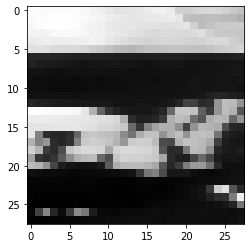

1/1 [==============================] - 0s 28ms/step
[[9.48405764e-12 7.48584086e-27 2.20958322e-24 1.01852685e-28
  1.84461580e-21 9.78233777e-15 5.72056142e-17 2.89870124e-14
  1.24073776e-14 1.93712070e-35 6.67817039e-14 1.87738560e-20
  1.65527956e-17 1.78748783e-21 6.07777676e-20 1.96866338e-07
  2.27624726e-16 1.13932689e-34 8.91699149e-13 2.36472487e-20
  0.00000000e+00 2.36044916e-23 2.70173814e-17 6.42305576e-37
  9.99999762e-01 5.54249640e-36]]
y


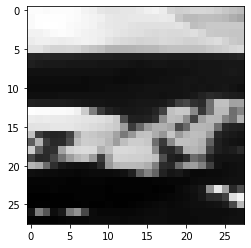

1/1 [==============================] - 0s 28ms/step
[[2.12784339e-13 4.55619654e-28 3.79294831e-26 2.56006886e-28
  1.99374479e-21 3.03344585e-15 7.59474639e-18 3.11408931e-15
  1.44443512e-14 7.76138656e-36 1.21531080e-15 6.38236688e-22
  3.18462571e-19 7.46781500e-20 1.14606171e-19 1.03060245e-08
  1.67208687e-15 2.65104540e-35 5.33964747e-11 1.41789527e-17
  0.00000000e+00 1.46823398e-22 7.66963254e-17 3.80165968e-38
  1.00000000e+00 2.17199755e-36]]
y


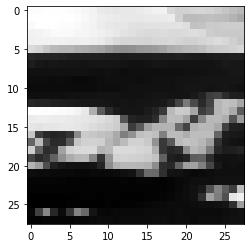

1/1 [==============================] - 0s 26ms/step
[[6.7099768e-14 1.7882662e-28 4.7037927e-25 5.5195401e-29 7.3403474e-21
  3.3920166e-14 2.5945127e-17 3.4343434e-15 3.0820815e-14 1.2098173e-35
  1.0512021e-15 4.5441645e-22 7.3414396e-21 2.4911013e-20 1.8710104e-18
  2.4176239e-09 2.2200268e-16 3.1280835e-35 1.8312631e-10 3.2751313e-18
  0.0000000e+00 1.1998562e-22 1.5602985e-16 5.0924055e-38 1.0000000e+00
  2.6216084e-36]]
y


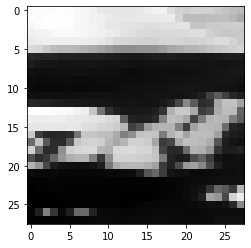

1/1 [==============================] - 0s 27ms/step
[[9.6364519e-14 2.2950758e-28 6.5354329e-24 7.3474342e-29 4.4197766e-20
  5.2246290e-14 3.4707426e-17 2.9612682e-14 3.3878008e-14 2.7258658e-35
  2.6806667e-14 1.3281661e-21 6.9333108e-21 1.6075968e-20 8.2384542e-18
  7.2796715e-09 2.2416248e-16 2.1981965e-35 3.4762607e-10 4.9637206e-19
  0.0000000e+00 2.7494337e-22 6.7173212e-16 1.1790079e-37 1.0000000e+00
  5.5155850e-36]]
y


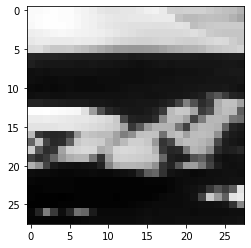

1/1 [==============================] - 0s 29ms/step
[[3.1138297e-14 1.1919512e-28 2.6846850e-24 3.8090371e-29 3.7120821e-21
  3.9371508e-14 9.3028297e-18 3.5477839e-15 1.2711332e-14 7.5138748e-36
  1.5600850e-15 7.1060691e-22 1.9959896e-21 1.0869041e-20 2.3630869e-18
  2.5968403e-09 4.8903695e-17 2.3938511e-35 1.4342774e-10 3.1187793e-19
  0.0000000e+00 2.5113922e-23 5.8585682e-17 6.7702665e-38 1.0000000e+00
  1.5734803e-36]]
y


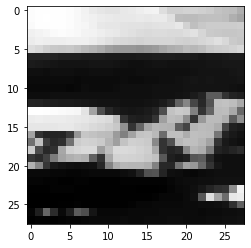

1/1 [==============================] - 0s 26ms/step
[[1.7590337e-14 8.1698701e-29 1.4114414e-24 4.8816919e-29 1.8060628e-21
  3.1262790e-14 1.7236688e-18 1.0225201e-15 3.1657745e-14 6.4832976e-36
  4.7117161e-16 2.1678491e-22 5.3979765e-22 4.8905861e-20 2.6971653e-18
  5.7289173e-09 2.1861661e-17 7.7609130e-36 1.2298045e-09 5.6983640e-19
  0.0000000e+00 6.3375280e-23 2.2128135e-17 3.7361299e-38 1.0000000e+00
  1.0668410e-36]]
y


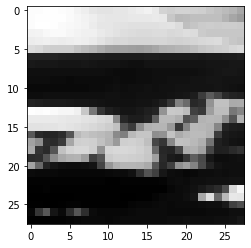

1/1 [==============================] - 0s 27ms/step
[[9.43867787e-15 3.95458087e-29 2.06480516e-24 5.72533598e-27
  6.52005989e-19 1.62953960e-13 5.14737745e-18 4.21142399e-16
  4.51912474e-14 4.23538851e-35 1.09653054e-16 6.78321929e-22
  1.93583631e-19 2.82430853e-18 2.43838816e-17 5.91601967e-08
  9.15158484e-17 2.22966611e-33 8.76251036e-08 2.49049656e-17
  0.00000000e+00 3.95894377e-21 7.96666664e-18 3.64375559e-37
  9.99999881e-01 8.70920134e-36]]
y


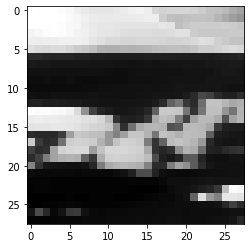

1/1 [==============================] - 0s 25ms/step
[[8.23217938e-15 3.62283668e-31 2.00223902e-24 1.12073402e-28
  2.55390237e-21 9.02223771e-13 3.05634530e-18 5.18606708e-17
  3.27835686e-13 1.39097185e-35 1.55682412e-18 4.41641380e-23
  1.19280207e-19 1.42868286e-17 1.22169479e-18 1.25368445e-08
  3.80444856e-20 1.29041132e-33 5.18555908e-07 7.13762636e-17
  0.00000000e+00 4.20439709e-21 7.38202242e-19 1.37963614e-36
  9.99999523e-01 3.44283132e-36]]
y


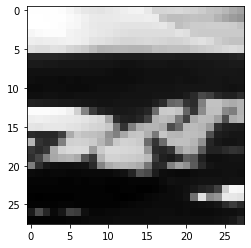

1/1 [==============================] - 0s 28ms/step
[[2.2445526e-14 2.9255931e-31 2.7392643e-24 1.5459629e-28 9.8894289e-21
  7.6511757e-13 2.4192355e-18 4.9011996e-17 3.9594573e-13 1.4319655e-35
  2.2236758e-19 5.1982131e-23 1.3393602e-19 1.1826634e-17 5.7584768e-19
  2.5388387e-08 4.9644931e-20 2.8749635e-33 4.0262194e-07 5.8638205e-17
  0.0000000e+00 8.9489189e-21 6.0968210e-19 2.0142627e-36 9.9999964e-01
  3.6970589e-36]]
y


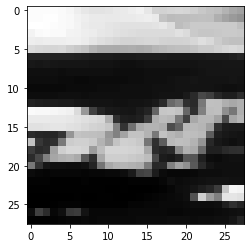

1/1 [==============================] - 0s 25ms/step
[[7.1201742e-15 3.5362686e-31 2.1792217e-24 1.2743451e-28 1.7500680e-21
  1.0415038e-12 2.0733505e-18 4.2448560e-17 4.3944966e-13 1.1515299e-35
  4.4597975e-19 2.8756138e-23 3.5605996e-20 9.0670691e-18 9.6579530e-19
  1.9230324e-08 1.4371312e-20 4.8324481e-34 4.9804015e-07 1.0522202e-16
  0.0000000e+00 5.3282338e-21 1.7433807e-18 1.4087804e-36 9.9999952e-01
  2.8414755e-36]]
y


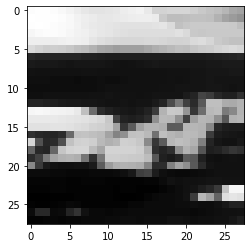

1/1 [==============================] - 0s 28ms/step
[[1.5570507e-13 2.8464426e-29 2.3958820e-24 7.0158917e-28 2.1445000e-19
  3.8827275e-12 7.4669673e-17 5.3688892e-16 1.1705009e-12 9.6667570e-35
  3.6310112e-17 5.9126586e-22 3.7338550e-19 8.2468193e-17 7.2187002e-18
  2.3089417e-08 1.2223573e-17 4.3689033e-33 6.1200188e-07 1.6158694e-15
  0.0000000e+00 2.7379009e-20 5.7904873e-17 6.0281752e-36 9.9999940e-01
  3.1781662e-35]]
y


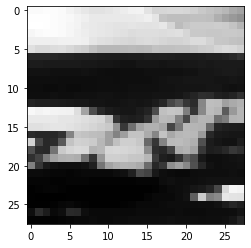

1/1 [==============================] - 0s 25ms/step
[[8.25722628e-13 3.17664992e-29 1.02772424e-24 1.88645235e-28
  6.96156496e-20 2.57823971e-12 1.94584826e-17 1.32780951e-16
  7.26175196e-13 3.48611647e-35 9.33969630e-19 1.66594953e-22
  1.07414810e-18 5.74689686e-17 2.69024804e-19 1.91153209e-08
  2.55726893e-19 4.80192969e-33 1.14618665e-07 4.29989632e-16
  0.00000000e+00 6.08619663e-21 2.17137061e-18 6.56182198e-36
  9.99999881e-01 1.28511494e-35]]
y


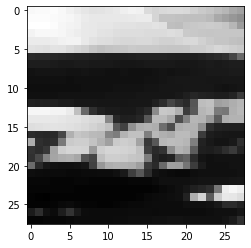

1/1 [==============================] - 0s 24ms/step
[[4.1980395e-12 1.9109232e-31 3.6578716e-25 1.1969268e-28 1.5498084e-19
  2.1341344e-14 8.6175676e-19 4.4223299e-17 2.1806317e-13 4.3911573e-35
  1.9704740e-19 2.1402634e-23 2.7373336e-16 2.9106087e-17 7.3246604e-20
  3.2532014e-08 2.8385340e-18 5.1620151e-30 8.1658706e-09 1.4597671e-15
  0.0000000e+00 1.3258084e-19 5.7542411e-19 2.4363476e-36 1.0000000e+00
  1.6528043e-35]]
y


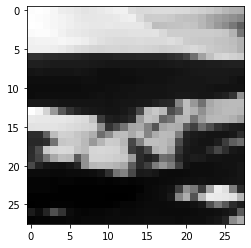

1/1 [==============================] - 0s 26ms/step
[[6.2900972e-07 9.4988761e-30 7.2118512e-22 5.5813467e-25 1.9567266e-18
  2.1198490e-15 1.7450005e-20 6.5749560e-13 2.6432181e-10 1.0005207e-31
  4.6136495e-18 6.3987095e-23 4.4205990e-07 3.1257284e-12 1.7038576e-14
  3.0324319e-09 1.2008059e-12 2.8023382e-24 5.6312371e-07 9.6326321e-14
  2.8723259e-35 8.1658218e-14 1.1721873e-18 6.2310834e-30 9.9999833e-01
  7.6724881e-32]]
y


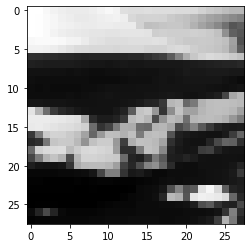

1/1 [==============================] - 0s 27ms/step
[[2.11680851e-09 2.25666647e-30 5.44652745e-20 1.83603277e-26
  5.35996906e-24 2.94460350e-17 2.87108009e-21 4.46935509e-11
  8.94041924e-11 7.93772985e-33 2.71567779e-17 7.81598841e-23
  3.02167957e-10 7.10764086e-11 8.87846044e-15 2.60083760e-11
  1.32252792e-15 1.05478156e-22 3.09104342e-09 1.46516344e-13
  9.63667672e-36 2.66905768e-12 1.43098304e-20 1.71437293e-30
  1.00000000e+00 6.03069487e-33]]
y


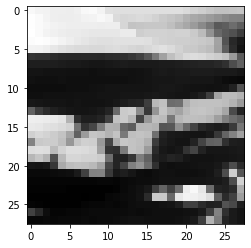

1/1 [==============================] - 0s 26ms/step
[[1.09955768e-11 9.02046594e-33 9.43787271e-18 7.91953768e-29
  1.45515972e-28 1.34481965e-17 2.15991251e-18 1.61757968e-10
  8.53757169e-14 3.12154063e-34 9.77423479e-17 1.32314663e-18
  5.26569240e-12 1.65289895e-12 3.25665567e-14 2.26409065e-11
  6.79922876e-15 7.52434343e-21 1.67176481e-11 3.99951204e-13
  4.55891061e-35 2.51393524e-13 2.62313622e-23 4.18795723e-30
  1.00000000e+00 6.52135384e-34]]
y


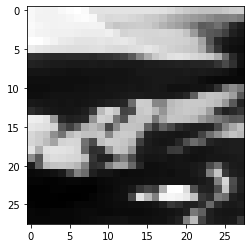

1/1 [==============================] - 0s 26ms/step
[[5.19937898e-18 1.10240865e-35 4.45443677e-22 2.82344095e-30
  1.46292802e-30 1.01407049e-17 5.03177212e-15 1.04747546e-15
  1.16324846e-19 1.56167624e-36 1.14257571e-16 1.26623303e-14
  4.34547192e-17 9.97681035e-21 1.11412789e-12 1.39711720e-09
  2.09624905e-17 2.98727078e-23 3.58551207e-15 2.63576646e-14
  7.16521975e-37 5.41389155e-16 5.93364040e-26 1.09406793e-27
  1.00000000e+00 6.47944052e-36]]
y


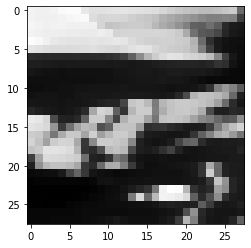

1/1 [==============================] - 0s 25ms/step
[[1.0041265e-18 1.0669348e-35 6.6085662e-22 2.0735049e-30 2.7364915e-28
  2.8743316e-15 4.2895968e-13 1.3360753e-17 1.3370253e-22 8.2655704e-37
  5.9889899e-18 7.6753348e-14 2.1956059e-20 6.1693580e-23 9.0523475e-14
  3.7119725e-07 2.0786748e-16 1.0617443e-23 1.4506067e-16 5.2160128e-15
  1.5380088e-37 4.0509496e-17 7.5514961e-26 1.6971845e-26 9.9999964e-01
  2.4312219e-36]]
y


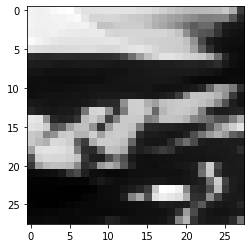

1/1 [==============================] - 0s 25ms/step
[[4.4508573e-20 1.7459605e-37 2.4568506e-22 1.0110702e-30 4.9631470e-29
  1.9827684e-15 2.2460781e-14 1.2284951e-18 3.2361751e-24 6.2422034e-38
  2.4780041e-19 6.6676712e-14 2.4845504e-22 2.6632439e-24 1.9065419e-14
  1.4606218e-08 1.1150434e-17 3.1772729e-26 2.6225027e-18 3.8461773e-16
  0.0000000e+00 1.3654915e-18 6.5867276e-28 2.8998993e-27 1.0000000e+00
  9.3470223e-38]]
y


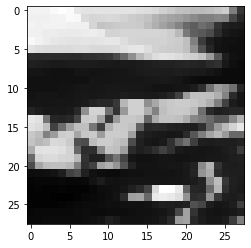

1/1 [==============================] - 0s 24ms/step
[[1.8652424e-21 3.6267944e-38 1.2247073e-22 2.2021384e-30 1.3293468e-29
  1.0088009e-15 1.4595674e-14 1.1148389e-18 2.5622123e-25 3.2350539e-38
  4.3352022e-19 2.9526522e-13 3.6483438e-23 1.3262851e-25 6.5266925e-15
  4.4227047e-08 5.0242276e-18 1.8616056e-26 3.1151407e-19 4.6945977e-17
  0.0000000e+00 7.5907159e-19 9.6938969e-29 1.6527100e-27 1.0000000e+00
  3.9379889e-38]]
y


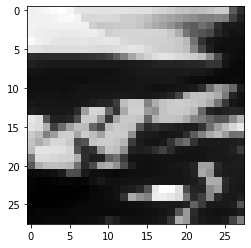

1/1 [==============================] - 0s 27ms/step
[[3.9409514e-22 0.0000000e+00 2.0559329e-23 1.8688876e-30 6.9473635e-30
  1.2463866e-16 3.6557281e-15 3.4767285e-19 2.9315775e-26 0.0000000e+00
  4.2991360e-19 7.1605760e-14 3.8053423e-24 8.6546284e-27 6.8640374e-16
  9.3049115e-09 1.6162501e-18 2.8974888e-27 8.8764054e-20 2.7318750e-18
  0.0000000e+00 1.2613606e-19 3.2819420e-29 4.5773803e-28 1.0000000e+00
  0.0000000e+00]]
y


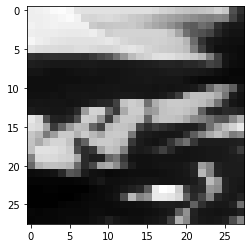

1/1 [==============================] - 0s 35ms/step
[[2.5357582e-22 0.0000000e+00 1.3026049e-23 6.4811417e-30 2.3309413e-29
  2.2661199e-16 9.4125749e-15 9.7481229e-19 2.6006248e-26 0.0000000e+00
  3.4751524e-18 1.1871004e-13 3.2006572e-24 6.7253343e-27 1.6243434e-15
  1.9181869e-08 1.7846703e-18 4.4873247e-27 9.3001222e-20 1.0228898e-17
  0.0000000e+00 3.3148234e-19 6.7655211e-29 5.4952362e-28 1.0000000e+00
  0.0000000e+00]]
y


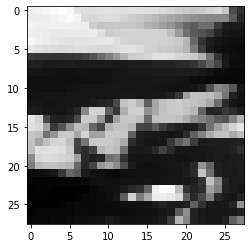

1/1 [==============================] - 0s 24ms/step
[[2.4993130e-22 3.4702033e-38 4.6711618e-24 3.5969808e-29 2.7350610e-29
  1.4066580e-16 2.6260415e-14 3.8005520e-18 4.4563822e-26 2.3603782e-38
  9.4871082e-18 4.8491830e-14 7.1376853e-24 2.0734691e-27 1.7872209e-15
  1.1926841e-08 1.5752723e-18 7.4704373e-27 7.5412180e-19 1.8482404e-17
  0.0000000e+00 4.3101381e-19 8.3022633e-29 9.3532027e-28 1.0000000e+00
  0.0000000e+00]]
y


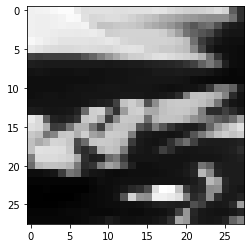

1/1 [==============================] - 0s 28ms/step
[[4.6946963e-21 1.5894603e-37 5.5157020e-24 4.3051862e-29 4.1479084e-29
  7.3667878e-17 4.9419677e-14 8.4732676e-17 5.3832859e-25 2.8741568e-38
  7.4377996e-18 3.7959165e-14 1.7192452e-23 9.9912523e-27 2.6728031e-15
  1.1300899e-08 3.5214588e-18 2.9114603e-27 1.8854057e-17 2.1222458e-17
  0.0000000e+00 2.6489760e-18 6.2422756e-30 2.6235911e-27 1.0000000e+00
  3.9248815e-38]]
y


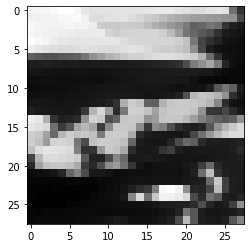

1/1 [==============================] - 0s 26ms/step
[[7.38782922e-19 6.16047440e-37 2.68833478e-23 2.02826483e-29
  1.89941335e-29 3.38534346e-16 1.71752210e-14 1.72070201e-15
  7.26762027e-23 2.94471858e-38 9.55403107e-20 1.24109724e-15
  2.86826569e-22 2.27138002e-25 9.21873052e-15 2.29336061e-09
  5.02221210e-19 4.46490265e-28 1.42074996e-15 6.99911762e-18
  0.00000000e+00 2.93139926e-18 6.01583778e-30 1.01858244e-26
  1.00000000e+00 5.63669280e-38]]
y


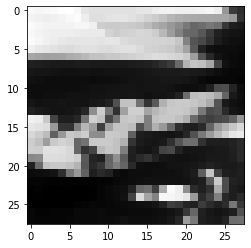

1/1 [==============================] - 0s 25ms/step
[[5.1160335e-19 6.0300444e-35 2.5099871e-21 2.4454640e-28 1.1289635e-30
  1.6332053e-13 2.4896894e-17 1.4704651e-14 2.9810779e-23 3.6510590e-38
  8.0060170e-21 1.6461957e-14 1.7323968e-25 5.8583882e-25 4.5350219e-14
  2.5476088e-09 2.0983078e-22 2.3648402e-30 8.9724659e-15 1.6552475e-18
  0.0000000e+00 2.3545835e-18 1.5327196e-31 2.6202304e-27 1.0000000e+00
  4.1468614e-38]]
y


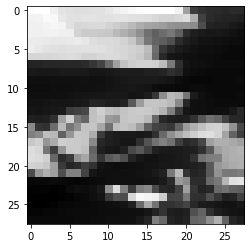

1/1 [==============================] - 0s 25ms/step
[[3.0862221e-15 1.0403990e-27 1.8827004e-09 5.6018566e-06 1.7405216e-14
  7.4192852e-10 7.2484336e-12 3.0809956e-06 2.1088951e-16 6.4863841e-27
  6.5469299e-04 1.6393433e-03 6.4554571e-19 6.0882077e-10 8.8656957e-13
  9.9486560e-01 1.3820196e-15 2.1349176e-17 2.7806608e-03 2.8708847e-13
  3.1386286e-30 1.1081175e-09 1.4040817e-17 1.2888921e-22 5.1086357e-05
  1.3367499e-27]]
p


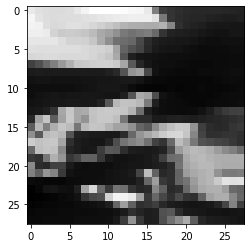

1/1 [==============================] - 0s 26ms/step
[[3.5025983e-18 2.4494421e-29 3.5239154e-21 1.4702608e-19 1.2323373e-23
  2.6838348e-26 2.2005641e-20 1.2564968e-19 3.0344418e-24 2.2747012e-34
  9.9951649e-01 9.3889889e-14 4.2178000e-21 2.7670723e-13 7.7408302e-24
  4.8351919e-04 1.3410912e-17 8.4211399e-24 2.7279396e-19 1.6385785e-22
  8.5525538e-30 2.3860304e-20 7.4930845e-25 2.0784950e-31 1.3490885e-09
  1.1718364e-34]]
k


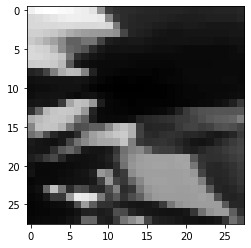

1/1 [==============================] - 0s 26ms/step
[[8.81090799e-23 4.43551108e-30 4.42766130e-25 2.07789955e-30
  1.00526972e-31 4.32963369e-33 1.09142542e-18 4.73804158e-26
  6.85979685e-23 0.00000000e+00 1.32379774e-02 3.52445950e-23
  4.12311938e-12 1.08108165e-35 8.09034570e-30 1.50613402e-14
  9.86296654e-01 7.29942613e-32 3.06544106e-26 1.33633309e-28
  2.18191735e-31 1.27127010e-23 2.46552865e-19 0.00000000e+00
  4.65322722e-04 0.00000000e+00]]
q


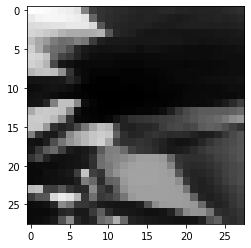

1/1 [==============================] - 0s 28ms/step
[[1.2449469e-21 9.8555496e-31 1.7874577e-30 3.0902037e-31 5.9364005e-32
  1.0795822e-32 2.2620484e-24 8.2891649e-26 7.1953873e-24 0.0000000e+00
  2.2292142e-01 5.3001929e-29 5.9092745e-21 1.1844854e-34 3.4333959e-30
  1.9485289e-23 7.7707857e-01 2.1750051e-35 7.0055904e-28 9.2899340e-28
  4.0997627e-31 3.5362495e-25 4.6842763e-22 0.0000000e+00 4.1893176e-11
  0.0000000e+00]]
q


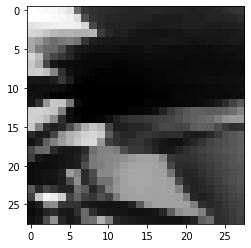

1/1 [==============================] - 0s 30ms/step
[[1.0781359e-22 1.9029202e-32 3.2850316e-31 1.9649243e-29 6.2222260e-32
  6.9899986e-31 1.7679253e-27 6.4618310e-24 8.1036517e-24 0.0000000e+00
  2.7518758e-01 3.5238981e-29 4.8682367e-25 1.1730070e-34 7.1526819e-30
  1.9924850e-26 7.2481245e-01 7.7183992e-35 2.2350118e-27 3.9997489e-28
  1.7060081e-31 9.0771799e-25 1.0565325e-23 0.0000000e+00 2.1540478e-12
  0.0000000e+00]]
q


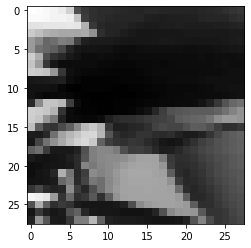

1/1 [==============================] - 0s 25ms/step
[[3.2177987e-22 2.6804357e-33 2.1117157e-31 6.3353809e-29 2.1295543e-30
  4.1190207e-29 7.1824909e-28 3.1614405e-22 1.2945605e-22 0.0000000e+00
  3.7061460e-02 8.2570328e-29 2.6295134e-26 1.3519066e-33 1.1561337e-28
  1.2943208e-26 9.6293849e-01 1.2192045e-33 2.0200132e-26 6.4564206e-28
  4.5935032e-30 4.2572609e-25 9.3154098e-23 0.0000000e+00 1.0953714e-10
  0.0000000e+00]]
q


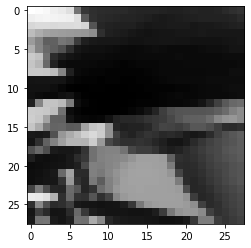

1/1 [==============================] - 0s 28ms/step
[[7.3521955e-24 8.9068419e-34 2.1836816e-34 1.5183995e-30 1.1680039e-32
  1.6123743e-30 8.2845571e-28 2.5403648e-25 8.4783802e-25 0.0000000e+00
  5.2668089e-05 1.4825872e-29 7.8661681e-27 4.1648322e-35 6.0561568e-31
  2.7954253e-25 9.9994731e-01 1.9182911e-34 3.0086974e-28 1.5840618e-30
  1.0618141e-31 1.1401586e-26 2.7274846e-24 0.0000000e+00 2.1481887e-10
  0.0000000e+00]]
q


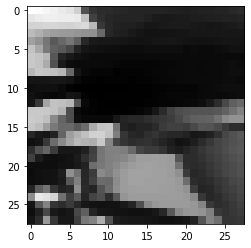

1/1 [==============================] - 0s 26ms/step
[[4.88873423e-25 2.45617432e-34 3.95294615e-35 2.27147077e-32
  2.11189462e-33 1.79620356e-31 2.02571045e-27 1.62231730e-27
  5.13375516e-26 0.00000000e+00 6.22775542e-06 1.13192816e-29
  4.67180734e-25 9.24970548e-38 2.12971106e-31 2.97561741e-23
  9.99993801e-01 3.64589399e-34 6.95244159e-29 6.55536245e-33
  2.04701229e-33 2.44991347e-27 9.65609567e-26 0.00000000e+00
  9.55668100e-10 0.00000000e+00]]
q


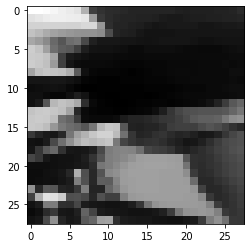

1/1 [==============================] - 0s 37ms/step
[[1.7019067e-22 3.2483917e-32 2.1547940e-31 1.7472760e-32 1.9240650e-32
  1.3213676e-29 4.8723422e-24 5.8649959e-27 1.0600724e-23 0.0000000e+00
  8.2188286e-03 2.2434241e-27 5.1828955e-19 2.4575449e-35 1.7077996e-29
  2.1708295e-19 9.9176300e-01 2.3032611e-32 3.1381463e-26 1.1645813e-31
  5.2672087e-33 1.6285459e-26 1.0419877e-21 0.0000000e+00 1.8200259e-05
  0.0000000e+00]]
q


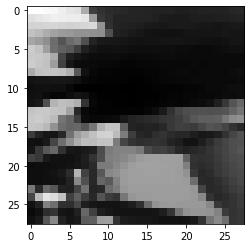

1/1 [==============================] - 0s 26ms/step
[[9.2246718e-23 1.4735962e-32 6.0843065e-32 5.2702073e-33 1.0293954e-32
  4.7897900e-30 3.0541580e-24 2.6326440e-27 2.3800876e-24 0.0000000e+00
  2.0566750e-03 1.4584835e-27 2.1002730e-19 9.3224250e-36 3.0037149e-30
  1.4099544e-19 9.9793833e-01 1.0569067e-32 8.3698781e-27 3.8851352e-32
  2.0599106e-33 7.8618425e-27 2.7361561e-22 0.0000000e+00 4.9585869e-06
  0.0000000e+00]]
q


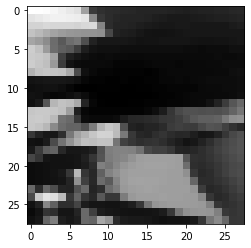

1/1 [==============================] - 0s 28ms/step
[[5.1828354e-23 6.5165638e-33 2.8410732e-32 4.2574605e-33 6.9903989e-33
  2.0824172e-30 2.0266478e-24 2.0027356e-27 1.9528555e-24 0.0000000e+00
  1.2787554e-03 7.5459115e-28 5.9345924e-20 8.1496491e-36 2.2247352e-30
  5.8399998e-20 9.9872005e-01 1.0060916e-32 4.3957217e-27 2.0429943e-32
  2.0872735e-33 7.2772665e-27 1.3049693e-22 0.0000000e+00 1.1964072e-06
  0.0000000e+00]]
q


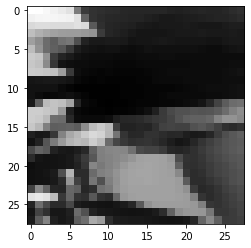

1/1 [==============================] - 0s 24ms/step
[[4.2841269e-24 4.5945637e-33 1.8981543e-34 3.3422269e-31 2.2933099e-33
  1.5023688e-30 7.0694918e-27 4.3166851e-26 3.2748054e-25 0.0000000e+00
  9.9727731e-05 4.4493068e-29 1.8747965e-25 8.5465456e-36 5.1406888e-31
  1.6794105e-24 9.9990022e-01 4.5028583e-34 2.2343532e-28 1.6169229e-31
  3.3683491e-32 6.2343331e-27 1.7257547e-24 0.0000000e+00 9.5992636e-10
  0.0000000e+00]]
q


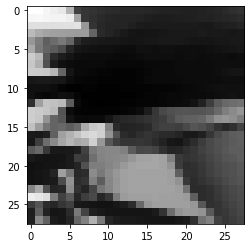

1/1 [==============================] - 0s 34ms/step
[[5.0940427e-25 4.6594025e-34 4.3138622e-35 7.1221444e-31 5.8413279e-33
  3.9502737e-31 2.9521855e-28 2.7253138e-25 3.2387118e-25 0.0000000e+00
  2.8474731e-05 5.3120883e-30 7.3882057e-28 1.6022374e-35 1.2506854e-31
  1.8434476e-26 9.9997151e-01 3.8574205e-34 8.3401812e-29 5.7796888e-32
  2.5066483e-32 3.1810858e-27 1.7134261e-25 0.0000000e+00 8.9645652e-11
  0.0000000e+00]]
q


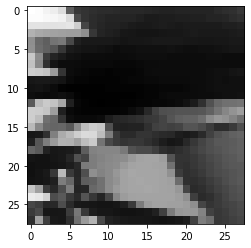

1/1 [==============================] - 0s 25ms/step
[[2.8633120e-23 5.2069592e-34 1.1941513e-33 2.5808159e-29 1.3262611e-31
  1.0793584e-30 1.9091557e-28 2.1848673e-23 1.8376195e-23 0.0000000e+00
  1.8966270e-05 7.3146548e-30 1.8478716e-27 1.0581403e-34 1.6166168e-30
  9.7481541e-28 9.9998105e-01 6.2576215e-33 2.8348639e-27 3.5944827e-30
  5.5856844e-31 9.5656334e-27 3.2241982e-24 0.0000000e+00 5.6357630e-10
  0.0000000e+00]]
q


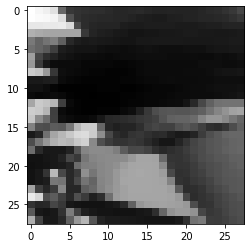

1/1 [==============================] - 0s 27ms/step
[[3.1942932e-22 5.1367436e-34 3.2640058e-33 1.0379343e-28 1.8412050e-30
  3.8681048e-29 1.3699353e-27 2.0812796e-22 1.0856226e-22 0.0000000e+00
  6.8494685e-08 1.0242187e-29 2.1100270e-29 2.8350486e-34 6.5464909e-30
  9.0189674e-29 9.9999988e-01 1.3660755e-32 7.5614952e-27 1.7001139e-26
  1.6532255e-29 1.5659493e-26 1.2571884e-23 0.0000000e+00 1.4271033e-10
  0.0000000e+00]]
q


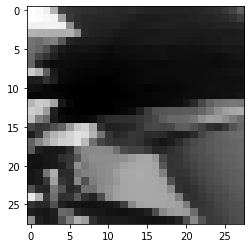

1/1 [==============================] - 0s 24ms/step
[[4.1874459e-21 7.5049979e-34 2.7757122e-31 3.9538872e-28 2.0867876e-30
  2.6401136e-28 2.6869863e-26 4.7245723e-20 2.3214014e-21 0.0000000e+00
  6.3806340e-07 1.3990327e-29 6.7895097e-29 1.5946320e-32 2.7104644e-29
  5.2259122e-29 9.9999940e-01 8.1626569e-32 2.5066109e-26 2.7426828e-24
  3.6505581e-29 6.7149011e-26 8.3107127e-23 0.0000000e+00 3.9116002e-11
  0.0000000e+00]]
q


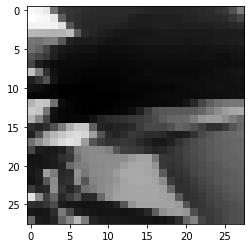

1/1 [==============================] - 0s 27ms/step
[[3.5287916e-20 2.0969550e-34 2.3717391e-29 6.9980817e-28 7.1692238e-30
  1.3527803e-27 3.7274054e-26 4.0116655e-18 5.8518699e-20 0.0000000e+00
  5.6028598e-06 6.4214308e-29 2.9404853e-28 2.3376219e-31 1.3494864e-28
  1.1634719e-28 9.9999440e-01 6.4312293e-31 2.9000962e-25 3.4206606e-23
  1.6013445e-28 1.9515172e-24 3.1030314e-23 0.0000000e+00 8.4300115e-11
  0.0000000e+00]]
q


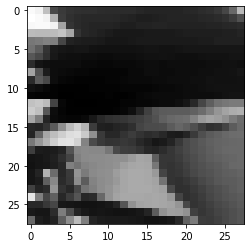

1/1 [==============================] - 0s 24ms/step
[[6.0744991e-19 1.3315481e-34 5.4354717e-28 2.0980097e-27 2.8787603e-29
  4.0347890e-27 1.2481670e-25 3.0143928e-16 7.2205288e-19 0.0000000e+00
  1.7676912e-05 1.4035372e-28 2.2968758e-27 1.4067519e-30 1.0873167e-27
  1.6944557e-28 9.9998236e-01 7.6181852e-30 4.9048768e-24 1.6778925e-21
  1.8523837e-27 2.2903620e-23 2.8623439e-23 0.0000000e+00 2.5806521e-10
  0.0000000e+00]]
q


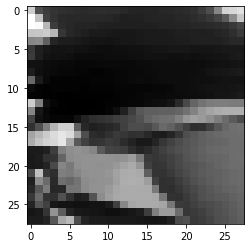

1/1 [==============================] - 0s 27ms/step
[[2.99985314e-11 7.59631927e-33 3.66239038e-22 6.59501337e-26
  4.35315008e-28 5.98448310e-23 1.31077153e-22 1.00940225e-08
  1.87774379e-11 2.16041498e-35 2.83286536e-05 1.08181363e-27
  1.86394697e-24 4.68450966e-26 1.24556656e-22 2.73255624e-25
  9.99966621e-01 4.15224284e-25 3.02254390e-16 7.06431661e-15
  1.30430546e-25 1.83111252e-16 8.90265251e-22 0.00000000e+00
  5.04166701e-06 8.50171769e-36]]
q


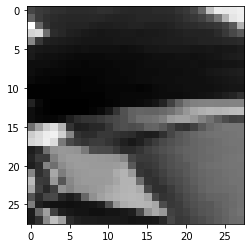

1/1 [==============================] - 0s 25ms/step
[[3.6038379e-08 6.6186924e-31 7.2831266e-21 5.2077866e-25 6.4120512e-30
  6.0422037e-23 7.1902119e-20 4.2335796e-05 7.6951230e-11 3.3487152e-33
  8.4712696e-08 2.3195059e-27 3.4345884e-21 3.6269564e-21 5.2143620e-19
  8.2081661e-26 9.9995613e-01 1.3267450e-22 1.9818515e-13 1.6655381e-13
  9.1834311e-24 2.2242483e-12 8.0600261e-21 1.3664867e-37 1.4165544e-06
  2.1393836e-33]]
q


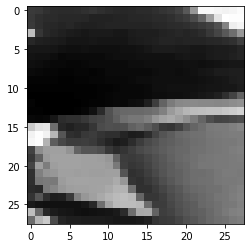

1/1 [==============================] - 0s 25ms/step
[[4.9852465e-06 6.2193222e-25 6.4445015e-21 3.7660221e-20 3.3428889e-30
  3.7266729e-23 8.9829540e-18 7.0853346e-08 5.7645316e-13 1.4017554e-30
  4.1401114e-09 1.2302637e-22 2.5396068e-15 1.5714296e-17 4.0993923e-13
  5.8740857e-26 9.9999475e-01 2.3637145e-18 3.4909625e-08 3.0654393e-10
  3.2252648e-23 8.0409490e-12 1.1062248e-18 6.3462692e-33 5.9646524e-08
  3.0684969e-30]]
q


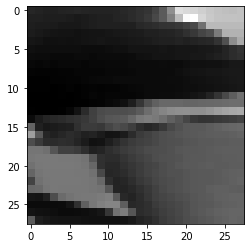

1/1 [==============================] - 0s 30ms/step
[[3.1367110e-11 1.7045056e-23 1.7833737e-21 1.0015059e-18 9.1389937e-31
  1.1596219e-30 1.3404761e-24 3.7987540e-14 3.3710142e-22 7.0428821e-32
  5.3638513e-25 5.7788794e-25 2.1624906e-04 3.7377167e-12 5.3605877e-06
  1.9843089e-25 9.9977833e-01 8.4171226e-22 1.6732446e-07 1.0607395e-17
  1.2026234e-22 1.6298775e-17 3.0023854e-22 4.9456767e-31 3.3828262e-15
  9.4929368e-32]]
q


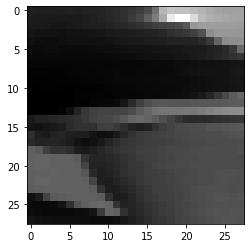

1/1 [==============================] - 0s 25ms/step
[[1.8063455e-12 2.0950060e-23 1.6348080e-22 3.1326147e-19 5.0109796e-29
  5.0704067e-32 1.2053908e-29 1.0738591e-17 3.7874932e-23 5.3815895e-32
  1.1350623e-30 1.0039668e-27 7.4745901e-02 1.5789538e-10 8.9360719e-06
  5.8097296e-23 9.2524523e-01 2.2688522e-27 7.6259915e-11 4.3108149e-20
  1.6118853e-20 2.4696301e-17 1.2391685e-23 6.3616137e-30 3.7613376e-20
  2.6345294e-32]]
q


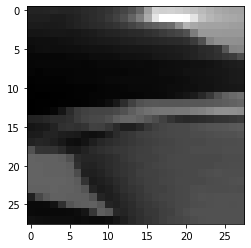

1/1 [==============================] - 0s 24ms/step
[[2.3572300e-11 8.9519708e-23 7.4885556e-24 4.8269629e-22 4.5979559e-27
  8.5139810e-32 1.3608268e-30 1.8262510e-18 9.4577715e-21 1.4593799e-31
  3.1075684e-31 3.7226538e-29 8.2101816e-01 1.3225995e-10 5.2071748e-05
  9.4260753e-21 1.7892975e-01 2.7385275e-33 5.5626486e-11 4.2760553e-17
  1.4741151e-19 1.7912449e-15 4.1365846e-23 4.6122710e-28 1.6203921e-23
  3.9395726e-32]]
m


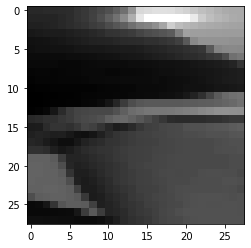

1/1 [==============================] - 0s 27ms/step
[[1.0052182e-09 5.1485149e-23 2.1193121e-26 4.6218419e-25 4.4021579e-25
  1.3656441e-28 2.2443951e-30 5.0413643e-18 9.9578788e-17 6.5134974e-31
  3.6010643e-30 2.4649588e-29 9.7164911e-01 1.6999685e-11 2.8272919e-02
  2.3711025e-17 7.7915916e-05 3.6991530e-38 1.1238410e-09 5.3136788e-12
  2.3883734e-21 1.2482661e-13 4.7157433e-21 1.2971762e-26 7.8054197e-25
  1.7347367e-31]]
m


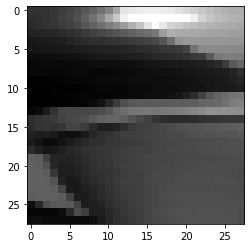

1/1 [==============================] - 0s 33ms/step
[[4.6564029e-08 1.6829461e-25 8.1628312e-31 5.7964064e-29 3.9593940e-25
  1.1827722e-27 1.2692365e-31 2.9365974e-17 4.3159619e-14 4.7069589e-32
  5.1612804e-27 8.8251534e-30 3.6239770e-04 3.7035990e-14 9.9963498e-01
  7.9227401e-16 1.0381702e-11 0.0000000e+00 6.9599759e-10 2.5077120e-06
  1.0820700e-26 3.5150146e-14 1.5562008e-21 1.0198189e-28 6.5487820e-27
  1.5041820e-32]]
o


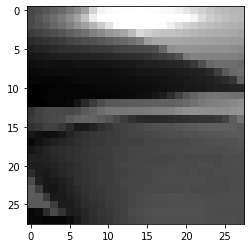

1/1 [==============================] - 0s 27ms/step
[[1.86914520e-04 5.11455288e-31 1.55931191e-35 2.20491684e-31
  5.60270216e-25 4.52009942e-27 3.04823979e-33 2.39609130e-16
  2.40477587e-13 8.39916795e-34 9.11985576e-26 1.77540040e-32
  1.03653245e-13 4.89123367e-20 7.11663485e-01 2.29145560e-13
  5.72870050e-25 0.00000000e+00 5.57863235e-11 2.88149625e-01
  5.95586958e-37 2.13756330e-20 2.77963186e-23 4.46875885e-31
  1.00159239e-27 2.25247929e-34]]
o


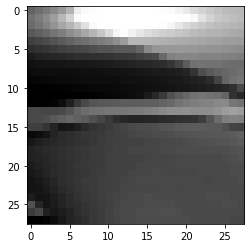

1/1 [==============================] - 0s 25ms/step
[[1.3595079e-04 3.7016515e-33 4.4584799e-38 6.7104998e-33 4.3836468e-25
  8.4012369e-24 1.3654411e-30 7.0461241e-20 2.9523171e-14 3.5054255e-35
  3.4599243e-27 9.4073175e-33 8.0089469e-21 4.5385776e-25 2.8050137e-03
  8.9547727e-14 1.0630810e-32 0.0000000e+00 3.7193290e-11 9.9705911e-01
  0.0000000e+00 2.4499279e-27 1.5921649e-24 5.4031217e-31 1.2638273e-25
  1.8860210e-35]]
t


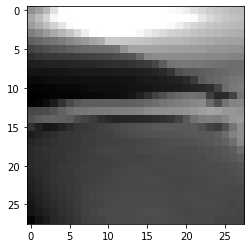

1/1 [==============================] - 0s 24ms/step
[[1.6452098e-02 2.1166805e-30 8.2335033e-33 9.1987596e-29 4.3921869e-19
  8.4159076e-17 6.0755098e-22 2.2804815e-18 3.8179299e-10 1.9320125e-32
  4.1413970e-23 9.1177087e-29 2.1362321e-20 6.4086681e-24 3.3567412e-05
  6.7093475e-10 1.7352614e-35 0.0000000e+00 5.7590532e-09 9.8351431e-01
  0.0000000e+00 1.2587420e-28 4.1336339e-22 3.8968506e-25 1.1301180e-18
  1.1508794e-32]]
t


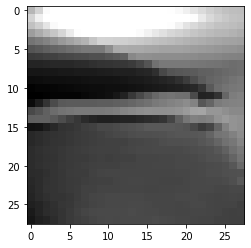

1/1 [==============================] - 0s 36ms/step
[[1.7681344e-04 1.3403087e-26 1.8430070e-30 7.6432771e-23 5.7413499e-14
  1.3827425e-13 4.2121704e-16 2.1611800e-15 8.1109414e-07 4.2303707e-29
  1.6372788e-16 1.6143362e-26 1.3869402e-16 1.9022486e-17 8.4567862e-04
  7.2236080e-06 9.5976581e-36 0.0000000e+00 4.8409402e-06 9.9896455e-01
  0.0000000e+00 2.8157928e-26 1.4309392e-16 1.7576796e-20 5.4866870e-13
  5.6855113e-29]]
t


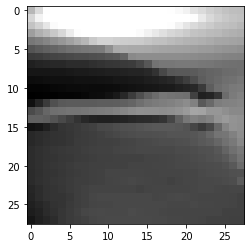

1/1 [==============================] - 0s 25ms/step
[[1.7415617e-04 2.7189656e-26 2.0192113e-30 1.0161142e-21 1.9278309e-13
  2.7778669e-13 5.2963030e-15 6.4102378e-15 5.1374309e-06 2.4242715e-28
  3.0858782e-15 7.3257654e-26 3.2729041e-16 1.2349406e-15 9.4157141e-03
  3.0000410e-05 4.7865699e-35 0.0000000e+00 4.6444195e-05 9.9032861e-01
  2.4468734e-38 7.2452240e-26 8.0614566e-16 2.8104906e-19 3.6658558e-12
  3.4286965e-28]]
t


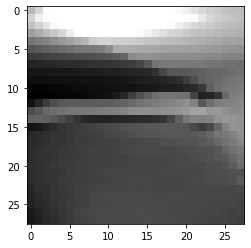

1/1 [==============================] - 0s 26ms/step
[[2.5367763e-04 2.1620496e-26 1.9266636e-30 6.5376919e-22 2.4292745e-13
  2.7845502e-13 2.1356587e-15 8.3676708e-15 4.0125437e-06 1.8826519e-28
  8.9247499e-16 3.5675557e-26 5.3377565e-16 2.0383874e-16 6.5979967e-03
  2.2299811e-05 2.7770144e-35 0.0000000e+00 2.0589288e-05 9.9310148e-01
  2.6105815e-38 5.5700865e-26 1.0884019e-15 2.2759520e-19 1.2718199e-12
  2.3645294e-28]]
t


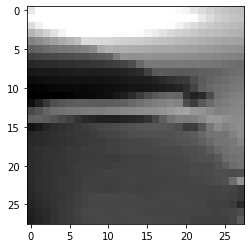

1/1 [==============================] - 0s 27ms/step
[[1.3991347e-05 5.0414968e-24 5.0890796e-27 3.7125024e-18 1.8789467e-12
  4.2624294e-12 2.4218318e-12 3.3092995e-15 4.8848341e-07 3.7523371e-27
  2.0197179e-12 4.4584001e-23 2.7909638e-16 1.9295255e-14 1.3735865e-05
  5.3933583e-04 2.8504256e-36 4.1979475e-35 1.3306586e-04 9.9929941e-01
  2.5382876e-37 1.5254695e-25 2.4918587e-13 7.2817387e-19 4.6496137e-08
  6.0052375e-27]]
t


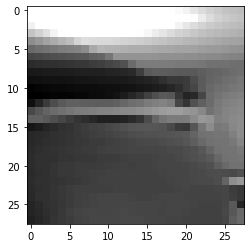

1/1 [==============================] - 0s 25ms/step
[[2.7211790e-08 2.4668469e-25 1.0812260e-27 3.0751251e-19 1.8986586e-14
  6.5888592e-13 9.4152702e-13 8.1974181e-17 1.1121528e-08 2.9750252e-28
  2.3639632e-11 4.2012495e-23 2.8125985e-18 4.8555593e-13 1.6078261e-08
  8.6033826e-05 3.5527518e-38 2.1996629e-35 1.6755379e-06 9.9991155e-01
  4.2569084e-37 2.2973353e-27 2.8006628e-13 2.9615752e-19 6.7262175e-07
  4.7066179e-28]]
t


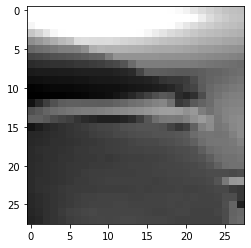

1/1 [==============================] - 0s 25ms/step
[[1.1165996e-08 7.6908792e-26 3.5626041e-27 4.7849261e-20 3.5048529e-14
  8.2604680e-13 6.6608345e-13 1.6226038e-17 1.3975323e-09 9.2920793e-29
  4.7248000e-12 3.6465266e-23 1.6377946e-19 1.4111283e-13 1.1257043e-09
  3.6287762e-05 0.0000000e+00 6.0854411e-36 9.6553535e-08 9.9996328e-01
  9.3544955e-37 8.8901408e-28 2.4301928e-13 5.2372621e-20 3.0875279e-07
  1.4522005e-28]]
t


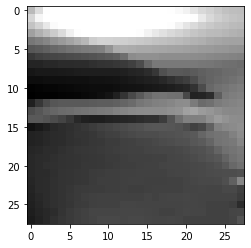

1/1 [==============================] - 0s 25ms/step
[[3.2453866e-06 3.1656560e-26 1.1804286e-30 1.6629847e-20 1.3703725e-13
  8.0789672e-13 5.1731006e-14 1.4551567e-15 3.5868793e-06 3.8480439e-28
  6.4290695e-14 2.8661037e-25 4.6801098e-17 7.6771753e-14 8.6168889e-03
  3.5759647e-05 2.4550979e-36 0.0000000e+00 1.2975476e-04 9.9121070e-01
  5.4435025e-38 2.9090275e-26 9.9216410e-16 5.7423523e-18 2.7967882e-12
  5.2717854e-28]]
t


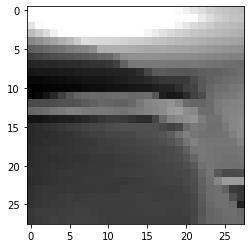

1/1 [==============================] - 0s 26ms/step
[[5.7213714e-09 1.2519814e-23 5.2493959e-27 1.6904064e-19 5.0646251e-11
  1.7888293e-07 2.5786540e-11 4.8707512e-15 1.2434329e-08 1.0890834e-27
  2.2810362e-09 1.5029214e-20 1.0878088e-19 2.0250146e-09 4.7742247e-07
  9.9367613e-01 0.0000000e+00 1.1172400e-33 3.3421190e-09 6.3230051e-03
  1.6574195e-35 6.1752310e-28 9.5124917e-14 2.6683569e-18 1.3261032e-07
  2.9070539e-27]]
p


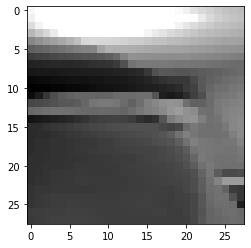

1/1 [==============================] - 0s 28ms/step
[[1.6397240e-09 6.2191021e-24 6.7230791e-28 4.8740891e-20 1.2711708e-10
  2.3825378e-07 2.9929947e-11 2.6132216e-15 1.9331262e-08 6.3826931e-28
  4.5888518e-10 2.2381609e-21 4.8935579e-20 6.1724437e-10 7.5493443e-07
  9.9372262e-01 0.0000000e+00 2.7157607e-34 8.2667179e-10 6.2762471e-03
  1.3398058e-35 4.7973326e-28 6.9523970e-14 2.8184351e-18 1.8605094e-08
  1.3412328e-27]]
p


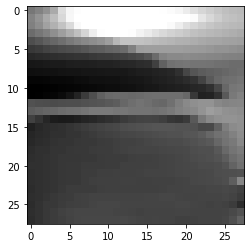

1/1 [==============================] - 0s 29ms/step
[[1.9736079e-04 3.7306534e-28 1.1808383e-33 1.5670625e-25 9.6916305e-17
  7.8593146e-15 2.0913313e-23 2.7976787e-15 4.3000907e-07 2.2899676e-30
  5.4418151e-20 3.2675276e-29 6.1544084e-17 1.5017949e-18 6.1388157e-02
  2.4864406e-05 2.1118718e-37 0.0000000e+00 1.3117856e-08 9.3838918e-01
  0.0000000e+00 1.5790735e-28 7.3963600e-16 3.5173894e-20 9.0139926e-20
  9.4849520e-31]]
t


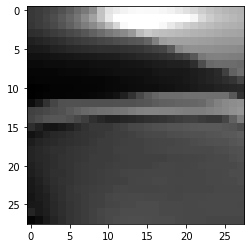

1/1 [==============================] - 0s 28ms/step
[[8.8102841e-09 1.0194130e-32 2.3007940e-37 5.3786728e-34 3.1249085e-25
  5.2408829e-27 2.7592379e-32 1.0374714e-24 1.8125317e-15 5.2385630e-35
  6.3059652e-33 8.5141928e-35 6.1802472e-14 1.8179084e-19 8.8243028e-03
  2.2787206e-15 2.4312092e-28 0.0000000e+00 8.0657140e-14 9.9117565e-01
  9.1697272e-35 6.8605892e-25 4.1245450e-23 8.6947988e-31 3.0746259e-36
  2.1093649e-35]]
t


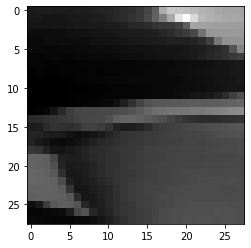

1/1 [==============================] - 0s 26ms/step
[[5.1632310e-10 4.2173565e-21 5.2750369e-22 7.7302051e-20 1.5411747e-27
  6.7040095e-28 5.9262128e-26 4.1216967e-17 1.1493107e-23 3.7698841e-30
  4.9813723e-27 5.1408534e-26 7.9889365e-02 5.9955204e-07 2.7807991e-03
  1.8775704e-19 9.1732472e-01 1.2210120e-28 4.5226038e-06 2.4214288e-19
  1.4488808e-22 1.7502806e-20 7.9410399e-20 2.7559959e-27 9.7568092e-20
  9.8028677e-31]]
q


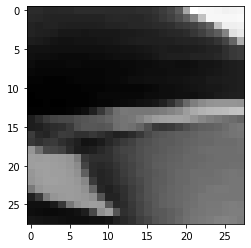

1/1 [==============================] - 0s 39ms/step
[[1.5333004e-02 3.8281476e-18 2.7084193e-18 2.3721088e-15 6.6765973e-28
  8.2297226e-22 5.3117995e-17 3.9825095e-06 4.2412956e-14 1.3372444e-27
  1.2885552e-18 2.1353562e-18 2.3354300e-04 3.2934458e-12 4.9266670e-02
  4.2973701e-21 6.0143019e-03 1.7822587e-18 9.2825091e-01 3.6435459e-08
  4.2650243e-25 3.8167898e-14 7.0310160e-22 6.9057562e-24 8.9764880e-04
  1.4780282e-27]]
s


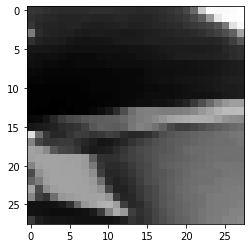

1/1 [==============================] - 0s 24ms/step
[[1.1814423e-03 1.8197117e-18 6.0302393e-18 2.1898983e-14 4.4899802e-28
  4.2376212e-21 2.4307487e-16 3.0731964e-03 1.8862476e-11 5.1365293e-28
  6.9319001e-14 5.2489278e-17 8.9806979e-10 1.8489579e-13 1.4497847e-06
  8.2376524e-24 4.0642999e-04 3.4168492e-15 5.6891044e-04 3.3158423e-05
  2.2366392e-23 6.2321041e-13 5.2783711e-22 4.5372029e-23 9.9473530e-01
  4.1784086e-27]]
y


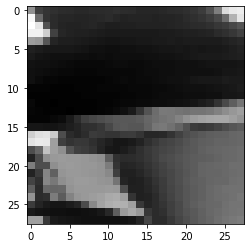

1/1 [==============================] - 0s 24ms/step
[[1.0360509e-01 3.3217176e-20 3.6643039e-19 1.5805810e-17 3.2615528e-25
  1.6324595e-17 4.7079732e-17 5.9716326e-01 2.9265565e-01 2.2633225e-28
  1.9440675e-08 2.1461094e-21 1.6677157e-15 1.1448300e-17 7.9723679e-13
  2.3976220e-21 3.3488718e-03 4.3470554e-19 7.4585689e-09 8.5831946e-04
  2.8436631e-22 4.1925996e-10 9.6367785e-21 1.0994824e-24 2.3687705e-03
  3.4806119e-28]]
h


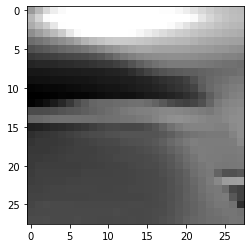

1/1 [==============================] - 0s 25ms/step
[[4.6890980e-07 1.3072761e-19 6.2404512e-26 1.7012909e-14 1.9838807e-10
  6.8151867e-10 4.4320535e-14 9.4887314e-14 1.8457448e-06 3.8680063e-26
  2.1974854e-06 7.6857956e-17 1.7715151e-13 1.3966061e-07 1.2677856e-06
  1.2914505e-03 1.1401369e-31 2.9700818e-28 7.8825406e-07 9.9869955e-01
  7.1880593e-34 5.8237144e-25 6.1276671e-19 3.1361138e-18 2.2207757e-06
  7.1515480e-26]]
t


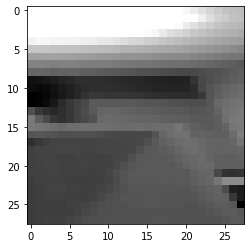

1/1 [==============================] - 0s 38ms/step
[[3.7315654e-06 2.0332133e-16 3.4641899e-28 3.2904937e-13 2.6059144e-10
  1.3588972e-11 1.7307013e-08 1.0376186e-08 8.6484991e-10 1.8413938e-24
  4.8158416e-08 2.5185987e-15 7.8400336e-10 1.1730664e-10 2.1819824e-11
  9.4517899e-01 1.2557261e-13 1.1919469e-21 7.5532246e-04 3.2469029e-07
  5.8810098e-23 1.1147724e-23 4.4009498e-21 9.5929055e-17 5.4061610e-02
  4.2980933e-24]]
p


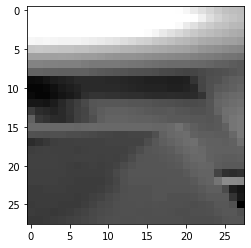

1/1 [==============================] - 0s 27ms/step
[[9.5225192e-07 5.9618010e-17 3.4718339e-29 6.1075107e-14 1.7091500e-10
  4.9154908e-12 7.6220914e-09 2.5920794e-09 1.3909794e-10 3.5814746e-25
  8.1530105e-10 2.4981956e-16 2.1737123e-10 1.8886072e-11 3.9661117e-12
  9.9684250e-01 1.6554772e-15 8.0568093e-22 4.8016584e-05 4.8296286e-08
  3.5833372e-23 4.2944045e-24 8.8880860e-22 9.7040503e-18 3.1084821e-03
  8.3762414e-25]]
p


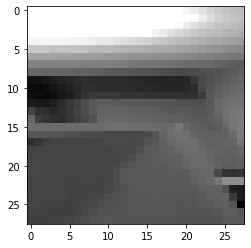

1/1 [==============================] - 0s 25ms/step
[[1.21920311e-06 3.47549993e-17 4.81511164e-29 5.22772065e-14
  1.12769884e-10 3.55669292e-12 9.10565934e-09 1.88655735e-09
  1.15087981e-10 3.60055789e-25 1.08787890e-09 5.96631162e-16
  2.28797301e-10 1.41174988e-11 3.24495335e-12 9.93407369e-01
  1.44511254e-15 7.12379414e-22 4.10270513e-05 6.28286330e-08
  2.11876127e-23 2.90474244e-24 3.25274054e-21 1.01371489e-17
  6.55021612e-03 8.71769397e-25]]
p


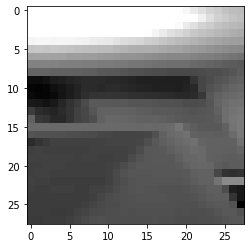

1/1 [==============================] - 0s 25ms/step
[[1.5993259e-06 7.9944816e-17 9.4357483e-29 1.3133536e-13 1.4732754e-10
  8.0501977e-12 1.3138505e-08 2.3172448e-09 2.9787273e-10 6.8504681e-25
  1.3679140e-09 4.4488711e-16 3.1808636e-10 4.3068268e-11 9.4386911e-12
  9.7842544e-01 1.8480408e-15 7.8837699e-22 6.9304755e-05 1.5591721e-07
  4.1246703e-23 3.3135814e-24 2.5035558e-21 2.6509327e-17 2.1503517e-02
  1.6275580e-24]]
p


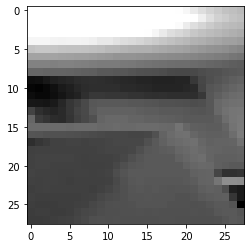

1/1 [==============================] - 0s 27ms/step
[[1.7627905e-06 1.6227617e-16 8.5745248e-29 2.3582362e-13 1.8479804e-10
  1.4590782e-11 6.5118209e-09 2.6305167e-09 4.0189754e-10 7.4864990e-25
  2.2207987e-09 8.0653127e-16 8.1817597e-10 5.5970707e-11 1.1641774e-11
  9.9346292e-01 4.7258806e-15 1.0953185e-21 9.5434116e-05 5.6090379e-08
  4.2799939e-23 5.8911710e-24 2.8592621e-21 2.1679100e-17 6.4399168e-03
  1.8235662e-24]]
p


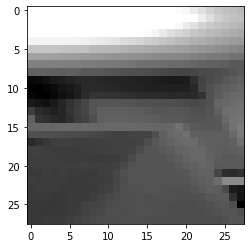

1/1 [==============================] - 0s 26ms/step
[[1.3637139e-06 6.3336055e-17 2.4285519e-29 1.2038294e-13 1.6081228e-10
  7.8053909e-12 6.3989951e-09 2.7780376e-09 3.6116229e-10 5.3248106e-25
  1.4632947e-09 2.7964483e-16 2.4706570e-10 2.8586135e-11 1.0687281e-11
  9.9220252e-01 2.6985066e-15 5.2187206e-22 1.3712214e-04 7.1161679e-08
  3.6131082e-23 4.2311971e-24 1.6772175e-21 1.3685006e-17 7.6588225e-03
  1.3445323e-24]]
p


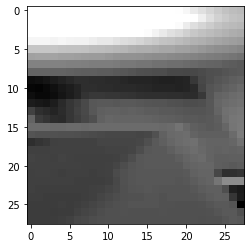

1/1 [==============================] - 0s 27ms/step
[[1.4469546e-06 9.3983295e-17 4.1653068e-29 9.3560440e-14 1.1791937e-10
  1.0563045e-11 6.1088254e-09 2.8756384e-09 3.2164599e-10 5.5457494e-25
  1.5350432e-09 2.7125447e-16 8.9166252e-10 3.5847433e-11 7.6577607e-12
  9.9182159e-01 1.6069036e-15 5.4950698e-22 8.8840454e-05 3.7992997e-08
  3.3640036e-23 2.5838096e-24 3.7398160e-21 2.6768843e-17 8.0880737e-03
  1.2004836e-24]]
p


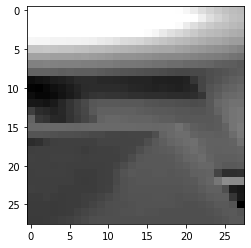

1/1 [==============================] - 0s 36ms/step
[[1.38612904e-06 6.04973430e-17 7.58116443e-29 6.15842487e-14
  4.93419923e-11 1.04936433e-11 5.96104588e-09 2.94004954e-09
  2.55959115e-10 5.17927170e-25 2.16472040e-09 8.63677409e-16
  4.20659174e-10 4.46791840e-11 1.00203058e-11 9.88082826e-01
  2.36747763e-15 1.12079944e-21 1.15029594e-04 6.98017359e-08
  3.57135917e-23 4.79022887e-24 1.54281220e-21 1.11945975e-17
  1.18006011e-02 1.20462581e-24]]
p


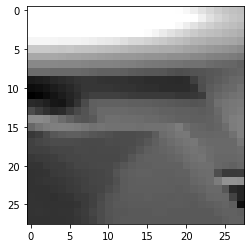

1/1 [==============================] - 0s 27ms/step
[[2.96979288e-05 1.41569635e-15 1.47337444e-27 1.43910372e-12
  1.49339305e-10 3.69126590e-10 1.27181785e-08 1.13888303e-08
  5.09265208e-09 4.63392436e-24 3.01216346e-06 4.14531021e-15
  1.10644232e-08 4.81284013e-10 1.67480248e-11 1.78905025e-01
  5.74472804e-12 1.44571282e-22 1.41680427e-03 8.00910485e-08
  7.68210799e-23 2.87895071e-23 9.07598724e-20 1.79437064e-17
  8.19645345e-01 1.05112537e-23]]
y


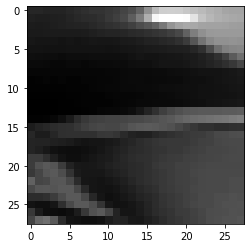

1/1 [==============================] - 0s 26ms/step
[[1.99471731e-10 1.15512824e-21 7.84540850e-23 2.86439459e-21
  3.31365455e-29 2.44454869e-28 1.78092072e-35 2.73915880e-17
  1.13313776e-18 2.78283594e-32 1.16203538e-37 2.86644108e-27
  1.88690715e-03 1.08894053e-10 1.54645690e-07 1.07682401e-23
  9.98113036e-01 3.94392093e-33 1.28844968e-09 2.11767766e-15
  5.15849298e-21 8.12575732e-15 9.83108093e-30 2.22811332e-29
  3.23250098e-29 6.75753352e-33]]
q


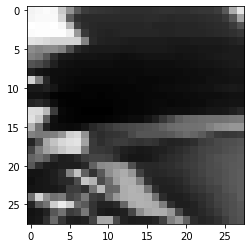

1/1 [==============================] - 0s 26ms/step
[[4.0581595e-22 2.7997475e-29 2.1659009e-25 2.4861250e-27 7.7727101e-25
  4.9468960e-25 3.4728935e-27 2.6593554e-11 4.6679303e-18 1.0281439e-37
  2.0374645e-02 2.1680138e-28 1.2485747e-31 2.7749639e-28 3.3275489e-29
  1.3920916e-27 9.7962534e-01 1.6714639e-26 6.5835632e-26 1.1198148e-20
  7.8317442e-29 1.3856476e-22 6.7043845e-24 0.0000000e+00 1.2425967e-13
  4.4009233e-38]]
q


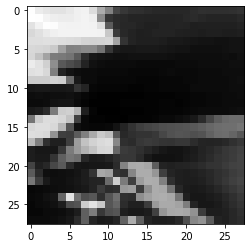

1/1 [==============================] - 0s 30ms/step
[[6.3234545e-29 0.0000000e+00 3.5790825e-34 0.0000000e+00 1.3304659e-32
  0.0000000e+00 2.5746783e-30 1.1343078e-30 1.0544957e-30 0.0000000e+00
  5.9384273e-08 5.3564727e-32 1.0918380e-33 0.0000000e+00 0.0000000e+00
  2.7566804e-29 1.0000000e+00 0.0000000e+00 1.1296408e-36 5.4410742e-32
  4.3645809e-38 5.3768355e-27 5.2459458e-30 0.0000000e+00 9.4919791e-21
  0.0000000e+00]]
q


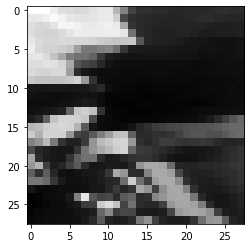

1/1 [==============================] - 0s 30ms/step
[[8.7935081e-33 0.0000000e+00 8.3876785e-35 0.0000000e+00 5.1556686e-34
  0.0000000e+00 2.4635464e-34 2.6782847e-37 0.0000000e+00 0.0000000e+00
  2.8074932e-14 6.0577497e-30 3.3497201e-32 0.0000000e+00 0.0000000e+00
  4.9315332e-30 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.7915888e-31 2.9895914e-34 0.0000000e+00 7.4117521e-23
  0.0000000e+00]]
q


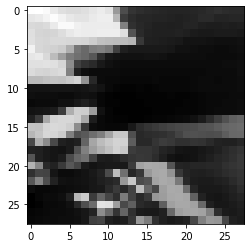

1/1 [==============================] - 0s 28ms/step
[[2.3234107e-31 0.0000000e+00 4.8396985e-35 0.0000000e+00 2.1499167e-33
  0.0000000e+00 1.6836181e-33 1.1566020e-35 1.6146580e-36 0.0000000e+00
  2.4373069e-12 8.0151449e-31 3.2964041e-32 0.0000000e+00 0.0000000e+00
  1.3243561e-29 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.5699070e-36
  0.0000000e+00 4.3029353e-30 7.3544290e-33 0.0000000e+00 2.7173810e-22
  0.0000000e+00]]
q


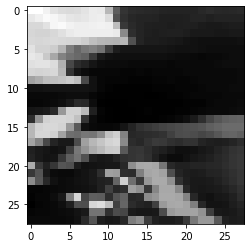

1/1 [==============================] - 0s 25ms/step
[[1.5511432e-29 0.0000000e+00 3.4543343e-34 0.0000000e+00 1.2976839e-32
  0.0000000e+00 8.5052629e-32 9.5066296e-34 1.5702628e-33 0.0000000e+00
  7.4785139e-10 1.3283880e-30 8.7853354e-31 0.0000000e+00 0.0000000e+00
  5.7558138e-29 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2023284e-33
  0.0000000e+00 8.6929639e-30 3.2430734e-30 0.0000000e+00 1.3587708e-21
  0.0000000e+00]]
q


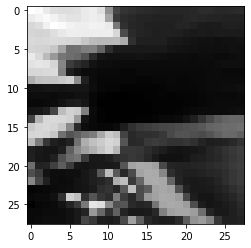

1/1 [==============================] - 0s 26ms/step
[[2.19882459e-28 0.00000000e+00 1.38481123e-33 0.00000000e+00
  5.49862050e-32 0.00000000e+00 1.88224446e-31 7.37896595e-32
  6.92064071e-32 0.00000000e+00 8.39176053e-08 1.79428328e-31
  1.70163398e-31 0.00000000e+00 0.00000000e+00 1.10852279e-28
  9.99999881e-01 0.00000000e+00 8.51871533e-37 3.79471617e-32
  0.00000000e+00 6.85543767e-28 2.45511802e-29 0.00000000e+00
  1.26703116e-20 0.00000000e+00]]
q


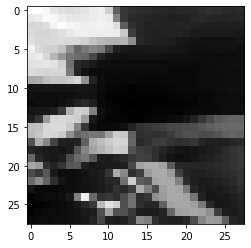

1/1 [==============================] - 0s 28ms/step
[[1.6388503e-32 0.0000000e+00 1.2709339e-34 0.0000000e+00 1.5970121e-33
  0.0000000e+00 6.2220349e-33 5.6404415e-36 2.5495523e-36 0.0000000e+00
  1.1180235e-12 8.3155411e-30 1.6157155e-31 0.0000000e+00 0.0000000e+00
  3.4070607e-29 1.0000000e+00 0.0000000e+00 0.0000000e+00 9.8062223e-36
  0.0000000e+00 2.2509577e-30 2.2889413e-33 0.0000000e+00 8.0697906e-22
  0.0000000e+00]]
q


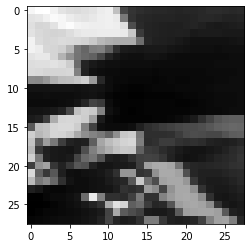

1/1 [==============================] - 0s 25ms/step
[[3.6542903e-31 0.0000000e+00 1.5689779e-30 0.0000000e+00 1.6058962e-31
  0.0000000e+00 2.1515248e-33 3.3790292e-34 2.1628291e-35 0.0000000e+00
  1.5883651e-12 1.1615118e-24 1.2338208e-26 0.0000000e+00 0.0000000e+00
  1.7957192e-26 1.0000000e+00 0.0000000e+00 2.7467188e-37 3.0615617e-34
  0.0000000e+00 5.8512043e-30 1.0529887e-29 0.0000000e+00 2.4478911e-20
  0.0000000e+00]]
q


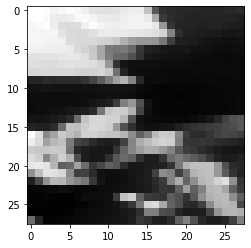

1/1 [==============================] - 0s 26ms/step
[[7.8677759e-11 9.4085923e-27 6.9860129e-10 6.5935771e-22 1.9922478e-18
  8.6058156e-22 5.3139771e-22 2.0751811e-14 5.5247324e-23 1.1357090e-30
  2.6314804e-01 7.2823995e-01 2.1560676e-12 1.7035830e-13 1.2039712e-16
  9.3590643e-07 8.6079007e-03 2.6859134e-22 2.9536462e-16 1.0880704e-24
  5.1356822e-25 2.8124197e-11 1.6244939e-18 3.5103794e-24 3.1520158e-06
  7.9822423e-31]]
l


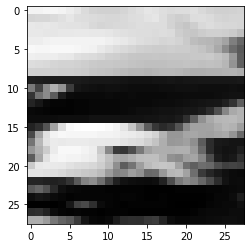

1/1 [==============================] - 0s 25ms/step
[[7.2646350e-01 1.7425170e-29 1.2584306e-27 2.9044683e-25 4.8725583e-24
  2.0122503e-25 5.6807518e-18 3.1059118e-09 3.0685618e-17 1.2714697e-33
  4.9405389e-12 1.9342223e-20 4.3954855e-21 5.0932058e-17 1.2761860e-29
  8.3045838e-15 3.7041783e-11 3.1609985e-23 8.7111852e-11 3.9185307e-15
  1.3006912e-29 2.0211669e-17 1.6715510e-26 1.2693059e-37 2.7353650e-01
  1.6713974e-34]]
a


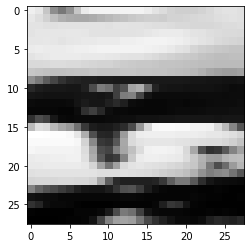

1/1 [==============================] - 0s 29ms/step
[[3.06906410e-11 2.24053797e-29 1.10869312e-23 2.31558559e-08
  2.45130461e-22 8.78243134e-18 1.07769194e-27 9.71656501e-01
  7.64888187e-04 3.53021695e-29 1.27976740e-10 8.86500507e-24
  4.25745687e-03 8.17736016e-13 2.87664168e-16 2.65989267e-14
  1.06162895e-13 2.32911830e-19 2.20066146e-03 4.33521166e-08
  4.65142658e-20 2.23940436e-19 2.23998210e-37 4.86740667e-20
  2.11203806e-02 1.42264127e-29]]
h


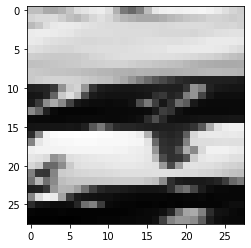

1/1 [==============================] - 0s 25ms/step
[[3.36840637e-02 1.19488425e-29 9.21933093e-17 5.08305912e-15
  3.30618173e-24 1.85888527e-16 3.65808860e-16 7.14228518e-05
  3.26204480e-10 1.19431919e-29 2.44087423e-04 1.36847818e-15
  5.02746725e-21 2.04842601e-10 2.60405863e-22 8.71532989e-13
  4.22986661e-04 1.34300241e-31 9.11915197e-14 1.60795043e-14
  9.97134821e-28 3.63007692e-13 1.32348454e-21 1.48765099e-32
  9.65577483e-01 1.77519677e-30]]
y


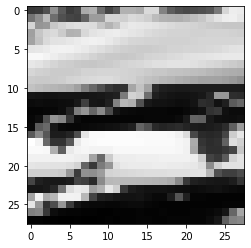

1/1 [==============================] - 0s 36ms/step
[[1.81773846e-10 3.24961270e-32 2.52503386e-32 3.37253282e-17
  8.14204423e-19 0.00000000e+00 2.67961706e-21 3.12422817e-05
  2.12784468e-14 9.55481775e-33 1.11573832e-02 2.00638646e-24
  8.63327403e-26 9.63445573e-11 5.35609346e-31 3.44253804e-19
  9.80277836e-01 4.68399376e-18 1.52031098e-17 5.28312021e-24
  3.27524748e-18 1.17772545e-11 4.78648428e-32 1.17409135e-35
  8.53360537e-03 4.09501677e-33]]
q


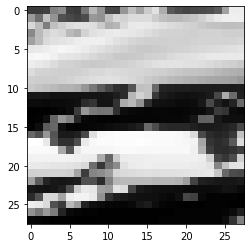

1/1 [==============================] - 0s 25ms/step
[[3.94470824e-15 1.95420501e-36 1.20491156e-35 1.33360928e-19
  6.94881081e-17 0.00000000e+00 2.99160415e-22 5.83541784e-08
  2.45009172e-15 6.04529194e-34 6.57708442e-05 1.68812521e-26
  1.82500486e-27 9.26133649e-12 1.41755391e-32 9.45350642e-18
  9.99911785e-01 1.65559591e-16 5.36075463e-20 6.11273367e-24
  1.19931741e-19 1.10575394e-13 2.82529815e-34 3.00177721e-38
  2.23600400e-05 1.01787479e-34]]
q


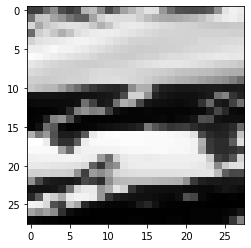

1/1 [==============================] - 0s 26ms/step
[[4.2343150e-13 2.1465267e-35 4.0443319e-34 2.0092132e-18 3.2424112e-16
  0.0000000e+00 4.2302802e-20 2.3818584e-06 1.2889931e-14 9.8838122e-33
  6.0085943e-03 2.0077966e-25 4.4355849e-25 2.8384857e-11 1.9797716e-31
  3.8330755e-17 9.9181151e-01 1.8167067e-15 1.2180366e-17 4.6471480e-22
  1.2994598e-18 8.5222567e-12 5.3546413e-34 3.2601245e-37 2.1774971e-03
  1.7106962e-33]]
q


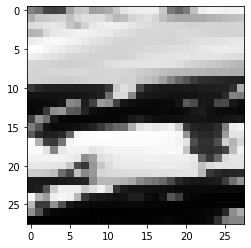

1/1 [==============================] - 0s 27ms/step
[[1.77768147e-10 1.09939267e-28 8.58665709e-33 2.66348854e-15
  1.05105763e-22 0.00000000e+00 1.41381860e-22 4.83371920e-08
  9.66425612e-19 9.63653555e-34 8.11698556e-01 3.64299206e-28
  6.81878644e-22 8.89432583e-10 1.08058494e-31 9.01239430e-22
  1.11479720e-04 4.91903722e-22 6.85675871e-16 3.91006836e-24
  2.89262766e-20 1.83620332e-15 1.07715841e-35 8.67739828e-35
  1.88189879e-01 1.02121228e-33]]
k


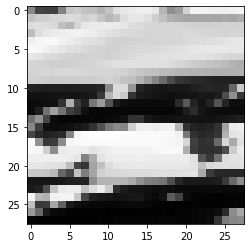

1/1 [==============================] - 0s 25ms/step
[[1.4358656e-08 2.0888343e-26 1.4656654e-32 1.3137207e-14 9.1503839e-23
  1.5594740e-38 9.3277981e-23 8.5451700e-07 5.2870680e-18 2.4027123e-33
  3.6991331e-01 2.3720938e-26 8.1866940e-22 1.1570383e-08 6.3144886e-31
  3.6557200e-22 3.4485973e-04 7.6563167e-23 4.8330739e-15 2.0483027e-23
  2.6979271e-20 2.3047269e-15 2.6681337e-35 9.5158162e-35 6.2974083e-01
  2.3741944e-33]]
y


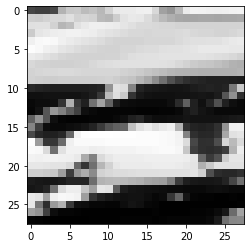

1/1 [==============================] - 0s 25ms/step
[[5.5556278e-08 9.0067960e-26 4.3384749e-32 6.6983298e-14 5.7956128e-23
  8.4971488e-38 8.0147708e-22 4.4592110e-05 1.5009399e-16 1.0490162e-32
  2.5677869e-01 9.7885041e-26 8.9961100e-20 3.9496037e-08 2.7628650e-30
  7.0827022e-22 4.8026521e-04 3.9482582e-22 6.4421840e-15 1.2536145e-22
  7.0102719e-19 2.8894659e-15 5.0134163e-35 2.1113715e-34 7.4269640e-01
  1.2323335e-32]]
y


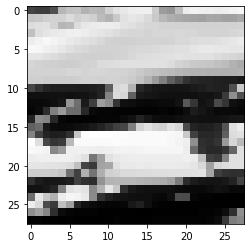

1/1 [==============================] - 0s 25ms/step
[[1.4017949e-08 1.8419819e-27 1.8609119e-32 1.5611276e-15 1.1294687e-21
  0.0000000e+00 3.4804008e-22 4.9558970e-05 3.1440974e-16 9.9122261e-33
  8.3613425e-01 6.9940184e-27 7.2245134e-20 1.0413537e-09 1.4063321e-30
  1.2572574e-21 4.7864784e-03 2.0184944e-21 3.3930259e-15 5.5081380e-23
  3.6543578e-18 3.3113069e-14 4.1646702e-36 4.5111134e-35 1.5902968e-01
  9.7721108e-33]]
k


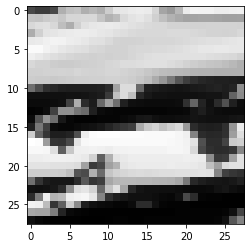

1/1 [==============================] - 0s 25ms/step
[[3.03219272e-09 4.65305662e-31 3.18923189e-34 1.00407008e-16
  2.54052369e-20 0.00000000e+00 6.70146189e-20 5.78948266e-06
  1.38747729e-16 1.94316989e-32 9.78692114e-01 3.83973346e-27
  3.31774260e-20 6.72940648e-10 8.87317115e-31 5.66958898e-19
  2.22565373e-03 2.66785745e-18 8.98503243e-15 2.02486206e-22
  1.69289196e-17 2.92713743e-13 5.02205056e-37 6.00407882e-36
  1.90763641e-02 1.11035705e-32]]
k


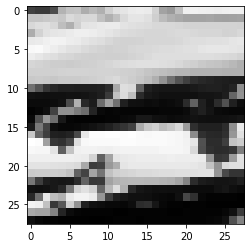

1/1 [==============================] - 0s 28ms/step
[[5.9074852e-09 2.5267881e-31 3.4018593e-34 9.5580978e-17 2.7066569e-20
  0.0000000e+00 3.5536697e-20 1.5605880e-05 1.9795795e-16 2.5314271e-32
  9.4517577e-01 5.9357473e-27 3.3126118e-20 1.1522604e-09 1.2061438e-30
  4.5260092e-19 8.7090181e-03 1.9459227e-18 1.2750898e-14 4.2057472e-22
  2.3018676e-17 5.7820751e-13 2.7738340e-37 9.0125462e-36 4.6099499e-02
  1.3489103e-32]]
k


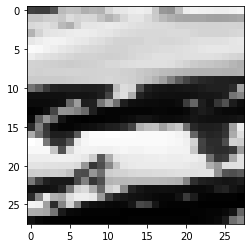

1/1 [==============================] - 0s 27ms/step
[[7.9583966e-09 1.8183867e-31 9.2277197e-34 1.0474390e-16 1.9817352e-20
  0.0000000e+00 4.3297955e-20 5.0777668e-05 3.7789703e-17 1.4802502e-32
  9.5690411e-01 2.6103056e-26 5.4494336e-21 3.7367170e-10 4.0078226e-31
  1.1615014e-19 2.4949279e-02 7.9761216e-19 4.4406088e-15 4.0855167e-22
  2.2192128e-17 6.8079044e-13 2.7563335e-37 4.6024001e-36 1.8095834e-02
  9.2047673e-33]]
k


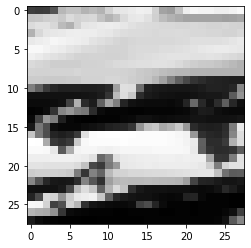

1/1 [==============================] - 0s 33ms/step
[[4.7583208e-09 9.3769831e-33 6.9389615e-34 6.3848728e-17 1.6598010e-19
  0.0000000e+00 5.7384602e-20 9.1330454e-05 6.4083224e-17 3.2462049e-32
  3.5198942e-01 3.7138326e-26 7.0373982e-21 3.1872438e-10 5.5041282e-31
  2.8934625e-18 6.0218096e-01 1.8664652e-17 3.2618489e-15 7.2935156e-22
  5.4349594e-17 5.4054066e-12 8.9811035e-38 5.2022732e-36 4.5738321e-02
  1.1606447e-32]]
q


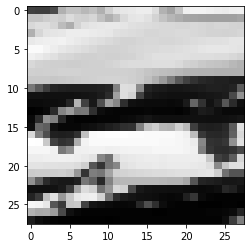

1/1 [==============================] - 0s 26ms/step
[[2.96941916e-09 5.90813217e-32 1.02283630e-33 7.08412101e-17
  6.38991285e-19 0.00000000e+00 1.27802403e-19 8.43189773e-05
  9.57763765e-16 9.76795310e-32 6.66688681e-01 2.70107114e-26
  6.68266034e-20 4.19607504e-09 3.56535900e-30 2.79486330e-17
  2.73299694e-01 4.92007359e-17 1.05198654e-14 3.75077617e-21
  4.07294403e-17 7.38085374e-12 6.25673397e-37 3.40835505e-35
  5.99272959e-02 3.39721012e-32]]
k


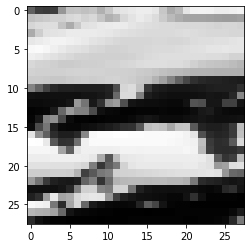

1/1 [==============================] - 0s 29ms/step
[[4.8833804e-10 3.1831112e-33 2.1355726e-33 6.2768463e-17 1.1214506e-18
  0.0000000e+00 7.3021488e-20 1.4437345e-05 5.1985156e-15 1.0618260e-31
  6.9200659e-01 6.7123977e-26 1.5977614e-19 6.1777552e-09 2.3202067e-30
  1.4079416e-16 2.8994405e-01 1.5059951e-17 1.8609111e-14 7.4526170e-21
  5.9014320e-18 2.0291666e-11 2.4653862e-37 5.4584063e-35 1.8034851e-02
  3.3057869e-32]]
k


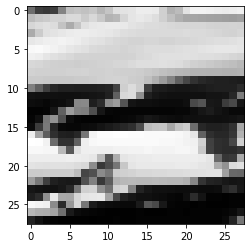

1/1 [==============================] - 0s 36ms/step
[[3.62863600e-10 1.03863843e-33 1.34052375e-33 5.25245594e-17
  1.22302169e-18 0.00000000e+00 8.61547188e-20 1.76552130e-05
  8.42786686e-15 9.81407891e-32 4.81156796e-01 1.04970787e-25
  2.13820644e-19 3.60167007e-09 2.60069267e-30 1.76899046e-16
  5.11950433e-01 1.64630862e-17 2.12712352e-14 2.25440951e-20
  8.69790506e-18 2.32395197e-11 8.42159918e-38 2.74820305e-35
  6.87517691e-03 2.68738345e-32]]
q


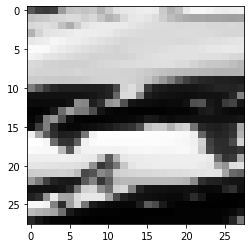

1/1 [==============================] - 0s 27ms/step
[[1.9960036e-10 1.1051884e-33 8.0065418e-34 4.6415486e-17 8.7099689e-19
  0.0000000e+00 4.7593219e-20 8.2160295e-06 6.4491009e-15 7.1889173e-32
  4.5053393e-01 4.7493506e-26 1.6855958e-19 2.3736439e-09 2.1827010e-30
  1.4193834e-16 5.4230249e-01 1.0593928e-17 1.9020332e-14 1.0701426e-20
  4.8891528e-18 1.4586728e-11 3.1148242e-38 2.1932201e-35 7.1553686e-03
  2.0507217e-32]]
q


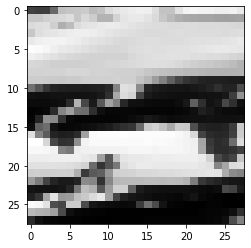

1/1 [==============================] - 0s 26ms/step
[[1.44569122e-11 6.19879899e-35 6.50610639e-35 7.08127867e-19
  8.55906527e-20 0.00000000e+00 7.19127217e-22 1.35330026e-06
  5.28614634e-17 3.26850980e-33 1.36364121e-02 7.62386841e-27
  6.72464466e-22 3.24113722e-11 1.34028020e-31 1.78321012e-18
  9.85118032e-01 4.35654574e-19 8.96231691e-16 3.78137559e-22
  3.68598738e-19 3.08150792e-12 0.00000000e+00 1.31365655e-36
  1.24413124e-03 1.05023257e-33]]
q


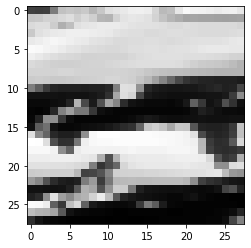

1/1 [==============================] - 0s 27ms/step
[[9.6089044e-13 5.1795622e-36 3.6425976e-35 1.8124305e-19 2.1214523e-20
  0.0000000e+00 3.0309879e-22 2.9364395e-07 1.6276377e-17 1.0501482e-33
  1.2889428e-03 5.1756948e-27 1.4349852e-22 4.4046359e-12 3.4952749e-32
  1.2950939e-18 9.9854529e-01 3.1604017e-19 1.2800114e-16 1.1177764e-22
  1.4761963e-19 1.6009716e-12 0.0000000e+00 7.3043779e-37 1.6557986e-04
  3.1743086e-34]]
q


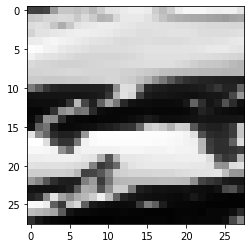

1/1 [==============================] - 0s 25ms/step
[[2.0030243e-12 1.3636737e-35 3.6286136e-35 3.3262243e-19 4.3080490e-20
  0.0000000e+00 3.7304361e-22 1.5363596e-06 3.8187796e-17 1.7616730e-33
  2.0692041e-03 9.2319791e-27 3.2752508e-22 1.2092277e-11 1.1264122e-31
  1.6297537e-18 9.9759990e-01 3.5708053e-19 3.3532512e-16 3.8645801e-22
  3.4416163e-19 1.3325828e-12 0.0000000e+00 1.5667844e-36 3.2929951e-04
  5.5851658e-34]]
q


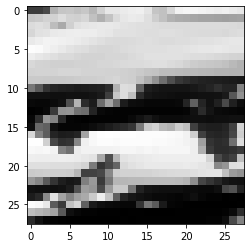

1/1 [==============================] - 0s 26ms/step
[[1.27556125e-12 2.06957131e-35 1.38762244e-35 1.26343063e-19
  1.03286658e-20 0.00000000e+00 1.87628749e-22 5.17728608e-07
  9.43887525e-18 8.23590097e-34 8.14703119e-04 1.24429904e-26
  1.16222132e-22 3.39386895e-12 2.47609686e-32 5.73427502e-19
  9.99030948e-01 3.21213671e-19 8.12838426e-17 9.10576084e-23
  2.65112601e-19 3.04876106e-13 0.00000000e+00 1.84572738e-36
  1.53831585e-04 3.12058623e-34]]
q


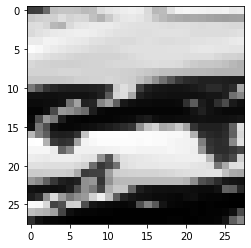

1/1 [==============================] - 0s 29ms/step
[[2.6060637e-13 5.2082138e-36 4.5712636e-36 2.5066054e-20 1.5044085e-22
  0.0000000e+00 1.9188308e-23 6.8434616e-08 1.6037052e-19 7.8916021e-35
  1.7655028e-04 1.3233001e-26 6.7846495e-24 1.1036811e-13 8.8325507e-34
  1.3784404e-20 9.9980348e-01 1.2546439e-20 6.2185333e-18 1.2833616e-23
  4.5965851e-20 4.5978531e-14 0.0000000e+00 7.5518693e-38 1.9943809e-05
  3.1077273e-35]]
q


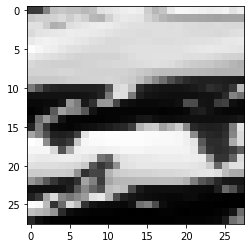

1/1 [==============================] - 0s 29ms/step
[[1.2673615e-13 4.5131475e-36 2.3331339e-36 1.2796770e-20 1.6400104e-23
  0.0000000e+00 5.2098133e-24 2.0442714e-08 1.2170955e-20 1.2380649e-35
  2.9876441e-05 4.4004383e-27 1.2714221e-24 1.6016665e-14 1.8064877e-34
  2.7237259e-22 9.9996328e-01 1.1324597e-21 7.4972859e-19 1.2928291e-24
  7.6137161e-21 1.0854381e-14 0.0000000e+00 0.0000000e+00 6.8349477e-06
  4.7186007e-36]]
q


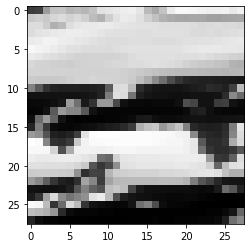

1/1 [==============================] - 0s 24ms/step
[[1.3165418e-13 2.9107592e-36 3.3295214e-36 6.1937035e-21 9.0631756e-24
  0.0000000e+00 2.7883001e-24 1.5983399e-08 5.1512608e-21 8.5304299e-36
  1.5903839e-05 9.5749071e-27 8.6740059e-25 6.9939790e-15 7.6520888e-35
  2.2881947e-22 9.9998116e-01 8.0586562e-22 4.9137780e-19 1.4346589e-24
  7.2579315e-21 1.0960385e-14 0.0000000e+00 0.0000000e+00 2.9884595e-06
  3.1854738e-36]]
q


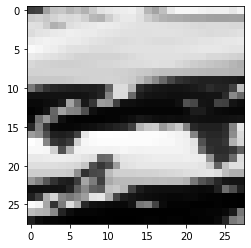

1/1 [==============================] - 0s 27ms/step
[[6.5032771e-14 2.2237528e-36 1.1418463e-36 5.5856308e-21 3.8004281e-24
  0.0000000e+00 7.1974846e-25 6.8724906e-09 3.0849727e-21 4.0381718e-36
  8.2677907e-06 3.0365912e-27 2.7989791e-25 2.4569180e-15 4.4986740e-35
  7.7292686e-23 9.9998939e-01 2.9055234e-22 3.2808472e-19 3.8939508e-25
  2.4848195e-21 3.3124689e-15 0.0000000e+00 0.0000000e+00 2.3440514e-06
  1.4774559e-36]]
q


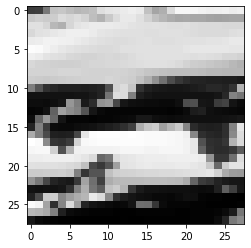

1/1 [==============================] - 0s 35ms/step
[[1.23306606e-12 3.93638390e-35 3.17449159e-36 9.19828719e-20
  5.07519816e-23 0.00000000e+00 1.05866175e-23 2.90056704e-07
  6.01147953e-20 3.54528264e-35 1.80787567e-04 4.43338404e-27
  4.17888454e-24 7.73695886e-14 4.66273059e-34 7.80439304e-22
  9.99785364e-01 2.73055511e-21 3.22681275e-18 2.77653618e-24
  1.88312222e-20 1.07147288e-14 0.00000000e+00 0.00000000e+00
  3.35866716e-05 1.42963933e-35]]
q


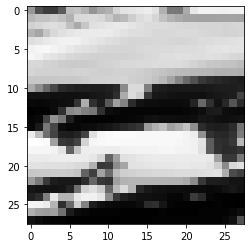

1/1 [==============================] - 0s 28ms/step
[[2.95536845e-10 6.02748641e-34 7.53342224e-33 1.05389904e-15
  2.07811692e-17 0.00000000e+00 2.81524743e-19 1.46505281e-05
  2.22769072e-14 1.84171483e-31 9.34194386e-01 7.25123409e-26
  1.03657667e-19 1.87483185e-09 5.75947168e-30 1.18938228e-15
  2.71376856e-02 3.37958390e-16 9.30236994e-15 3.78551065e-20
  1.22650477e-16 1.03747497e-11 1.70440927e-35 7.74738767e-35
  3.86532098e-02 3.70788181e-32]]
k


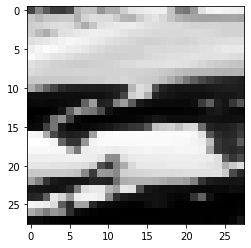

1/1 [==============================] - 0s 25ms/step
[[4.7471022e-13 2.2430662e-35 2.8477969e-33 2.1895308e-16 9.7438951e-17
  0.0000000e+00 5.6381246e-19 2.7580068e-06 1.3225820e-13 7.0852199e-32
  9.9593806e-01 6.3805944e-28 2.2343636e-20 4.5669859e-09 1.0644835e-28
  3.0474221e-15 8.8649631e-06 3.9258217e-17 1.0074548e-15 2.2476839e-19
  3.8622899e-17 2.3302668e-13 6.1120041e-35 5.4753564e-36 4.0503847e-03
  9.8432664e-33]]
k


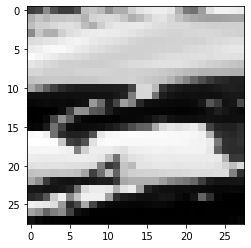

1/1 [==============================] - 0s 38ms/step
[[5.90933417e-14 7.03818131e-36 1.12094464e-30 1.70621760e-14
  1.46328885e-13 0.00000000e+00 2.25239911e-19 5.91400340e-06
  5.56364980e-12 1.07518453e-30 9.50513303e-01 1.02518345e-26
  8.50341670e-19 1.35472655e-08 5.18021768e-27 7.15957838e-13
  7.95170345e-05 1.64205875e-14 1.11738011e-14 2.29243164e-17
  2.46560993e-18 8.51527453e-13 4.00158940e-34 2.70254244e-35
  4.94012907e-02 1.00626901e-31]]
k


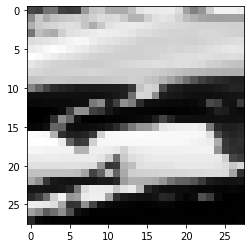

1/1 [==============================] - 0s 23ms/step
[[1.9494206e-14 2.7975987e-36 2.4659052e-30 3.0598455e-14 5.4164084e-13
  0.0000000e+00 3.6766441e-21 4.6623732e-06 7.4532134e-12 8.0786357e-31
  9.0577954e-01 5.8887292e-27 1.1758281e-17 6.2012645e-10 7.5765229e-27
  1.0578685e-13 7.8125560e-04 2.5929459e-15 3.7296521e-14 4.9828000e-17
  1.2123512e-19 1.4702775e-13 9.0007396e-35 7.7790642e-36 9.3434617e-02
  7.3430346e-32]]
k


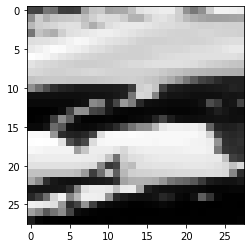

1/1 [==============================] - 0s 28ms/step
[[1.64169537e-14 1.72938203e-36 1.87974035e-30 8.42033081e-15
  1.55293706e-13 0.00000000e+00 8.56923410e-21 1.59175659e-06
  3.66759010e-12 5.92832787e-31 9.08324242e-01 3.19190783e-27
  3.16498141e-18 2.25094587e-09 3.94151116e-27 1.65058776e-13
  7.23626945e-05 3.44970346e-15 1.95901441e-14 1.08590625e-17
  1.63247648e-19 1.53241393e-13 9.64863097e-35 4.71682713e-36
  9.16017219e-02 5.48642416e-32]]
k


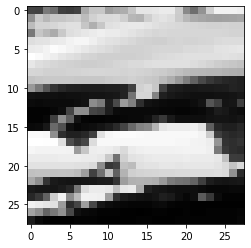

1/1 [==============================] - 0s 26ms/step
[[3.4690275e-14 5.4337829e-36 2.3800168e-30 2.4926489e-14 3.0861777e-13
  0.0000000e+00 2.3338880e-20 5.4245143e-06 7.7189028e-12 9.9436666e-31
  9.2746681e-01 6.2082078e-27 2.7024485e-18 4.2734212e-09 6.0298159e-27
  3.7842432e-13 2.3877277e-04 1.3388379e-14 1.8185169e-14 2.2725593e-17
  5.4260417e-19 2.5644867e-13 1.8020735e-34 1.8857552e-35 7.2289042e-02
  9.2227665e-32]]
k


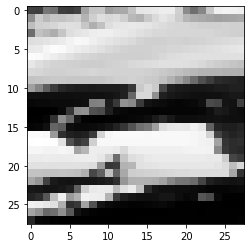

1/1 [==============================] - 0s 27ms/step
[[2.6931346e-14 9.3524674e-36 2.3074905e-30 8.6068603e-14 9.8313154e-13
  0.0000000e+00 9.1355430e-20 1.6901762e-05 1.3999135e-11 1.7218344e-30
  9.3054086e-01 1.7413239e-26 5.3621210e-18 6.9410389e-09 1.4209017e-26
  7.5549885e-13 4.9044867e-04 2.7212656e-14 1.2503355e-14 2.6450753e-16
  1.2705923e-18 3.6002551e-13 4.2139806e-34 3.5533616e-35 6.8951823e-02
  1.6304043e-31]]
k


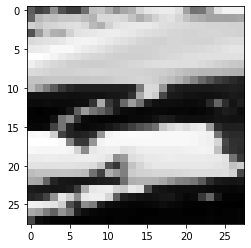

1/1 [==============================] - 0s 28ms/step
[[2.74243519e-14 5.95292724e-35 9.09625289e-30 4.18288912e-13
  8.80902296e-12 9.84342981e-37 4.10652202e-18 1.49777986e-03
  1.60123959e-09 1.44257314e-29 9.81930435e-01 6.97129645e-25
  3.39210027e-17 1.07015765e-07 3.56722433e-25 4.19090066e-12
  1.68699853e-03 8.03486238e-14 2.25493215e-14 3.00261091e-13
  6.60495249e-17 1.43309930e-12 1.22385992e-32 1.08743490e-34
  1.48847932e-02 9.82088008e-31]]
k


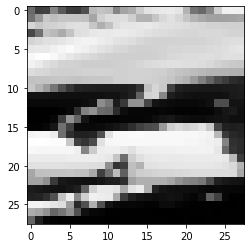

1/1 [==============================] - 0s 25ms/step
[[1.6925967e-15 9.2621608e-36 2.0296519e-27 4.0175542e-13 7.8234693e-12
  2.7808780e-36 9.3774995e-19 4.2769656e-02 9.3722736e-09 1.9056902e-29
  9.4921440e-01 3.5847559e-24 2.2302444e-17 1.9105585e-08 5.3918130e-25
  1.7566051e-11 5.7734135e-03 8.0311289e-13 1.2434313e-14 3.0307430e-12
  4.8713971e-16 3.8126876e-12 7.1708373e-33 4.0199418e-34 2.2424466e-03
  1.3382904e-30]]
k


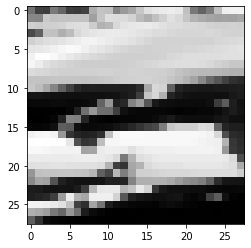

1/1 [==============================] - 0s 26ms/step
[[1.5982107e-16 3.4924304e-36 5.4402259e-27 4.6216557e-13 5.7188525e-12
  6.1617098e-36 2.5192507e-19 1.1191902e-01 8.1701854e-09 7.7508020e-30
  8.8642234e-01 4.2682325e-24 3.8977578e-18 1.4565033e-09 1.0754097e-24
  2.7995546e-12 1.1332267e-03 1.9778561e-13 2.1787460e-15 8.3050416e-12
  2.1058473e-16 9.1384864e-13 7.8766629e-33 4.0850452e-35 5.2543351e-04
  6.6741414e-31]]
k


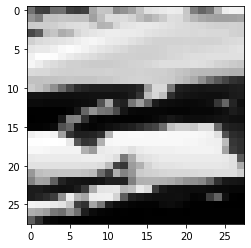

1/1 [==============================] - 0s 27ms/step
[[1.24128959e-16 7.24110906e-36 1.41537994e-26 8.28667538e-13
  3.96344797e-11 5.26481248e-35 1.12662010e-18 1.48208529e-01
  8.59101590e-09 1.56233574e-29 8.48257601e-01 3.24594048e-23
  1.87489543e-18 2.52888466e-09 3.93544483e-24 4.36149554e-12
  2.89685209e-03 5.66847784e-13 3.77214349e-15 5.33196785e-11
  1.10641614e-16 1.96944197e-12 2.02572354e-32 4.90644627e-35
  6.36980578e-04 1.45458483e-30]]
k


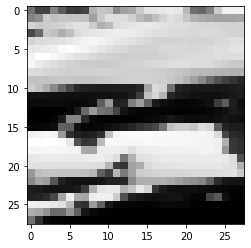

1/1 [==============================] - 0s 25ms/step
[[1.3631918e-16 6.2353748e-36 7.8919471e-27 6.7234288e-13 2.1928867e-11
  2.7575442e-35 7.3258605e-19 8.0134988e-02 7.3501387e-09 1.1395903e-29
  9.1657007e-01 1.7440350e-23 2.1098933e-18 2.8923672e-09 2.2621454e-24
  4.1090660e-12 2.7457166e-03 2.5852397e-13 2.9162447e-15 2.7715981e-11
  9.8844675e-17 1.4196028e-12 1.6578072e-32 3.2210436e-35 5.4927840e-04
  1.0159449e-30]]
k


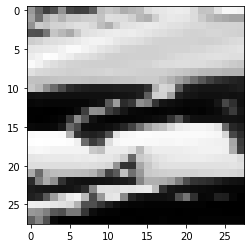

1/1 [==============================] - 0s 27ms/step
[[1.05656090e-19 8.58057726e-35 1.22631583e-25 1.52552485e-11
  2.47921345e-12 2.16136714e-33 1.71510238e-22 9.80637550e-01
  2.64202271e-10 7.85039665e-30 6.04228722e-03 4.03552209e-23
  5.06921563e-15 1.62624590e-12 2.68135463e-23 1.22420672e-12
  1.01450823e-04 1.18584453e-09 3.85061483e-14 4.01257153e-12
  9.55529761e-18 1.62638810e-13 4.39985067e-35 6.72703475e-36
  1.32186785e-02 1.42831149e-30]]
h


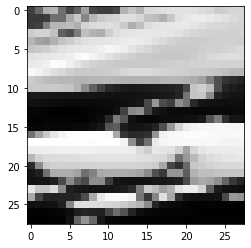

1/1 [==============================] - 0s 27ms/step
[[8.6788313e-20 6.3780090e-31 2.7701935e-24 7.9636992e-17 2.1823974e-28
  4.8512325e-21 4.3198117e-15 8.7700713e-01 5.2236749e-07 4.6042943e-31
  1.8102030e-09 1.7370868e-21 4.3932565e-19 4.4655894e-12 6.4638175e-21
  1.4420972e-05 5.7989166e-17 3.8806740e-12 3.7057273e-16 1.0215252e-18
  1.3736053e-19 9.9658106e-16 2.0979393e-31 3.8432702e-27 1.2297795e-01
  1.5865948e-31]]
h


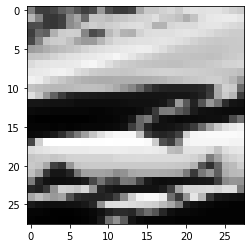

1/1 [==============================] - 0s 27ms/step
[[8.4060259e-16 1.4126027e-29 1.0817118e-13 6.0223520e-19 3.3967136e-18
  1.3164732e-16 1.5443827e-16 3.9840475e-04 9.9797362e-01 5.2589748e-30
  4.2829806e-09 6.1236155e-10 1.5104028e-25 1.2804538e-11 1.0921848e-18
  1.0389571e-06 2.8205932e-06 1.3984417e-23 1.6531226e-18 2.3749376e-17
  3.3895973e-24 4.0566903e-10 6.0232788e-24 1.8434676e-25 1.6240200e-03
  1.5673403e-30]]
i


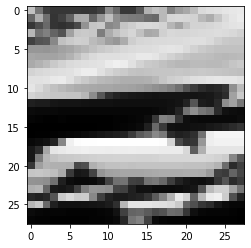

1/1 [==============================] - 0s 26ms/step
[[2.72848652e-17 6.47722439e-30 8.63580679e-21 1.75884670e-13
  5.02148236e-16 1.15202077e-19 7.66274030e-26 8.16482407e-06
  1.25315580e-06 9.93434667e-33 6.52275001e-14 1.31798504e-11
  4.07164731e-29 2.06018424e-15 3.64099170e-25 4.16669928e-11
  9.99990463e-01 2.67470499e-30 5.26768969e-24 4.25621986e-15
  1.41088093e-21 6.14679649e-08 1.76335417e-36 3.60899328e-25
  2.31853495e-10 1.56956524e-33]]
q


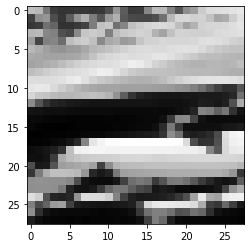

1/1 [==============================] - 0s 30ms/step
[[5.6881875e-22 7.5281156e-32 1.9283948e-23 1.8334593e-11 6.5384683e-17
  6.2096833e-23 3.4762860e-28 5.8095321e-07 1.0410649e-08 2.2155295e-34
  3.2232494e-16 1.0547967e-11 1.5363678e-28 8.0482612e-23 3.7484645e-29
  2.0914534e-11 9.9999928e-01 4.3984433e-29 1.2574351e-26 1.6504654e-20
  4.7374886e-22 1.8576210e-07 8.9503977e-33 9.5938510e-24 1.9007474e-12
  2.9211474e-35]]
q


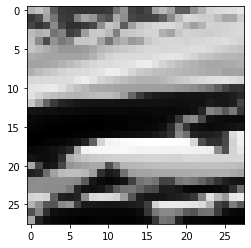

1/1 [==============================] - 0s 30ms/step
[[1.07319402e-22 3.32511922e-31 2.06717529e-23 1.20469093e-10
  9.23465389e-16 9.77228836e-23 2.44813294e-25 1.94367949e-05
  6.93592767e-07 1.70656360e-33 3.31422869e-16 3.71758979e-09
  1.45476443e-26 5.43351575e-24 5.91100701e-29 4.57107824e-11
  9.99979258e-01 2.90805043e-25 1.30300526e-23 2.95830936e-19
  2.80597698e-23 6.06363585e-07 3.11773216e-31 6.75359093e-23
  1.57260624e-15 2.69104475e-34]]
q


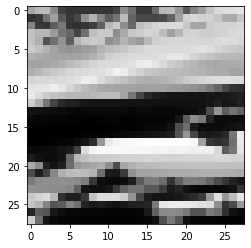

1/1 [==============================] - 0s 27ms/step
[[2.6580049e-24 6.4731500e-32 3.4802070e-24 6.1259844e-11 5.4604307e-16
  5.7232643e-25 6.8456943e-26 2.5252314e-06 6.9395338e-07 5.0108431e-34
  1.2705573e-15 1.8805084e-10 2.1140252e-26 2.2270808e-25 1.7463118e-30
  8.1515323e-13 9.9999547e-01 4.9970828e-25 8.4250147e-24 2.0244241e-19
  2.2294623e-24 1.2448146e-06 3.5849460e-32 6.8369581e-24 1.1148811e-17
  6.2245169e-35]]
q


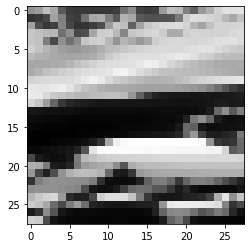

1/1 [==============================] - 0s 29ms/step
[[1.3184072e-25 2.8679932e-31 4.4296473e-24 4.0162024e-10 2.8417237e-17
  8.9273298e-25 1.3048330e-25 2.5801776e-07 5.6940507e-06 2.7038115e-34
  1.5674216e-14 2.2255550e-11 8.0287251e-27 4.6957660e-25 7.6070570e-31
  3.4170597e-14 9.9998200e-01 8.2309192e-27 3.5506961e-24 3.5306610e-19
  4.5534634e-25 1.2075452e-05 1.1566795e-33 3.4038378e-24 1.2603273e-20
  3.2640689e-35]]
q


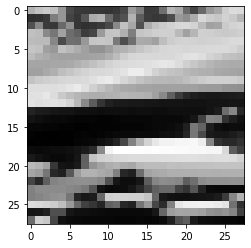

1/1 [==============================] - 0s 27ms/step
[[2.1550016e-29 3.9858222e-29 8.7070215e-24 9.2198610e-12 3.9575728e-18
  2.6936539e-20 1.2387911e-25 1.6932040e-10 1.8749232e-04 2.9331279e-35
  1.8310654e-18 5.0992077e-10 5.3231564e-27 9.7367045e-27 1.3414075e-30
  6.0542712e-17 9.9981219e-01 6.7155569e-28 3.0017501e-25 1.5110291e-16
  4.4256456e-27 3.5036410e-07 1.6612699e-31 5.3957912e-21 3.0945775e-26
  5.4278943e-36]]
q


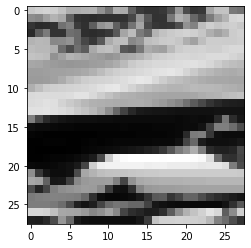

1/1 [==============================] - 0s 24ms/step
[[2.9099611e-30 1.1764570e-23 6.2947886e-25 6.7486690e-11 9.6357535e-17
  5.8058988e-15 1.1267339e-27 2.3621566e-15 4.9097627e-01 4.2111380e-33
  1.3050279e-17 2.4041057e-07 1.7629347e-23 1.2679594e-31 2.6295793e-25
  3.1423514e-15 5.0902355e-01 7.1538375e-23 1.6325711e-22 6.6738720e-12
  1.5899886e-24 2.3654060e-12 5.2097875e-11 7.2472499e-09 2.0457579e-23
  3.4573860e-33]]
q


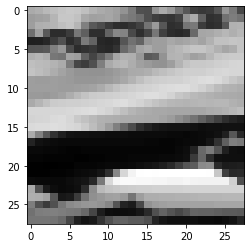

1/1 [==============================] - 0s 26ms/step
[[1.30767763e-31 1.84851931e-27 6.87130405e-20 1.64832772e-19
  1.71020927e-25 2.31733495e-07 2.16490841e-20 3.66887600e-21
  1.12448116e-13 5.05471295e-34 1.10140157e-16 9.99946237e-01
  1.60474644e-21 0.00000000e+00 9.81898284e-21 2.99653996e-10
  6.56430066e-09 7.26777827e-17 1.83458159e-20 7.79288269e-15
  0.00000000e+00 3.08147276e-23 5.23699200e-05 1.17112529e-06
  1.58223943e-26 2.88081385e-34]]
l


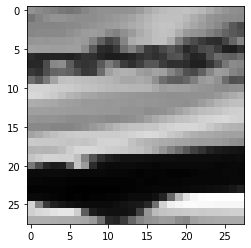

1/1 [==============================] - 0s 29ms/step
[[2.5771754e-20 3.6160009e-31 7.5998291e-06 1.8044381e-34 7.3407627e-13
  4.6854148e-06 4.8780474e-18 5.2251549e-21 2.3959104e-11 1.9036866e-34
  5.3936477e-30 2.9680988e-20 8.1091012e-21 6.0461291e-16 6.1958708e-21
  7.8449346e-13 1.9010964e-26 7.9029562e-38 2.4408294e-21 8.8589281e-16
  0.0000000e+00 1.1310342e-18 5.4294435e-15 9.9998772e-01 7.3600057e-26
  3.3239373e-34]]
x


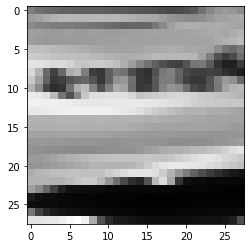

1/1 [==============================] - 0s 27ms/step
[[4.41110837e-09 1.54522151e-26 6.46065863e-28 8.60637990e-15
  1.22276390e-07 4.47046768e-05 3.28418196e-07 1.68013008e-15
  3.78101606e-10 4.02925639e-29 6.39724942e-17 7.61535331e-23
  1.01444366e-13 5.33296998e-07 1.49440646e-16 2.99484005e-12
  2.85748455e-23 1.44106872e-34 4.50232020e-15 9.99656558e-01
  1.84701936e-26 1.11870626e-34 1.74513515e-10 4.68302534e-13
  2.97712861e-04 7.08193149e-29]]
t


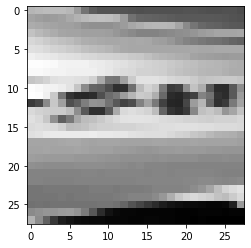

1/1 [==============================] - 0s 25ms/step
[[7.1273681e-11 9.7042651e-28 1.4096124e-24 9.9174943e-23 2.6906633e-24
  1.4050231e-23 6.5497784e-19 3.9475679e-17 1.5043794e-12 3.6670707e-30
  9.9999273e-01 9.2740369e-23 2.7381853e-20 1.1969267e-10 6.8987636e-25
  1.5140236e-11 5.8050688e-24 5.6096042e-30 5.0977107e-09 3.1820175e-14
  2.3420021e-30 3.6638821e-23 3.8028317e-25 2.5728597e-25 7.2663815e-06
  2.1608975e-30]]
k


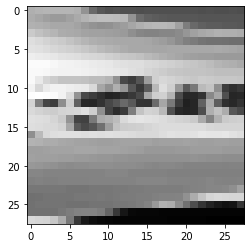

1/1 [==============================] - 0s 24ms/step
[[5.6998705e-16 2.7735164e-35 1.4918539e-24 1.4471705e-21 2.4049545e-26
  5.7423108e-26 3.1396120e-24 8.3136130e-20 5.3355321e-15 9.6983174e-32
  9.9993479e-01 1.4485786e-29 2.0763267e-18 1.4181148e-12 3.6036164e-27
  9.6156620e-15 1.4513541e-31 3.2407206e-31 6.4860433e-05 1.0280860e-14
  1.2166405e-32 9.2900047e-22 1.8475858e-30 1.1280423e-29 3.1536050e-07
  2.1868409e-32]]
k


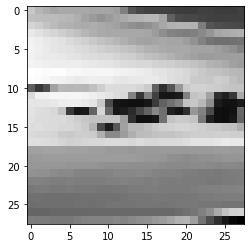

1/1 [==============================] - 0s 28ms/step
[[2.2380683e-18 2.6353966e-35 8.4054935e-26 3.6656239e-10 7.6264418e-20
  1.6370268e-23 6.5724165e-22 3.9315376e-14 4.8976109e-14 7.8345608e-29
  1.2847301e-09 3.5379042e-23 4.6318629e-15 1.6359072e-18 2.6177582e-23
  2.5483906e-13 1.7947934e-20 4.5181676e-22 1.2368926e-08 9.6517107e-16
  2.5491569e-26 3.3159188e-14 4.7772854e-32 1.0575313e-18 1.0000000e+00
  1.6958689e-29]]
y


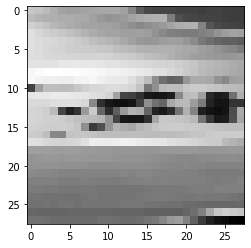

1/1 [==============================] - 0s 29ms/step
[[1.9213979e-11 4.9317450e-27 1.3829531e-17 1.5635384e-09 4.9335666e-13
  2.8118793e-19 1.0101438e-16 6.2350125e-15 8.5598401e-10 5.5971949e-25
  1.0487606e-03 1.6295651e-19 5.5106916e-06 1.0234372e-14 3.4140047e-22
  5.8948632e-12 5.5061350e-16 6.7003264e-23 2.4635915e-04 6.9729253e-08
  9.3076535e-25 3.7311925e-06 3.0494636e-25 9.2346202e-14 9.9869567e-01
  5.6588104e-25]]
y


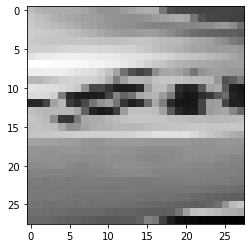

1/1 [==============================] - 0s 28ms/step
[[1.5057814e-11 3.4778602e-29 1.7511027e-27 1.2931284e-21 1.2662224e-28
  5.3178298e-22 1.5790996e-22 1.4063051e-19 1.2978955e-16 3.4925609e-31
  9.9999857e-01 2.2231564e-26 3.9872086e-19 7.1664095e-15 7.2356995e-27
  1.0967812e-14 1.7515821e-29 2.1707467e-33 1.4782217e-06 3.9797519e-17
  1.0622622e-30 7.1271418e-25 3.4640081e-23 5.5212770e-30 4.0193822e-09
  1.2248169e-31]]
k


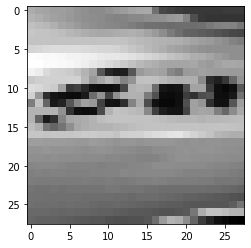

1/1 [==============================] - 0s 26ms/step
[[2.0334223e-12 2.6791945e-29 6.9133585e-32 8.0154053e-27 7.5773882e-32
  5.6040180e-23 2.1343304e-21 4.4865723e-19 1.6324928e-16 2.5163963e-32
  1.0000000e+00 1.7962594e-27 1.4322828e-20 2.1434332e-16 3.4051327e-24
  9.2896480e-12 2.0107159e-29 3.3782043e-34 2.1145599e-10 2.1170424e-21
  5.2436707e-28 1.3962913e-24 2.1469191e-31 4.6388389e-26 1.3226793e-11
  3.4966417e-33]]
k


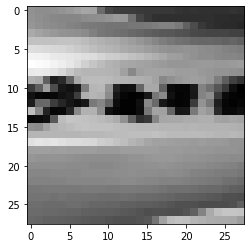

1/1 [==============================] - 0s 27ms/step
[[3.1731856e-18 1.2779820e-32 3.6050347e-23 2.8666314e-21 1.0960115e-21
  5.3610742e-20 3.8602807e-16 9.4466682e-20 8.5365564e-15 1.4203784e-31
  1.8744975e-06 1.8899140e-20 2.3866282e-17 2.8939495e-19 5.1832500e-25
  4.0866633e-14 4.6412286e-30 7.8937220e-32 1.4393954e-12 3.4349789e-15
  2.4657223e-27 8.6294133e-22 3.4946693e-21 5.9268289e-31 9.9999809e-01
  1.1156797e-32]]
y


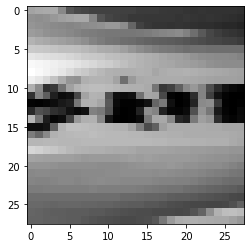

1/1 [==============================] - 0s 26ms/step
[[1.32554568e-16 7.74303508e-30 1.71634714e-22 3.57655977e-15
  7.37284940e-17 5.93401587e-19 2.93786805e-13 1.50274497e-16
  1.00327725e-07 2.44207782e-27 3.92673761e-02 2.85097704e-18
  2.07894258e-16 1.51399631e-13 1.46622966e-20 4.69763561e-10
  4.06747649e-20 5.04298168e-25 2.48996685e-07 1.21117665e-14
  1.44522783e-20 3.83131461e-13 1.23429207e-15 6.30198788e-22
  9.60732281e-01 1.42986239e-28]]
y


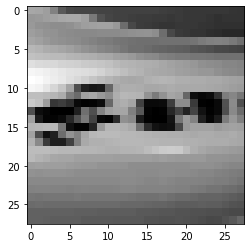

1/1 [==============================] - 0s 29ms/step
[[1.7489934e-22 1.4973595e-35 1.0846973e-26 4.8205709e-28 1.6833659e-20
  2.5246799e-28 2.5004600e-20 3.0418495e-21 1.2768729e-10 4.6041654e-32
  1.0000000e+00 5.9657823e-25 3.7487717e-19 3.5857254e-18 5.8541848e-26
  2.1745361e-19 3.7535753e-14 9.6868246e-24 9.6862658e-17 2.6379962e-24
  8.9405178e-23 4.3793912e-15 7.9417431e-29 1.7151445e-23 1.0279648e-14
  4.5342717e-32]]
k


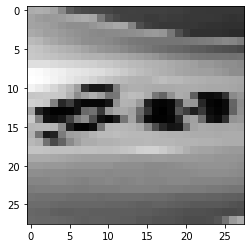

1/1 [==============================] - 0s 26ms/step
[[2.1054319e-18 1.4435351e-32 4.9323781e-23 2.1025481e-28 1.4115950e-20
  4.8444283e-27 2.4018189e-19 9.5268808e-20 9.5038200e-11 4.4563372e-31
  1.0000000e+00 1.3900966e-21 3.6467469e-21 6.3366766e-17 6.4092368e-27
  9.4041156e-20 5.7684855e-14 1.1937198e-23 1.2137163e-16 7.2280030e-22
  1.1993802e-22 7.2649119e-13 7.6164276e-31 1.9214284e-22 7.2677988e-12
  3.8227159e-31]]
k


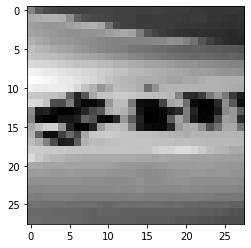

1/1 [==============================] - 0s 24ms/step
[[1.3895112e-24 0.0000000e+00 1.3971076e-30 1.9295051e-25 9.6084948e-19
  1.7552884e-31 2.9504570e-20 6.3554984e-21 4.9029760e-14 4.0695523e-32
  1.0000000e+00 1.5935325e-24 6.9548265e-19 1.3299021e-14 3.9807265e-26
  8.0300018e-20 9.4932039e-15 3.1812969e-20 5.0603117e-18 3.2769586e-24
  1.0510151e-20 6.4031168e-15 1.9704050e-28 4.8564735e-27 1.3892442e-12
  1.9926541e-32]]
k


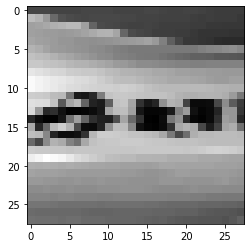

1/1 [==============================] - 0s 26ms/step
[[1.5401461e-30 0.0000000e+00 3.9487026e-29 1.6563382e-28 9.1796399e-22
  3.1249856e-33 2.1455147e-20 7.7833734e-24 4.5837593e-20 4.7823289e-35
  1.0000000e+00 1.3532333e-25 8.5391408e-24 5.1303055e-17 2.6146880e-28
  7.5864173e-23 1.3565997e-15 5.2556216e-22 1.8791876e-24 3.3721520e-27
  2.3776760e-22 7.7602350e-20 1.3507755e-29 9.1293733e-33 1.1457036e-11
  3.5673177e-35]]
k


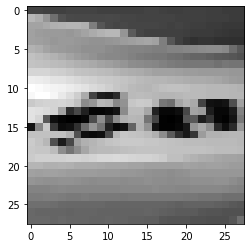

1/1 [==============================] - 0s 27ms/step
[[1.9916441e-21 1.6049311e-33 1.5253973e-23 2.5873692e-28 2.3024199e-14
  1.4318709e-28 6.3473560e-19 1.4198590e-16 1.7498421e-07 7.3572924e-30
  9.9999487e-01 1.5690732e-20 1.5165725e-23 4.0773444e-11 3.3909315e-26
  3.0188936e-17 5.0104804e-06 2.3462963e-17 1.9826703e-20 1.6056651e-19
  3.6929756e-17 2.0412558e-10 4.5490013e-28 1.1916538e-21 6.9877381e-12
  1.8617568e-29]]
k


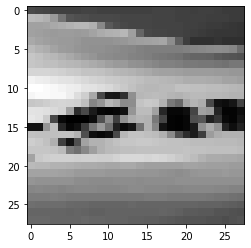

1/1 [==============================] - 0s 30ms/step
[[1.0350761e-19 2.0290658e-32 4.1841514e-24 1.7555216e-24 4.9727146e-14
  1.2446643e-27 1.9496639e-20 6.1605316e-14 1.6822463e-07 2.2189034e-28
  9.9930942e-01 1.6796594e-18 2.2986820e-23 4.3271289e-08 4.5036562e-24
  8.2168946e-17 6.9002266e-04 6.6042295e-15 5.1290103e-18 7.2367544e-20
  6.6117888e-16 3.2181543e-07 1.3502869e-27 3.3209205e-20 4.7730766e-09
  4.6284213e-28]]
k


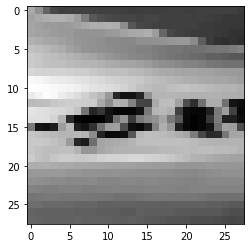

1/1 [==============================] - 0s 28ms/step
[[1.81970967e-18 1.19422255e-35 1.84680119e-26 9.33733592e-21
  1.96893175e-13 1.86353523e-29 7.72085384e-25 1.57173746e-17
  4.26351038e-10 1.20705529e-28 9.90368664e-01 9.72713425e-19
  4.86629234e-23 3.39250050e-07 2.15716957e-26 3.51512552e-17
  9.62658506e-03 1.17146224e-15 8.81523722e-14 4.53363961e-21
  1.96489128e-17 4.27175610e-06 1.17516438e-29 2.09175740e-19
  9.00984816e-08 2.38913319e-28]]
k


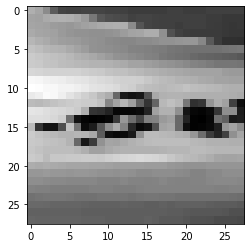

1/1 [==============================] - 0s 25ms/step
[[3.23837954e-16 2.26222410e-35 6.54782201e-24 8.41176095e-19
  2.06935344e-10 7.60013785e-29 8.53892330e-25 2.92774093e-17
  5.44534107e-09 2.90473145e-27 2.10787252e-01 1.90612125e-16
  1.67732421e-20 1.61142680e-06 1.47974359e-26 3.29075836e-15
  7.89107442e-01 2.50951044e-15 2.35538498e-12 7.41283332e-17
  3.87528558e-16 1.03511564e-04 1.37901192e-30 2.65181425e-16
  1.61042280e-07 4.21854732e-27]]
q


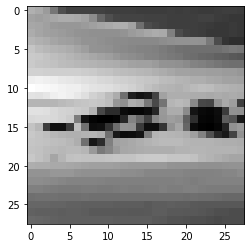

1/1 [==============================] - 0s 35ms/step
[[1.5894663e-18 5.7648796e-36 3.4276347e-23 5.3440324e-17 1.5263238e-09
  1.1764646e-26 8.7754354e-24 4.0111159e-17 3.6118852e-10 2.0580277e-27
  6.9246824e-05 3.5965547e-14 5.1305564e-22 1.3549879e-08 7.5898939e-26
  3.0614795e-15 9.9375004e-01 1.2312245e-16 8.8537996e-12 7.8129370e-14
  1.9402871e-15 6.1804224e-03 2.3343066e-31 1.4597120e-14 2.5312539e-07
  9.2796243e-27]]
q


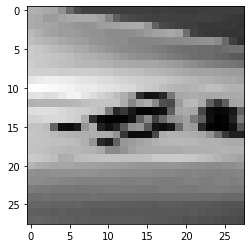

1/1 [==============================] - 0s 28ms/step
[[1.3128977e-18 1.1357795e-35 1.2942025e-23 8.9876220e-16 3.5504303e-12
  4.4429826e-26 7.3844287e-21 1.9725412e-17 1.3049463e-10 4.0589678e-27
  2.4334790e-09 9.3386661e-12 9.4495506e-21 3.0156617e-11 8.8415609e-25
  1.4494051e-15 9.7083765e-01 1.2027679e-16 7.8746749e-12 4.6948179e-12
  1.0166804e-15 2.9155601e-02 6.8485880e-33 2.2484396e-11 6.7699120e-06
  1.1367685e-26]]
q


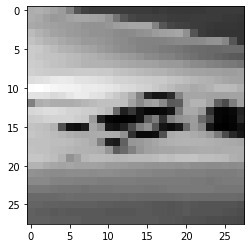

1/1 [==============================] - 0s 26ms/step
[[5.2846682e-20 3.1202008e-35 1.1115854e-23 1.4274009e-13 6.2625131e-15
  2.0686166e-25 4.7655889e-18 2.1597133e-16 1.3879091e-09 2.3756636e-26
  3.8715882e-07 1.6957062e-11 2.8301145e-20 1.9047023e-11 4.4980566e-22
  1.3614609e-14 4.7408521e-01 1.1353148e-14 4.0665311e-11 1.2916769e-12
  1.8278774e-15 4.9165317e-01 4.5261830e-29 4.6891720e-11 3.4261290e-02
  1.0480319e-25]]
v


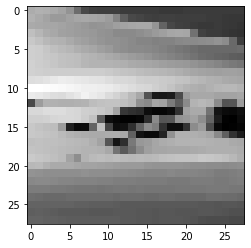

1/1 [==============================] - 0s 25ms/step
[[1.2635609e-19 3.6121369e-34 8.5894149e-24 1.1294944e-12 3.0074361e-17
  1.4458441e-24 4.9570439e-17 3.1670623e-16 3.8187773e-09 5.3514826e-26
  9.4544457e-06 2.3918695e-12 5.0602852e-20 5.9647776e-10 4.4317425e-21
  6.1342528e-15 1.8083033e-01 6.2340151e-15 1.4182135e-10 4.2067966e-13
  2.3415519e-16 6.3778549e-01 1.5113270e-27 6.2379754e-11 1.8137473e-01
  1.5132725e-25]]
v


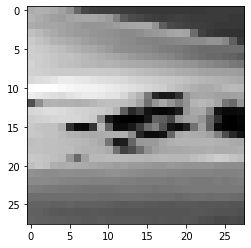

1/1 [==============================] - 0s 28ms/step
[[1.71090781e-19 1.03941675e-36 2.00340279e-24 4.17458765e-14
  1.01387387e-17 3.08255485e-25 3.92699297e-17 7.26479459e-16
  1.22513846e-10 2.21001262e-26 4.46399127e-07 2.53940896e-11
  5.74314472e-20 7.29419636e-10 1.22487243e-21 3.73556268e-15
  3.06920819e-02 8.53101701e-14 2.38955600e-12 9.98732672e-13
  5.75741529e-16 9.67324257e-01 1.00128158e-26 1.20825008e-12
  1.98321301e-03 4.51755865e-26]]
v


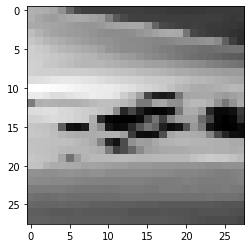

1/1 [==============================] - 0s 28ms/step
[[1.20920315e-20 5.20188716e-37 5.21386019e-24 9.87909011e-15
  1.23415038e-14 1.06693610e-25 9.23208113e-19 2.69370242e-16
  4.74516815e-11 5.62666904e-27 2.02044475e-07 6.35607105e-12
  4.80434012e-21 2.99301382e-11 8.08093523e-23 1.05388856e-14
  6.87216595e-02 1.34264277e-14 1.37706090e-12 5.89278452e-12
  1.89441142e-15 9.31181788e-01 1.65667278e-28 1.85210853e-12
  9.63577622e-05 2.76166244e-26]]
v


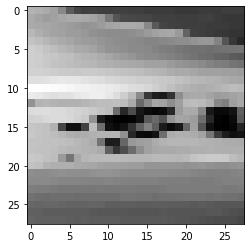

1/1 [==============================] - 0s 40ms/step
[[3.7014853e-20 1.5345320e-36 3.8943150e-23 1.8484295e-14 3.6657363e-13
  9.8300391e-25 2.1100346e-18 8.0177566e-16 1.4991440e-10 2.0664775e-26
  3.2678921e-07 4.9446613e-11 5.7474654e-21 1.1178604e-10 1.3850750e-22
  6.9638292e-14 2.5668800e-01 1.4630011e-14 2.1118610e-12 1.2853348e-10
  1.3657232e-14 7.4319774e-01 1.6960665e-28 2.0125563e-11 1.1389510e-04
  1.0668978e-25]]
v


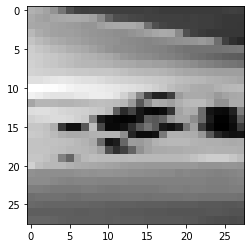

1/1 [==============================] - 0s 27ms/step
[[6.1259439e-20 1.0623305e-36 2.8462499e-23 5.9739705e-15 5.1156150e-13
  1.7213253e-25 4.4937709e-19 6.6525052e-16 1.8305449e-11 5.4255072e-27
  6.4476325e-08 1.2751680e-10 9.7833232e-22 2.7261632e-10 1.5078251e-23
  2.5554938e-14 9.5674813e-01 3.9581321e-14 4.3364601e-13 1.1045594e-11
  1.5436002e-15 4.3241035e-02 7.4673006e-30 2.9547012e-12 1.0675103e-05
  2.8163071e-26]]
q


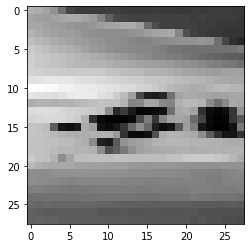

1/1 [==============================] - 0s 25ms/step
[[8.5141292e-19 2.3674179e-36 5.3318585e-23 4.1279629e-14 7.3020747e-12
  3.1385627e-25 1.8572648e-21 1.1539134e-16 2.8689918e-11 8.8257781e-27
  1.6540119e-08 1.4565804e-10 3.1349929e-20 6.5795994e-11 8.9355505e-24
  7.4272194e-15 9.3699521e-01 1.8948197e-15 7.6801447e-12 6.0500082e-12
  6.7335236e-15 6.3002542e-02 5.4943777e-31 6.1403410e-11 2.2116226e-06
  2.8362757e-26]]
q


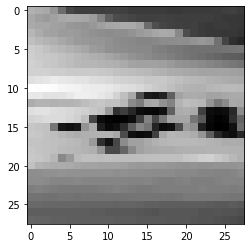

1/1 [==============================] - 0s 38ms/step
[[7.93538246e-19 1.97133412e-36 8.72044899e-23 7.41972401e-14
  5.04578584e-12 1.02520501e-24 2.87854620e-20 6.85855759e-16
  8.59952803e-11 1.89853690e-26 3.75853837e-08 1.29947553e-09
  1.23037300e-20 4.04575456e-10 2.77218723e-23 1.88527969e-14
  7.21925199e-01 1.10773876e-14 6.96137202e-12 1.45368041e-11
  2.98103657e-14 2.78070152e-01 1.02155575e-30 2.36795666e-10
  4.54659630e-06 6.94734145e-26]]
q


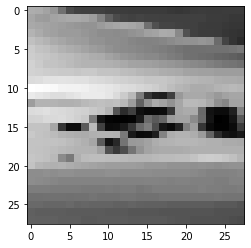

1/1 [==============================] - 0s 28ms/step
[[5.3131917e-20 9.0070587e-37 1.6696178e-23 1.5791721e-14 5.7628614e-13
  3.5487221e-25 2.2615017e-19 4.8545666e-16 3.8380039e-11 6.6798392e-27
  1.9895385e-08 8.3114231e-11 8.6691759e-22 9.4202660e-11 2.4193562e-23
  2.6767952e-14 9.4991618e-01 9.0277297e-15 1.1201993e-12 1.3765979e-11
  2.3308392e-15 5.0050929e-02 4.8756899e-30 9.7679096e-12 3.2919826e-05
  3.5774408e-26]]
q


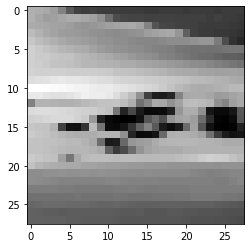

1/1 [==============================] - 0s 27ms/step
[[5.3006932e-20 1.3739397e-36 5.8888056e-23 1.1129620e-14 1.0848483e-13
  3.8268601e-25 9.7362415e-19 3.2877311e-16 1.7774844e-10 1.2449277e-26
  1.1671892e-07 8.7695629e-11 2.9313649e-21 5.7742238e-11 7.5757254e-23
  7.2140603e-14 4.3298668e-01 8.6574619e-15 2.7293812e-12 3.3101837e-11
  4.5801752e-15 5.6656051e-01 1.2683718e-28 2.1498569e-11 4.5277891e-04
  7.1082586e-26]]
v


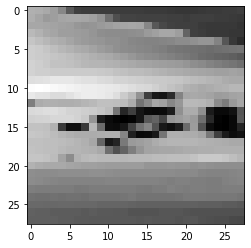

1/1 [==============================] - 0s 27ms/step
[[7.2406525e-20 2.9765030e-36 4.6760330e-23 2.3306974e-14 1.9566197e-13
  2.3255114e-25 7.4760010e-19 1.8290242e-16 3.1202341e-10 1.9434293e-26
  3.6499821e-07 3.0394593e-11 3.4714402e-20 1.5311429e-11 1.1423024e-22
  3.4026123e-14 4.6952820e-01 6.1872047e-15 2.4429169e-11 1.8225964e-11
  9.9136389e-15 5.2909827e-01 1.9154150e-28 8.7757801e-11 1.3731758e-03
  1.1570627e-25]]
v


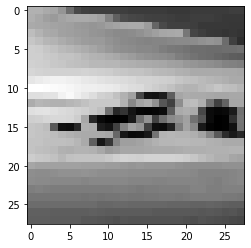

1/1 [==============================] - 0s 26ms/step
[[1.6641155e-19 5.8657760e-36 6.0747500e-24 9.9913772e-16 6.5357429e-12
  6.8583381e-28 7.5480811e-22 4.4033368e-18 2.4236680e-11 2.1936223e-27
  2.9232645e-09 3.6729101e-12 1.4105661e-20 4.8573229e-12 3.6200290e-25
  8.9017149e-16 9.0979111e-01 3.8031499e-16 3.5567736e-11 7.9310544e-13
  8.4500205e-17 9.0164028e-02 8.8535839e-33 1.2944734e-11 4.4933924e-05
  6.8182473e-27]]
q


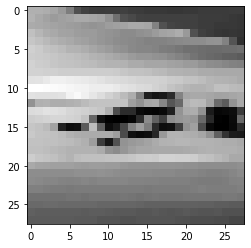

1/1 [==============================] - 0s 26ms/step
[[4.05853381e-21 6.32074752e-37 7.11921723e-24 2.48196324e-14
  7.21014448e-13 3.25076914e-26 6.09042293e-20 8.02406686e-17
  3.98621622e-11 2.67889903e-27 3.44250384e-09 6.28586549e-12
  3.66477438e-22 1.75988662e-12 1.29650126e-23 5.29762198e-16
  3.06054175e-01 1.24260210e-16 4.07440852e-11 2.02089734e-12
  3.18961294e-16 6.93644404e-01 1.09855693e-30 1.16011029e-11
  3.01402470e-04 1.20241446e-26]]
v


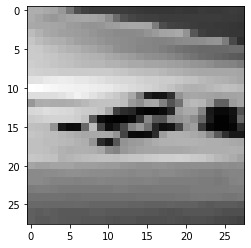

1/1 [==============================] - 0s 41ms/step
[[6.7432579e-21 1.2088289e-36 1.2599102e-23 3.4430734e-14 1.5933225e-12
  3.6104845e-26 4.4676112e-20 4.6664034e-17 3.4890708e-11 3.0756886e-27
  1.9621722e-09 2.0476712e-11 1.6396715e-21 2.3206595e-12 1.8091908e-23
  8.6094292e-16 7.5328887e-01 2.7406757e-16 4.9222369e-11 2.2085595e-12
  4.5073524e-16 2.4655513e-01 3.5137724e-31 3.4768740e-11 1.5594177e-04
  1.5103825e-26]]
q


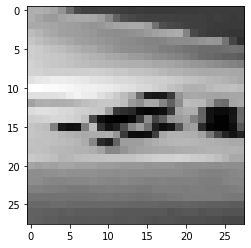

1/1 [==============================] - 0s 27ms/step
[[6.25473331e-20 1.09045585e-36 1.13035642e-23 2.49505854e-14
  2.84111905e-12 3.23013242e-26 1.76922915e-20 2.26243327e-17
  1.68256676e-11 4.72744927e-27 2.37044495e-09 4.02701622e-11
  1.63688154e-20 3.95957919e-12 7.91370903e-24 2.86191808e-15
  8.03980410e-01 6.43249949e-16 2.86439223e-11 1.33661094e-12
  2.95619136e-15 1.95885152e-01 8.69164379e-31 7.47675116e-11
  1.34444301e-04 2.05567353e-26]]
q


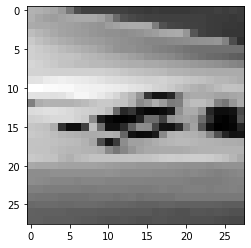

1/1 [==============================] - 0s 26ms/step
[[4.9767940e-21 7.0543696e-37 6.8231214e-24 2.4833029e-14 2.0835953e-13
  3.4678520e-26 4.8542270e-20 2.4772015e-17 4.8069739e-11 3.0897989e-27
  2.4715446e-08 1.4760410e-11 2.1083364e-21 8.2303809e-13 3.3393722e-23
  1.0110538e-15 6.1185879e-01 1.9147010e-16 2.1929153e-11 1.8142381e-12
  5.5124809e-16 3.8779816e-01 1.5306337e-29 2.4402922e-11 3.4300907e-04
  1.8277850e-26]]
q


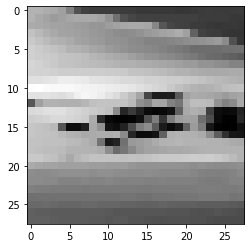

1/1 [==============================] - 0s 38ms/step
[[8.2197333e-21 3.2915828e-37 3.8441965e-24 2.3162184e-14 1.1656051e-15
  2.3758036e-26 2.2655361e-20 1.1813743e-17 3.4916622e-11 2.0034292e-27
  6.7041377e-08 1.4983032e-11 7.1401471e-21 6.6285573e-13 6.6057937e-23
  3.4606966e-16 4.5693371e-02 4.3232686e-16 1.8313951e-11 2.3937723e-13
  2.7498509e-16 9.5245379e-01 1.2017950e-28 1.1966494e-11 1.8528207e-03
  1.1781557e-26]]
v


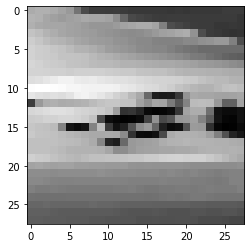

1/1 [==============================] - 0s 26ms/step
[[2.0233720e-21 2.2810124e-36 1.7247736e-24 3.7462711e-13 3.7216023e-16
  3.9957540e-26 1.3249733e-19 3.5993874e-17 1.4780732e-10 4.9820406e-27
  9.3549311e-08 1.8533974e-12 6.5566413e-20 5.6791599e-13 8.8722926e-22
  3.5312793e-16 3.2051738e-02 8.9288178e-16 1.3850986e-10 6.9031911e-14
  7.1769935e-17 9.2101049e-01 2.8118776e-27 2.6633152e-11 4.6937607e-02
  1.9490248e-26]]
v


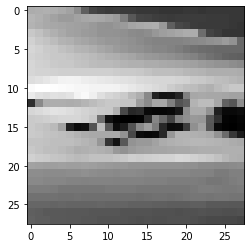

1/1 [==============================] - 0s 26ms/step
[[8.1374022e-21 4.1692179e-35 7.8595144e-25 5.8252912e-12 2.5024589e-17
  4.9767688e-26 8.7271049e-19 3.2782110e-16 1.7298361e-09 3.1186146e-26
  6.0202774e-07 2.1985538e-12 2.0189285e-18 1.4741409e-11 1.2344699e-20
  7.7529444e-16 6.8945952e-02 7.8537742e-14 2.2522362e-09 3.2985916e-14
  6.5387496e-17 5.0662088e-01 3.2429683e-27 1.0624489e-10 4.2443261e-01
  6.8734122e-26]]
v


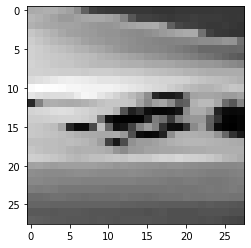

1/1 [==============================] - 0s 36ms/step
[[6.47191645e-21 9.91339500e-36 6.52995786e-25 1.04285200e-12
  1.41231577e-17 7.60838594e-26 5.06932107e-19 1.91214406e-16
  6.48633702e-10 1.28906066e-26 2.31283991e-07 9.70886782e-13
  1.43696027e-18 6.93787736e-12 3.98163913e-21 2.19363878e-16
  7.85267353e-03 1.06157301e-14 4.89086105e-10 4.72211076e-14
  8.68955285e-17 8.78779531e-01 1.86036605e-26 1.15330905e-11
  1.13367505e-01 2.81281914e-26]]
v


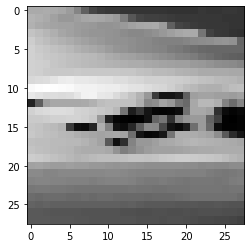

1/1 [==============================] - 0s 29ms/step
[[9.6243925e-20 4.5757108e-37 1.2342952e-24 5.3512755e-13 3.5482207e-17
  3.2441145e-25 1.3733455e-18 3.8566310e-16 1.4479690e-10 2.6241178e-26
  4.6197715e-07 8.8868444e-12 8.0291055e-18 1.3943764e-11 1.0427584e-20
  6.2123286e-16 6.4987205e-03 1.8693601e-13 1.9024116e-10 4.2744457e-14
  6.3251248e-16 9.2846328e-01 2.4180699e-25 7.7426867e-12 6.5037578e-02
  4.1718370e-26]]
v


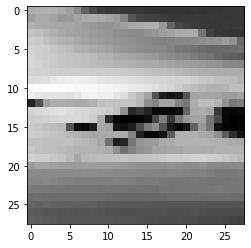

1/1 [==============================] - 0s 24ms/step
[[1.00576917e-19 2.54367761e-38 1.02736186e-24 3.28492414e-13
  2.51576743e-17 9.18542440e-25 6.67469531e-18 8.63273163e-16
  5.56959062e-11 3.80517196e-26 1.19798784e-07 8.12546835e-11
  3.53025068e-17 5.28283407e-12 4.15206734e-20 9.16345124e-16
  1.59342471e-03 1.65476964e-12 1.23274876e-10 1.89656047e-14
  1.72338552e-15 8.64166081e-01 4.14894057e-24 1.23823885e-11
  1.34240359e-01 5.30829002e-26]]
v


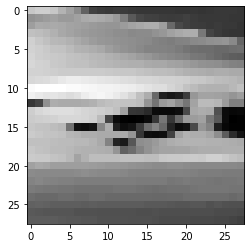

1/1 [==============================] - 0s 34ms/step
[[2.5303146e-20 0.0000000e+00 4.2772255e-25 5.3646368e-14 5.6355972e-18
  4.5393672e-24 9.0857477e-18 1.0256625e-15 4.5777233e-11 1.9946023e-26
  2.7056370e-07 1.1659025e-11 2.3812616e-17 4.4777211e-12 1.0183659e-19
  1.6556438e-15 9.6329121e-04 2.3169783e-13 6.4607993e-11 1.2381772e-14
  4.6226881e-16 1.5714680e-01 1.7118132e-23 7.2781703e-12 8.4188968e-01
  2.9538761e-26]]
y


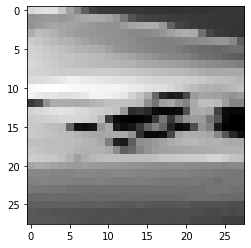

1/1 [==============================] - 0s 27ms/step
[[7.6135519e-20 0.0000000e+00 2.0519481e-24 9.9775507e-14 1.9302311e-17
  3.2214034e-23 1.5381751e-17 1.3675502e-15 1.8095662e-10 4.5289537e-26
  1.9924784e-07 1.4046758e-10 9.6676456e-17 7.1134977e-12 3.9283128e-19
  7.4849040e-15 1.0483335e-03 3.4301904e-13 6.5917508e-11 1.7930926e-13
  4.8198568e-16 1.3537844e-01 6.8179689e-23 3.0266966e-11 8.6357307e-01
  7.1711814e-26]]
y


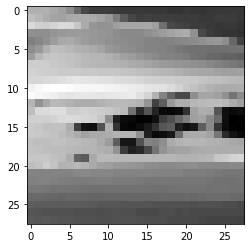

1/1 [==============================] - 0s 25ms/step
[[3.8071986e-23 0.0000000e+00 8.5125161e-26 1.3766162e-15 5.9682593e-16
  1.0539912e-23 8.4151266e-14 3.2211487e-14 4.1321974e-10 8.5081009e-26
  1.0929775e-06 1.6849414e-12 8.5079036e-19 1.2142880e-10 3.9929629e-19
  7.0946027e-11 4.1149106e-02 1.9961448e-08 1.7403081e-12 2.7911958e-13
  1.6203241e-16 1.5505675e-02 1.6827593e-21 1.1896041e-12 9.4334406e-01
  1.9706158e-25]]
y


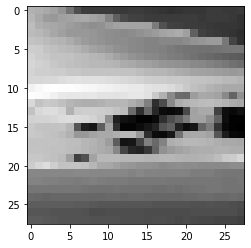

1/1 [==============================] - 0s 25ms/step
[[2.7189909e-24 0.0000000e+00 4.7889872e-26 1.3105208e-14 3.1302937e-15
  8.2107977e-26 2.1170804e-12 4.9767878e-14 1.5542574e-12 4.0374265e-26
  3.1314499e-05 6.5653684e-13 6.8604001e-20 4.2721910e-09 2.0660520e-19
  6.6352246e-13 9.9176592e-01 3.3468136e-06 3.0877856e-13 1.6833648e-14
  2.7501069e-17 1.8257071e-03 8.6821724e-24 6.5064124e-14 6.3736569e-03
  8.3198892e-26]]
q


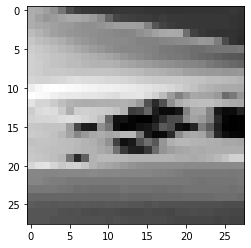

1/1 [==============================] - 0s 26ms/step
[[4.8478346e-24 2.2661552e-37 4.6836989e-26 7.6406722e-14 3.6041743e-15
  4.3000063e-25 7.7601189e-11 4.2816736e-14 5.6965202e-13 3.3452593e-26
  8.4261417e-05 9.1037941e-13 4.9695460e-22 9.6153258e-08 1.7010597e-19
  1.7297851e-13 9.9258089e-01 1.4473284e-05 2.1136444e-13 8.3590116e-15
  6.2393340e-18 1.4926543e-04 6.4039615e-25 2.5187995e-14 7.1710125e-03
  6.7306993e-26]]
q


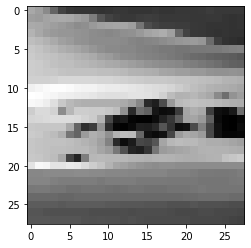

1/1 [==============================] - 0s 33ms/step
[[1.4781776e-24 4.6310653e-36 1.3238375e-24 2.0076921e-15 4.8955751e-15
  3.6875226e-27 6.4703250e-11 5.5193588e-16 3.0549558e-14 3.4856470e-27
  2.6298830e-02 2.6278769e-14 2.0885851e-23 1.7814988e-06 2.2814290e-21
  5.2838572e-15 9.7160113e-01 1.5210146e-06 8.5962535e-14 2.7785082e-15
  1.6185494e-18 1.2019241e-05 1.1061692e-27 1.3054930e-16 2.0847376e-03
  1.3339137e-26]]
q


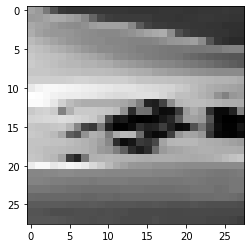

1/1 [==============================] - 0s 33ms/step
[[8.05238525e-24 3.85162117e-35 2.49319205e-23 4.28116286e-15
  9.71811573e-15 1.17705196e-26 2.58911781e-09 7.28992638e-15
  1.50427373e-13 1.87199728e-26 2.63936371e-01 1.03412762e-13
  1.66287209e-22 6.18265185e-05 8.07143374e-21 3.80690488e-14
  7.07564056e-01 7.35567664e-05 1.57455180e-12 3.50616176e-14
  4.31850682e-17 2.04820390e-05 3.10427744e-27 3.00622687e-16
  2.83436738e-02 9.20354466e-26]]
q


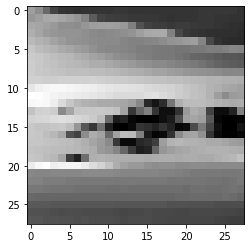

1/1 [==============================] - 0s 31ms/step
[[1.8600985e-23 1.0812653e-34 3.6641504e-23 3.2207744e-15 1.1965351e-14
  2.5599965e-26 3.0779177e-08 1.1599058e-13 7.7027013e-13 6.8957142e-26
  1.4410642e-01 7.1907660e-13 2.4639022e-22 2.2398031e-04 5.4947611e-20
  2.6230624e-13 6.5261739e-01 4.2176787e-03 1.2636429e-11 9.7178816e-14
  3.5242079e-16 3.0489762e-05 2.2138955e-26 4.4829604e-15 1.9880408e-01
  3.6885630e-25]]
q


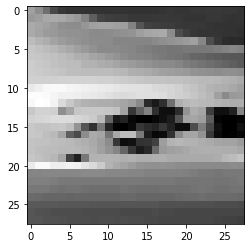

1/1 [==============================] - 0s 26ms/step
[[2.45232148e-23 5.02057081e-35 2.14902860e-23 2.49551492e-15
  2.73878159e-14 1.26618870e-26 2.17390426e-08 8.46369754e-14
  1.01604532e-12 7.46415751e-26 1.85156032e-01 2.93587095e-13
  3.67194733e-22 2.20998860e-04 2.75379670e-20 3.18930836e-13
  6.84193075e-01 3.14211287e-03 1.21101107e-11 1.01920866e-13
  5.12050051e-16 7.85985758e-05 2.66205704e-26 2.94303863e-15
  1.27209187e-01 3.51265069e-25]]
q


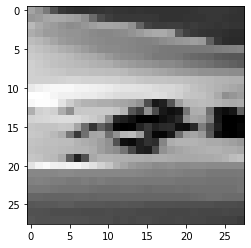

1/1 [==============================] - 0s 32ms/step
[[6.0277483e-25 3.6797095e-36 4.6685558e-25 1.6468023e-16 5.4402210e-16
  4.6444268e-28 1.0183189e-08 2.6657863e-14 6.0751762e-13 2.4206648e-26
  1.9972004e-01 3.3925171e-15 6.7592455e-22 6.6496345e-06 1.8794124e-20
  2.7716791e-13 5.7231587e-01 4.6216063e-03 6.8437435e-12 2.8202635e-15
  6.6559971e-16 3.1670927e-06 1.1981339e-25 1.1850532e-15 2.2333267e-01
  1.1170818e-25]]
q


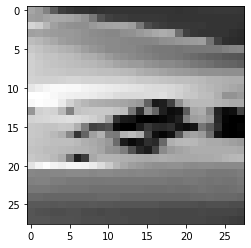

1/1 [==============================] - 0s 27ms/step
[[7.0124311e-26 5.7358720e-37 1.6675438e-26 5.8421034e-17 6.9981968e-16
  5.3562002e-29 3.3333353e-10 4.9055498e-15 1.7189109e-13 5.6219983e-27
  2.5122689e-02 3.2400323e-16 4.0240044e-23 6.7783299e-07 4.3950465e-21
  1.4540982e-13 8.2543558e-01 1.3461827e-03 5.0866225e-12 4.3265554e-16
  1.8852931e-16 5.2727103e-07 8.0096092e-26 1.2600221e-16 1.4809439e-01
  2.1991646e-26]]
q


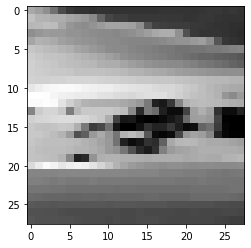

1/1 [==============================] - 0s 27ms/step
[[4.94738970e-27 4.91862767e-38 1.36140319e-27 5.12633770e-17
  3.29946438e-16 1.09675000e-29 2.20575051e-11 7.14463821e-16
  1.58618473e-14 1.33624313e-27 3.41161992e-03 5.66743723e-17
  1.25881611e-23 1.51162531e-08 2.05576395e-21 3.84232000e-14
  9.28752542e-01 4.49112151e-04 9.84190702e-13 1.41102735e-17
  3.49388584e-17 1.46779115e-07 1.86216056e-26 1.09194386e-16
  6.73866048e-02 4.36016480e-27]]
q


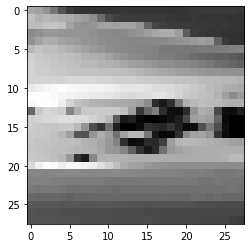

1/1 [==============================] - 0s 36ms/step
[[3.4212339e-27 0.0000000e+00 8.6102666e-28 7.0276140e-17 6.6460773e-17
  7.1220521e-30 1.2432602e-12 6.6036504e-16 4.5691786e-14 7.4200794e-28
  2.5966947e-03 9.8590909e-17 2.1902153e-24 5.8258898e-08 9.3111891e-22
  7.5705955e-14 5.0790173e-01 4.3041960e-05 3.4953321e-12 1.2575952e-17
  8.0357395e-18 3.5274482e-07 7.0275520e-27 3.5185739e-17 4.8945805e-01
  3.5945152e-27]]
q


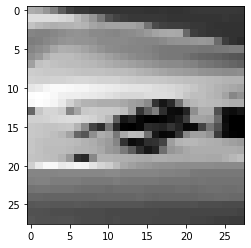

1/1 [==============================] - 0s 28ms/step
[[8.47751148e-29 0.00000000e+00 8.71573728e-30 3.79207841e-18
  7.01756043e-18 2.25325885e-30 6.60568131e-14 2.57511615e-17
  1.97331477e-13 8.32401306e-29 2.02397248e-04 2.70845221e-19
  7.55702616e-26 2.77575796e-10 2.56344680e-22 3.07145395e-13
  1.05195917e-01 4.80431981e-06 3.22564078e-13 2.39560475e-19
  6.89467448e-19 1.07280567e-08 1.32497879e-26 1.25861684e-17
  8.94596875e-01 3.36603082e-28]]
y


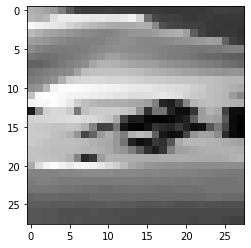

1/1 [==============================] - 0s 26ms/step
[[1.6046867e-27 1.0096518e-37 1.6779797e-28 1.1403546e-16 6.6604404e-17
  2.5398452e-28 2.2083847e-18 3.7052945e-19 1.6171504e-10 2.9758884e-28
  3.1386890e-02 8.1536214e-20 1.2087822e-22 2.8530522e-11 2.2225224e-19
  2.0869084e-10 6.4021832e-01 2.2068122e-08 2.9249360e-11 1.4574444e-18
  5.5376983e-21 8.5804544e-08 5.3524134e-22 2.1260320e-14 3.2839468e-01
  1.1954851e-27]]
q


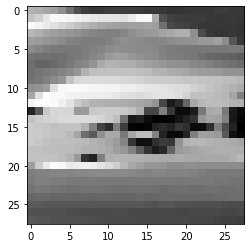

1/1 [==============================] - 0s 39ms/step
[[1.7416930e-26 3.7319145e-38 3.1013257e-28 2.3494011e-15 1.0103179e-16
  9.9725844e-29 8.5892044e-21 2.2597375e-19 9.8710706e-11 5.9630662e-28
  1.8909527e-01 5.0821667e-20 5.3366814e-20 2.5696648e-11 2.8972133e-19
  1.4664470e-09 8.0712932e-01 9.0214058e-08 7.7653640e-11 2.3460742e-19
  3.3726406e-20 4.9602318e-07 9.5514036e-21 9.2158225e-13 3.7747975e-03
  1.9454385e-27]]
q


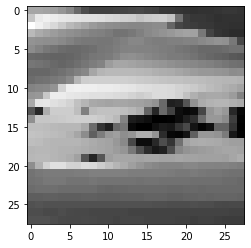

1/1 [==============================] - 0s 27ms/step
[[3.5334932e-26 0.0000000e+00 1.6813278e-27 3.7823541e-15 6.5478701e-16
  3.1857332e-28 2.3090062e-21 1.0580171e-18 4.5308677e-11 2.2150521e-27
  9.7332448e-02 8.1540993e-21 3.8926786e-16 6.5824787e-13 1.5454248e-18
  6.7588040e-08 8.9933759e-01 2.8441713e-07 9.0995622e-12 3.1587743e-19
  1.5263718e-18 1.6000280e-07 5.4031446e-18 2.0611791e-10 3.3295425e-03
  4.8714530e-27]]
q


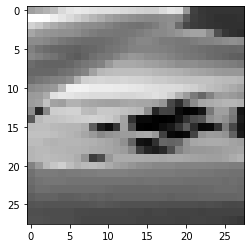

1/1 [==============================] - 0s 25ms/step
[[7.5102722e-24 0.0000000e+00 2.2123987e-24 1.6100872e-12 7.3793163e-15
  1.3333698e-26 2.2630180e-22 1.1697475e-13 4.2896349e-09 1.4417447e-25
  4.4468051e-01 1.9179529e-17 2.5733831e-12 9.7937708e-12 5.1342966e-16
  9.9544491e-07 5.5358566e-02 3.5839970e-04 7.2791148e-11 2.8019467e-15
  3.6277159e-16 4.5580797e-05 9.1880395e-14 9.2561658e-10 4.9955598e-01
  3.3106900e-25]]
y


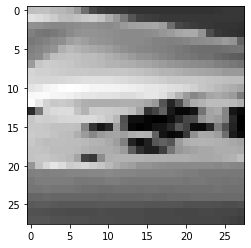

1/1 [==============================] - 0s 38ms/step
[[2.5171310e-26 0.0000000e+00 2.0722402e-28 1.0167663e-15 3.2720672e-19
  8.0688298e-29 2.5522211e-17 3.1546154e-17 5.8276456e-10 1.3372098e-27
  1.9764691e-03 2.8715635e-18 6.2001517e-20 1.9393610e-11 4.1859154e-19
  1.3665481e-10 4.5024371e-03 2.6331401e-07 3.1613514e-12 1.0022388e-19
  3.4479573e-20 8.9253490e-07 5.2182586e-22 3.9132417e-14 9.9351984e-01
  3.8398779e-27]]
y


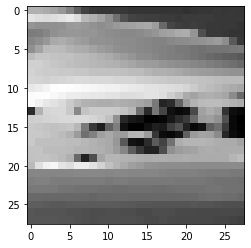

1/1 [==============================] - 0s 28ms/step
[[4.8098059e-28 0.0000000e+00 7.1998723e-31 6.5560297e-17 1.3884974e-19
  6.2343457e-31 1.6200590e-17 7.7250340e-18 1.0146569e-12 3.4541445e-29
  6.7186236e-05 8.3649576e-20 1.8802914e-24 3.3536524e-12 5.5057215e-22
  1.3473535e-13 2.9604610e-02 1.2509528e-07 4.0732248e-13 2.2309893e-21
  1.7994547e-20 9.1305248e-09 7.3497147e-26 8.1686415e-17 9.7032803e-01
  1.1942357e-28]]
y


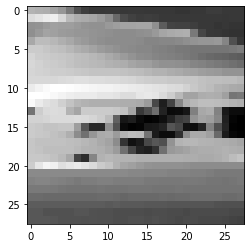

1/1 [==============================] - 0s 26ms/step
[[5.12046031e-27 0.00000000e+00 2.82057556e-30 7.13283335e-17
  8.07122012e-17 3.67865499e-29 1.18881184e-14 1.59581259e-16
  1.07279300e-12 3.37078450e-28 2.19243684e-05 1.17574460e-17
  3.52710518e-24 9.14267342e-11 4.53263310e-21 1.56350518e-13
  6.66900754e-01 6.14032672e-07 1.18585927e-13 3.38629080e-19
  8.38959613e-19 1.54283526e-07 1.04651890e-25 4.59255123e-16
  3.33076477e-01 9.91904670e-28]]
q


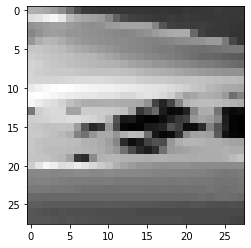

1/1 [==============================] - 0s 25ms/step
[[1.09876595e-27 0.00000000e+00 3.32669114e-30 4.94326674e-17
  3.78262349e-17 1.15252403e-29 2.49979311e-14 1.31109093e-16
  2.54783526e-13 2.53315279e-28 3.27873786e-05 6.35592720e-18
  1.03636365e-23 5.56904522e-11 3.86591301e-21 1.06555722e-13
  7.55235076e-01 2.45201863e-06 9.06948805e-14 2.21050241e-19
  8.84144509e-19 1.03146746e-07 2.93161512e-26 1.97244195e-16
  2.44729683e-01 6.85442704e-28]]
q


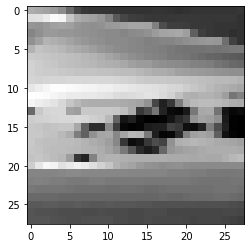

1/1 [==============================] - 0s 26ms/step
[[6.49254432e-28 0.00000000e+00 1.11552345e-30 1.64153149e-17
  8.76813600e-18 6.29403159e-30 2.06257541e-15 5.82486492e-17
  4.62575887e-13 7.12813154e-29 1.79867620e-05 1.14343585e-18
  1.00455840e-25 6.83464951e-11 5.97947327e-22 9.74413421e-14
  1.82513803e-01 2.54736904e-07 1.06254632e-13 5.01309030e-20
  1.01578270e-19 1.82601969e-08 6.30670682e-27 4.12287530e-17
  8.17467928e-01 2.22569107e-28]]
y


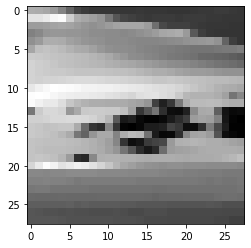

1/1 [==============================] - 0s 27ms/step
[[7.3666994e-28 0.0000000e+00 6.9334193e-30 2.5866891e-17 7.7428685e-17
  9.8715337e-30 2.7474503e-14 1.0586113e-16 4.6314569e-13 2.2359601e-28
  6.2329025e-05 2.6117035e-18 2.5475864e-25 3.2645209e-10 1.1449127e-21
  3.5474404e-13 5.9583783e-01 2.4610335e-06 2.8266693e-13 3.4338956e-19
  3.7902326e-19 1.6153332e-07 1.8113869e-26 5.6109077e-17 4.0409714e-01
  6.4638976e-28]]
q


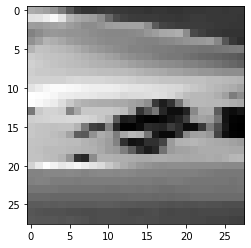

1/1 [==============================] - 0s 26ms/step
[[7.72407734e-28 0.00000000e+00 3.87462920e-29 3.42105258e-17
  1.11561262e-17 4.16965375e-30 1.39003229e-13 1.02473285e-16
  1.06421863e-13 2.72873458e-28 5.59818116e-04 2.82858732e-18
  2.68430394e-24 1.34767919e-09 1.08238037e-21 3.40304472e-13
  1.03283674e-01 9.26567282e-06 1.08259192e-12 4.29362547e-19
  2.18738090e-18 4.59279725e-08 1.21705668e-26 3.55773856e-17
  8.96147311e-01 1.13153825e-27]]
y


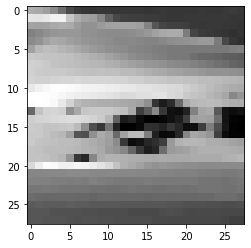

1/1 [==============================] - 0s 27ms/step
[[2.56496082e-27 0.00000000e+00 8.50645400e-29 1.22679736e-17
  7.80549794e-18 5.27253453e-30 3.40878177e-13 4.30528556e-16
  1.99974992e-13 2.47579450e-28 5.08129247e-04 1.65339491e-17
  3.66888829e-25 6.97237601e-09 6.18077290e-22 3.07830340e-13
  2.21404042e-02 4.55799955e-06 2.44746064e-12 2.24953215e-18
  8.45009302e-19 4.33166107e-08 1.53570403e-26 8.72195781e-18
  9.77346838e-01 1.09719536e-27]]
y


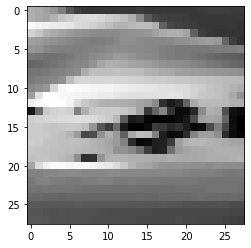

1/1 [==============================] - 0s 25ms/step
[[6.56373440e-28 0.00000000e+00 3.04554464e-29 3.55605012e-17
  6.40159729e-19 4.52462333e-30 9.35357290e-20 8.20323802e-20
  4.83827388e-12 2.37275953e-29 5.50589710e-03 1.39987426e-20
  3.14266187e-23 1.07021865e-11 2.63971573e-20 1.65091673e-11
  3.74174304e-02 1.29687067e-10 6.56615387e-12 2.39727120e-20
  2.50284613e-22 2.45343551e-10 5.43816121e-22 2.25712533e-15
  9.57076728e-01 1.24133203e-28]]
y


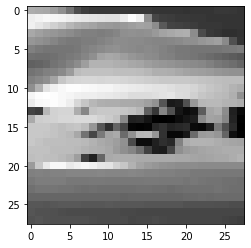

1/1 [==============================] - 0s 34ms/step
[[2.6907176e-26 0.0000000e+00 1.1483877e-28 4.5112694e-16 3.9371267e-16
  1.9889713e-29 1.2570833e-20 2.2349415e-19 2.1430455e-09 8.7888571e-28
  8.2081303e-02 4.0472012e-20 1.5249461e-20 1.4435734e-11 2.3529809e-19
  6.3217470e-10 9.0026540e-01 6.6478989e-08 1.2542729e-10 2.6449627e-19
  2.8064636e-20 1.7541493e-07 1.2587004e-20 1.5991813e-13 1.7653106e-02
  2.7666881e-27]]
q


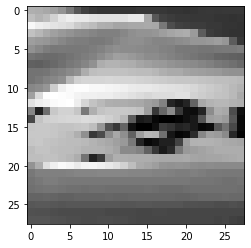

1/1 [==============================] - 0s 25ms/step
[[1.7186615e-26 0.0000000e+00 5.3074966e-27 4.2393642e-16 2.4244175e-15
  1.0745129e-29 1.8541696e-23 1.2523251e-19 3.7835118e-10 4.9324862e-28
  6.6820711e-02 6.3246793e-19 1.3130664e-19 7.4174163e-13 1.6837233e-18
  4.4258119e-10 5.4752523e-01 1.0525372e-09 2.0491209e-11 6.4315315e-20
  5.9727231e-22 3.8333510e-09 7.2537427e-19 2.8358492e-14 3.8565409e-01
  1.5444280e-27]]
q


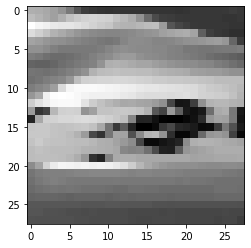

1/1 [==============================] - 0s 27ms/step
[[2.50441859e-26 0.00000000e+00 2.44024183e-27 2.63146733e-17
  2.50686892e-16 6.07979935e-30 2.51198852e-25 6.97947407e-20
  2.46692361e-10 3.31731743e-29 1.13767723e-03 1.00538995e-18
  6.63887617e-22 2.84675522e-13 1.19078633e-19 6.75401679e-11
  1.16888806e-01 1.07615217e-13 2.14092871e-12 4.16118215e-21
  2.12867268e-23 5.33999303e-11 6.29082385e-19 1.27805439e-14
  8.81973505e-01 1.06046891e-28]]
y


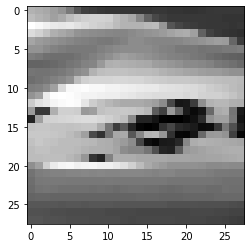

1/1 [==============================] - 0s 25ms/step
[[9.99319442e-27 0.00000000e+00 1.39929663e-27 5.56349727e-18
  7.27263349e-17 8.10996404e-31 1.04535447e-25 2.26164169e-20
  1.20847152e-10 9.09386278e-30 7.38127856e-04 2.61495883e-19
  4.35159808e-22 9.45745964e-14 4.71098746e-20 1.62971529e-11
  8.42424631e-02 6.69652305e-15 5.35856841e-13 1.26264950e-21
  4.50379505e-24 1.09913814e-11 1.05033824e-19 2.22959273e-15
  9.15019393e-01 2.68960871e-29]]
y


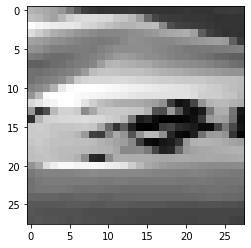

1/1 [==============================] - 0s 27ms/step
[[1.3917941e-26 0.0000000e+00 3.9918488e-27 3.0292290e-17 4.9855629e-16
  4.2114517e-30 9.7635589e-25 9.0058611e-20 2.2594976e-10 4.5077462e-29
  2.5355848e-03 9.5796397e-19 1.7317763e-21 2.6349439e-13 1.9594144e-19
  5.7678348e-11 1.7433269e-01 2.4649971e-13 1.7096572e-12 1.0849347e-20
  2.2735544e-23 1.3619648e-10 1.5783432e-18 5.6823455e-15 8.2313174e-01
  1.4164524e-28]]
y


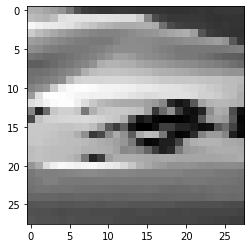

1/1 [==============================] - 0s 24ms/step
[[2.2430972e-26 0.0000000e+00 1.1924001e-26 2.5069354e-16 1.5127466e-15
  1.6064951e-29 3.2846000e-23 9.6438687e-20 3.4711975e-10 4.1048043e-28
  3.9984886e-02 1.3762507e-18 1.4362197e-19 4.6296674e-13 2.6311546e-18
  3.5418085e-10 1.6490974e-01 1.7874023e-10 1.4727716e-11 8.4869526e-20
  2.8177223e-22 2.2292632e-09 4.5339999e-18 3.8576120e-14 7.9510534e-01
  1.2977835e-27]]
y


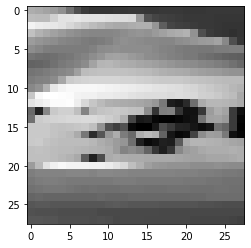

1/1 [==============================] - 0s 25ms/step
[[3.9727601e-27 0.0000000e+00 7.7087440e-29 8.9442643e-17 7.9750031e-17
  3.3104204e-30 1.5456378e-22 2.9399191e-20 2.1984589e-10 1.0809458e-28
  2.3756240e-02 6.4217411e-20 6.0038257e-22 9.5370424e-13 1.1619491e-19
  3.5114245e-11 1.5569690e-01 1.6097404e-10 2.3944510e-11 7.2030702e-21
  4.7140008e-23 2.8462116e-10 8.3616425e-20 8.1046806e-15 8.2054675e-01
  3.1426025e-28]]
y


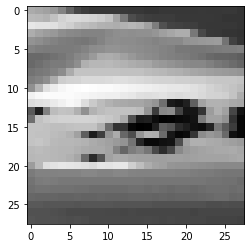

1/1 [==============================] - 0s 27ms/step
[[5.9934361e-26 0.0000000e+00 9.3649270e-29 2.0892758e-17 3.6673226e-18
  6.0915503e-29 3.3353621e-21 2.6217947e-20 2.0636922e-08 1.9935669e-28
  2.9830972e-04 6.7901854e-18 2.1840057e-22 5.4410153e-12 1.5117292e-18
  2.5540806e-12 1.0759524e-03 5.3811552e-12 2.4908048e-10 1.0964265e-19
  8.8495306e-23 1.2850014e-10 1.8734865e-17 4.8591757e-13 9.9862576e-01
  7.4803153e-28]]
y


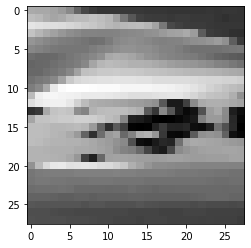

1/1 [==============================] - 0s 24ms/step
[[5.10760319e-26 0.00000000e+00 1.42011603e-27 1.04016261e-16
  1.05682946e-15 1.10906624e-29 4.38845358e-20 8.14608824e-20
  8.56674376e-09 2.17459023e-27 4.84908700e-01 5.15426321e-19
  6.46960705e-19 4.80402731e-11 1.03573487e-18 4.20217888e-10
  4.68574494e-01 3.23818217e-09 5.94091609e-10 2.84164954e-18
  6.63582188e-20 1.83887312e-06 5.58626459e-18 5.18687038e-10
  4.65149544e-02 6.74881213e-27]]
k


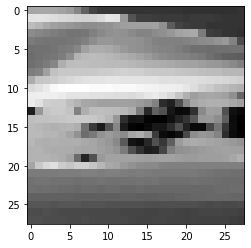

1/1 [==============================] - 0s 34ms/step
[[5.1586282e-25 1.1351887e-36 8.1394953e-27 5.6446614e-15 9.3922478e-15
  1.6967872e-24 8.2444136e-16 1.1249996e-17 7.5312179e-05 2.1459455e-25
  6.2015313e-03 1.7969772e-16 4.0999375e-19 2.9648138e-11 3.8957520e-16
  2.2379069e-08 4.0635625e-01 1.1050771e-05 1.0790544e-08 8.0046106e-16
  1.7606541e-17 5.0403047e-01 8.6413527e-17 3.0387633e-07 8.3325118e-02
  5.8625524e-25]]
v


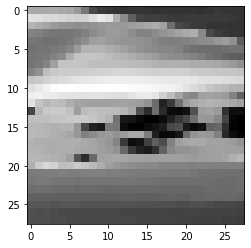

1/1 [==============================] - 0s 27ms/step
[[1.29365497e-25 0.00000000e+00 1.30608470e-27 1.52133131e-15
  4.68218934e-15 1.45398645e-23 2.21992555e-15 8.44947211e-18
  1.32199675e-05 4.74940580e-26 2.88134470e-05 2.20284206e-16
  4.98209881e-20 1.77155003e-12 3.99163085e-17 4.18946922e-09
  8.20580032e-03 4.08390946e-07 5.77815240e-10 9.67673944e-16
  1.09824183e-17 9.85724926e-01 4.58546117e-17 4.50417957e-07
  6.02640258e-03 1.12289259e-25]]
v


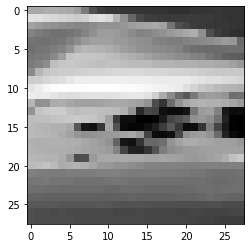

1/1 [==============================] - 0s 24ms/step
[[1.5728924e-25 0.0000000e+00 1.3592471e-26 5.5240716e-17 2.3738289e-15
  1.4498148e-22 1.6255183e-15 2.8334132e-17 3.3703523e-06 1.6055607e-26
  2.3553760e-07 8.8972273e-15 3.0312023e-19 2.5593109e-14 1.6617112e-17
  8.1641860e-10 2.3104538e-05 2.0210333e-09 1.6284852e-11 4.6718039e-13
  6.8402845e-18 9.9938047e-01 2.3235826e-17 1.9858531e-08 5.9282547e-04
  2.9180723e-26]]
v


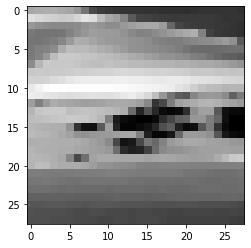

1/1 [==============================] - 0s 27ms/step
[[5.1264370e-24 0.0000000e+00 1.4042453e-25 7.6555261e-15 5.7588669e-15
  1.1218732e-20 3.8661470e-13 1.9474991e-16 5.1764482e-07 1.6269036e-25
  1.2013780e-06 8.0053065e-13 2.8568401e-18 6.0328424e-13 5.2780406e-17
  1.0206765e-09 4.4091787e-05 2.2319508e-08 8.6878976e-11 1.4167861e-12
  8.9049136e-17 9.9399155e-01 1.6933070e-17 1.3129554e-07 5.9624733e-03
  2.7015237e-25]]
v


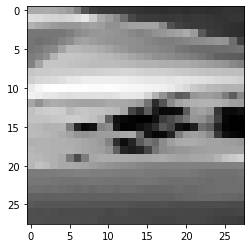

1/1 [==============================] - 0s 26ms/step
[[1.35211706e-22 3.52353724e-38 8.99196020e-25 1.30184720e-14
  8.40288786e-15 5.78642501e-20 5.39514451e-13 1.15036603e-16
  8.25463133e-07 2.54558487e-25 3.77437942e-07 2.15383805e-11
  9.84503541e-19 4.21253787e-12 7.85952210e-17 1.28477062e-09
  6.60177757e-05 6.78296130e-09 1.20212104e-10 5.87877099e-12
  2.28327574e-17 9.89769340e-01 3.77237580e-18 4.38649835e-07
  1.01629235e-02 4.15248097e-25]]
v


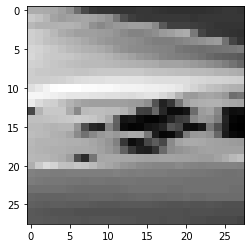

1/1 [==============================] - 0s 24ms/step
[[6.9838388e-25 0.0000000e+00 1.6380044e-27 4.7806455e-15 1.5409169e-14
  6.2089941e-26 1.0855001e-12 1.2176875e-14 7.8332590e-11 7.1609983e-26
  5.1276595e-04 9.1699448e-15 3.2457020e-20 6.1765406e-09 4.4551240e-19
  5.5217761e-13 8.8058364e-01 1.8363299e-04 1.9647750e-10 5.8464723e-16
  8.4823282e-16 7.0616729e-03 1.6408611e-21 8.2319353e-11 1.1165830e-01
  2.2475318e-25]]
q


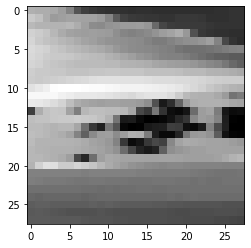

1/1 [==============================] - 0s 24ms/step
[[5.7763385e-26 0.0000000e+00 1.0496758e-27 3.9880247e-15 7.5853681e-15
  6.5225400e-27 2.0585551e-12 2.7138857e-15 5.5403598e-12 3.0710685e-26
  1.0081077e-03 1.2340285e-15 2.3592342e-21 7.0590431e-09 1.1799846e-19
  3.3046152e-13 7.4585676e-01 4.4766595e-04 3.5697814e-10 1.3712853e-16
  4.7482121e-16 5.3925544e-04 1.4502081e-22 2.3570510e-11 2.5214821e-01
  1.0572240e-25]]
q


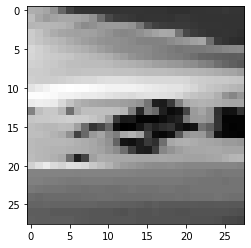

1/1 [==============================] - 0s 24ms/step
[[6.7972910e-25 2.0289896e-36 5.1125770e-25 8.1791100e-16 2.6210633e-14
  8.1670924e-27 7.3323059e-09 3.3663275e-14 8.6459626e-13 1.5636201e-25
  2.4567369e-01 1.7880918e-14 1.3148410e-20 1.2405767e-06 1.6922493e-19
  8.6609989e-13 5.6158632e-01 3.7221722e-02 1.6668408e-10 1.7858765e-14
  2.3186727e-14 6.2872638e-04 8.1508939e-23 3.1670532e-12 1.5488832e-01
  5.9491146e-25]]
q


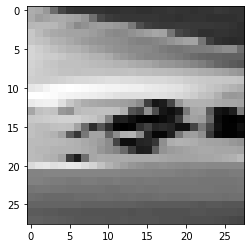

1/1 [==============================] - 0s 26ms/step
[[2.8566655e-22 8.7029831e-35 1.0861639e-22 1.4983039e-15 7.0593061e-14
  1.3218343e-24 1.4490617e-07 2.2137912e-12 1.9451106e-10 1.4532467e-24
  1.9526282e-01 1.2895658e-11 4.1637093e-21 2.5856006e-03 1.7067524e-19
  9.7272503e-12 2.1595077e-01 3.9446555e-02 3.9412127e-09 6.1792195e-12
  3.7860411e-14 1.5460257e-02 1.4270868e-23 2.9883394e-11 5.3129387e-01
  7.3184070e-24]]
y


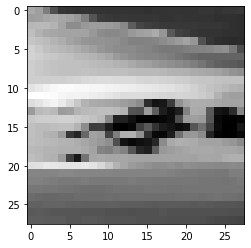

1/1 [==============================] - 0s 25ms/step
[[1.3771866e-22 8.0896805e-36 3.3587577e-23 6.6889378e-17 8.6342351e-16
  4.5355528e-25 1.9730271e-09 1.3201036e-12 5.3845071e-11 1.6096188e-25
  1.8108223e-04 4.6235332e-11 2.9145567e-23 1.4033637e-03 1.7031578e-20
  1.7427362e-12 5.0960062e-03 3.1142107e-03 3.0199584e-10 1.7415632e-12
  6.7189682e-15 1.5459422e-03 9.5227983e-24 3.4093926e-12 9.8865938e-01
  1.0460220e-24]]
y


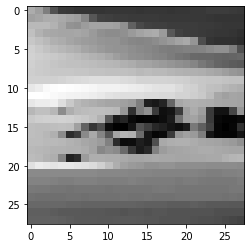

1/1 [==============================] - 0s 25ms/step
[[3.1369581e-21 1.2140149e-34 3.2383759e-21 3.2844554e-15 4.0682376e-14
  8.3510965e-25 1.3969917e-08 1.1189017e-12 8.0752044e-11 1.0756451e-24
  3.7688114e-02 2.8256837e-09 1.5730226e-22 2.4876472e-02 9.5242235e-20
  1.8563165e-12 6.0786646e-02 2.7462728e-02 5.6428789e-10 2.9663971e-12
  3.9907906e-14 3.0319503e-01 4.2755224e-24 2.8446561e-11 5.4599106e-01
  6.8724426e-24]]
y


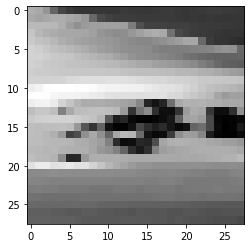

1/1 [==============================] - 0s 27ms/step
[[7.6565774e-22 4.1264205e-34 1.5001375e-21 1.2055389e-14 2.4377944e-13
  4.4698703e-25 4.3940375e-08 3.6240886e-13 4.0327547e-11 1.3291833e-24
  2.8285018e-01 4.2667905e-10 5.5459643e-22 2.3836161e-03 1.6805249e-19
  1.1637121e-12 3.8717631e-01 4.3441880e-02 3.4033656e-10 1.9880091e-12
  2.9502256e-14 1.5312353e-01 1.2206953e-24 1.8441299e-11 1.3102448e-01
  5.9048810e-24]]
q


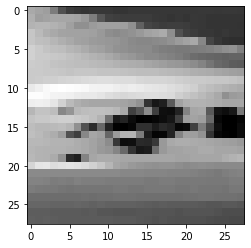

1/1 [==============================] - 0s 36ms/step
[[1.5409463e-22 1.7537336e-34 7.4231868e-23 6.0983268e-15 1.2525753e-14
  9.4572627e-26 5.2392316e-08 2.4346020e-13 2.3748800e-11 6.6759341e-25
  4.5121202e-01 5.2680374e-11 4.2048313e-22 1.7716065e-03 5.8673737e-20
  5.8552870e-13 3.9879668e-01 6.7569099e-02 1.8454857e-10 2.1622766e-13
  1.7171955e-14 4.5901366e-02 1.6838447e-24 2.5728963e-12 3.4749165e-02
  3.0296635e-24]]
k


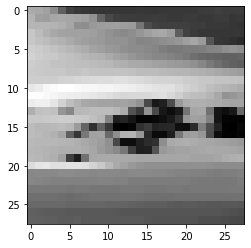

1/1 [==============================] - 0s 27ms/step
[[1.4164690e-22 1.1366306e-34 4.3703418e-23 6.2703490e-15 9.3411717e-15
  5.7013196e-26 6.2804382e-08 8.1219992e-13 5.2066577e-11 1.3616944e-24
  3.6484513e-01 2.3368769e-11 1.5294846e-21 2.8387541e-03 7.3067106e-20
  2.3972538e-12 1.9309925e-01 2.7953008e-01 5.1672655e-10 3.2949750e-13
  9.5341927e-14 1.3371029e-01 1.6303387e-23 4.2665303e-12 2.5976451e-02
  5.8837849e-24]]
k


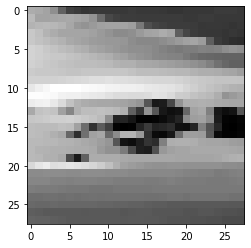

1/1 [==============================] - 0s 25ms/step
[[3.0536493e-23 9.3763261e-35 2.1605007e-24 5.2628262e-15 2.3109514e-14
  2.6115422e-26 3.5148087e-08 1.9892264e-13 1.5506790e-11 6.5871951e-25
  2.1060178e-01 6.2969135e-12 1.7364103e-22 3.3656330e-04 5.5999707e-20
  1.1822301e-12 5.3434986e-01 1.9757773e-01 2.9684408e-10 6.6312515e-14
  3.7181423e-14 1.2972144e-02 7.1410403e-24 1.2816502e-12 4.4161882e-02
  2.3664100e-24]]
q


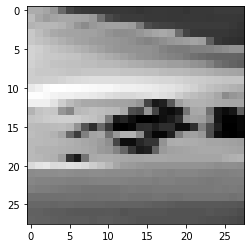

1/1 [==============================] - 0s 25ms/step
[[4.8097572e-23 2.2671250e-34 1.4843372e-23 1.1175474e-14 9.2989073e-15
  7.2768080e-26 5.4908245e-08 1.5753611e-13 1.1005421e-11 8.9913212e-25
  3.7295014e-01 2.3645792e-11 1.1418652e-21 3.8190524e-04 6.5230326e-20
  6.3147577e-13 2.2772126e-01 3.3734778e-01 1.0696223e-10 4.1980295e-14
  7.2925796e-14 4.6705030e-02 9.2282795e-24 5.5583303e-12 1.4893896e-02
  3.4954786e-24]]
k


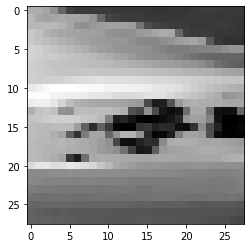

1/1 [==============================] - 0s 27ms/step
[[2.28989231e-22 1.78533313e-34 2.36598949e-23 1.37627963e-14
  1.29382284e-14 7.75782824e-26 5.38000009e-08 6.02146696e-13
  2.84709964e-11 1.39869288e-24 2.71088123e-01 4.37178002e-11
  5.13061501e-22 3.90190026e-03 4.18163226e-20 2.53727031e-12
  2.75635630e-01 2.93996334e-01 4.42207465e-10 2.28411826e-13
  1.13060196e-13 1.17726959e-01 5.91564505e-24 3.14194417e-12
  3.76510546e-02 5.95649542e-24]]
r


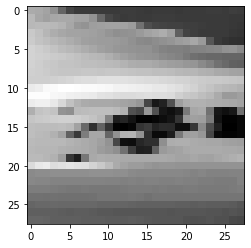

1/1 [==============================] - 0s 27ms/step
[[9.0511420e-23 1.0380212e-34 3.6244934e-23 2.1713146e-14 9.4128849e-15
  6.5067361e-26 2.2521737e-08 3.9815975e-13 1.9912709e-11 9.8237125e-25
  6.3923031e-02 1.7832291e-10 2.7837076e-22 2.4143190e-03 5.0149673e-20
  1.0428411e-12 8.8357158e-02 7.3801416e-01 4.2233611e-10 3.5408064e-13
  5.8078583e-14 9.8638371e-02 1.6401495e-24 5.4629391e-12 8.6529236e-03
  4.3260667e-24]]
r


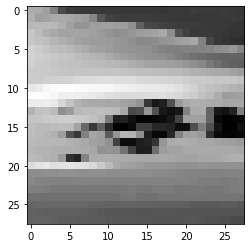

1/1 [==============================] - 0s 30ms/step
[[8.9892821e-23 3.0226950e-35 8.6708341e-23 2.9562655e-15 1.2074912e-15
  1.1336607e-26 1.7117840e-08 4.8122828e-13 6.3189120e-12 5.8495648e-25
  4.3502711e-02 1.9283784e-10 3.0148840e-22 1.0443475e-03 2.3729295e-20
  7.5597298e-13 3.8318440e-02 7.9590786e-01 1.0103917e-10 1.6961210e-13
  1.3099961e-13 6.2888488e-02 1.0910140e-24 1.0204949e-12 5.8338106e-02
  2.6825856e-24]]
r


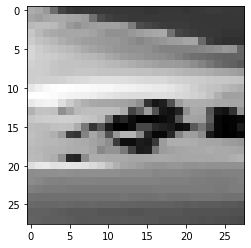

1/1 [==============================] - 0s 24ms/step
[[7.5508674e-23 1.8976673e-35 1.5217198e-22 3.9376254e-15 7.0815665e-16
  3.0052886e-26 2.5611067e-09 4.6900559e-13 4.3203800e-12 3.7578052e-25
  7.1747163e-03 1.6672654e-09 7.6541684e-23 7.7433599e-04 1.7480598e-20
  4.5500170e-13 8.5046971e-03 8.6909926e-01 1.1558059e-10 1.7187830e-13
  7.7787156e-14 5.5760518e-02 8.7011703e-25 2.6245692e-12 5.8686499e-02
  1.9241167e-24]]
r


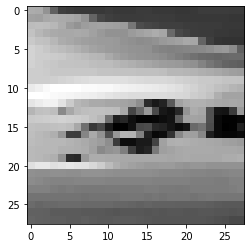

1/1 [==============================] - 0s 30ms/step
[[3.0968395e-22 2.1045131e-35 3.6437112e-22 2.6831488e-15 2.9115309e-15
  2.7993037e-26 1.0344373e-09 1.1931814e-12 1.0373131e-11 5.0100808e-25
  7.7224076e-03 1.2339857e-09 7.9692250e-23 1.4449488e-03 1.0363157e-20
  5.3577357e-13 2.0131862e-02 2.6965791e-01 1.1078135e-10 7.5131817e-13
  3.0498707e-13 6.8037337e-01 1.0381971e-24 2.6421998e-12 2.0669505e-02
  2.4746423e-24]]
v


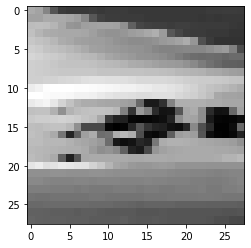

1/1 [==============================] - 0s 26ms/step
[[3.4431534e-21 5.6586002e-35 5.7247736e-21 3.1203612e-15 5.2181143e-14
  5.6477775e-26 5.3599236e-10 9.8016387e-13 1.8335930e-11 4.1256888e-25
  3.1195881e-03 6.6987647e-09 1.9888704e-22 4.7551509e-04 8.7768516e-21
  6.0161931e-14 8.3767632e-03 5.4521874e-02 4.8748117e-11 4.5345124e-13
  4.5823664e-13 9.2405683e-01 1.1472161e-23 8.9776129e-12 9.4494326e-03
  2.2769200e-24]]
v


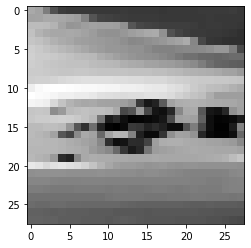

1/1 [==============================] - 0s 25ms/step
[[1.4391506e-21 2.4035044e-36 5.9385041e-21 1.4413301e-16 1.9059217e-13
  6.4077238e-27 7.5028317e-11 2.9779122e-13 6.9175433e-13 3.9662524e-26
  5.5814306e-03 6.4810735e-10 2.2885968e-22 3.8608938e-05 5.5606682e-22
  1.2620087e-15 1.9093517e-03 5.6657981e-04 1.9591191e-12 3.3003795e-14
  1.7524349e-13 9.9189293e-01 2.8941583e-24 5.2156928e-13 1.0968709e-05
  1.8266801e-25]]
v


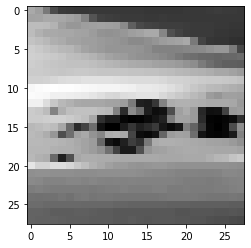

1/1 [==============================] - 0s 60ms/step
[[3.7913852e-21 1.9058476e-35 1.7269278e-19 1.9856928e-15 2.8337168e-11
  2.8327388e-26 1.3015769e-10 3.8820292e-13 1.0163165e-12 1.2857608e-25
  8.7507397e-02 1.2480461e-09 1.3217897e-20 1.0917263e-06 1.5022128e-20
  5.3487844e-16 4.5671454e-03 2.2561792e-03 2.6815206e-13 7.4237654e-14
  4.2342080e-12 9.0566528e-01 2.2633338e-22 5.3485580e-13 2.8716313e-06
  4.2294260e-25]]
v


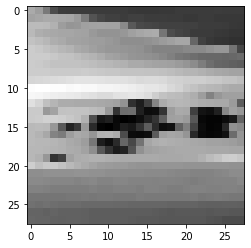

1/1 [==============================] - 0s 26ms/step
[[5.3525071e-20 2.9539049e-36 2.2952209e-18 9.7378797e-14 2.1195822e-07
  6.5860148e-25 1.2413192e-14 2.7927888e-13 3.3342096e-12 1.1327807e-25
  4.4171497e-02 1.5462573e-08 7.8768532e-21 3.5064668e-06 3.4076901e-20
  2.7078921e-16 1.9834631e-03 4.8637967e-06 1.2132192e-13 7.9252206e-15
  4.3511219e-14 9.5383632e-01 1.6606721e-22 2.9312644e-13 1.2891864e-07
  3.0484677e-25]]
v


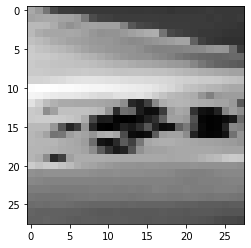

1/1 [==============================] - 0s 26ms/step
[[5.08523240e-20 8.67319967e-36 2.81813280e-18 1.44930454e-13
  3.67853517e-07 1.33364253e-24 1.55519315e-14 2.03207297e-13
  2.42825942e-12 1.14819420e-25 7.00431764e-02 1.46759245e-08
  1.23180748e-20 5.86434362e-06 4.61421702e-20 2.14361381e-16
  1.83960912e-03 3.15544958e-06 9.99871776e-14 1.53657062e-14
  7.16270982e-14 9.28107738e-01 3.95515521e-22 2.73976263e-13
  3.97652187e-08 3.12726502e-25]]
v


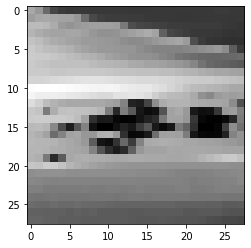

1/1 [==============================] - 0s 45ms/step
[[3.4826232e-19 1.0174441e-35 6.7186736e-18 1.8855932e-13 1.3725365e-07
  1.7025758e-24 2.7089869e-15 1.3241753e-13 7.1963065e-12 1.7362545e-25
  2.1160306e-01 2.6915572e-08 4.1051277e-20 7.4461145e-06 7.9295808e-20
  1.9769975e-16 3.0739624e-03 7.2818608e-07 9.8435495e-14 9.3273989e-15
  1.3793322e-13 7.8531349e-01 2.0828539e-21 6.9444304e-13 1.0863785e-06
  5.5495319e-25]]
v


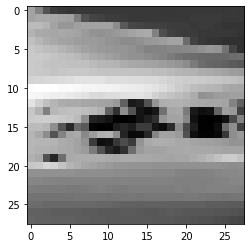

1/1 [==============================] - 0s 25ms/step
[[1.8465618e-19 2.6685680e-36 6.2092768e-19 1.4011758e-14 2.8269868e-08
  5.9650102e-25 1.0221112e-15 2.2726643e-13 2.8228982e-11 1.2397003e-25
  1.6090363e-01 6.0472529e-09 1.8663839e-19 1.2518584e-05 5.8702843e-20
  8.8304244e-17 4.7932356e-04 8.0547380e-07 6.9556970e-14 1.4647378e-15
  4.4319076e-13 8.3860344e-01 1.3313477e-20 8.0414207e-13 3.0764673e-07
  3.1873153e-25]]
v


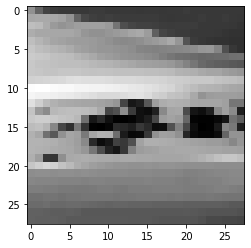

1/1 [==============================] - 0s 25ms/step
[[2.7374607e-19 4.3282482e-37 1.4136466e-19 1.2749209e-15 3.3319253e-08
  2.4795811e-25 1.4804630e-16 2.9807756e-13 2.8172395e-11 8.9516145e-26
  8.8996580e-03 5.4059677e-09 2.3937763e-18 1.0489368e-06 7.8124986e-20
  3.5636853e-17 1.7630905e-04 2.6933481e-07 9.4369711e-15 4.4695917e-16
  4.4557348e-12 9.9092263e-01 2.1353794e-19 2.0209379e-12 3.7786062e-08
  1.5889581e-25]]
v


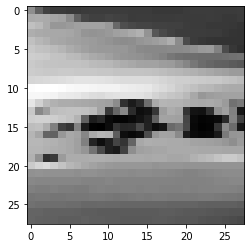

1/1 [==============================] - 0s 26ms/step
[[1.39767584e-19 7.54745126e-38 1.31085780e-19 9.31547777e-17
  3.70351536e-08 9.03661799e-26 4.26127784e-17 7.41359895e-14
  1.15261915e-11 5.09339014e-26 1.86278988e-02 1.24007704e-09
  1.62924399e-18 1.53245949e-07 5.28518328e-20 1.70234167e-17
  9.58455130e-05 3.78129634e-08 2.33594344e-15 6.08233514e-17
  1.04588291e-11 9.81276035e-01 8.11314203e-19 3.25208420e-13
  5.99650773e-09 7.47397945e-26]]
v


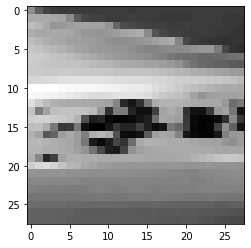

1/1 [==============================] - 0s 25ms/step
[[2.46196454e-19 6.58558206e-38 6.46482284e-19 9.01777348e-17
  1.16099095e-07 1.95103359e-25 8.23650073e-17 2.19159529e-13
  3.19573916e-11 1.15827091e-25 6.19754680e-02 2.36146813e-09
  7.11014180e-18 1.82057008e-07 2.56746135e-19 3.49000305e-17
  2.09114834e-04 3.33120873e-08 2.48777155e-15 1.09157540e-16
  2.66300940e-11 9.37815011e-01 3.52893116e-18 2.88974058e-13
  2.84578192e-08 1.54043605e-25]]
v


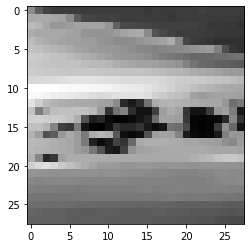

1/1 [==============================] - 0s 29ms/step
[[3.8661380e-19 9.3042384e-38 1.5405034e-19 1.1103805e-16 5.6244136e-08
  9.0275997e-26 5.6413413e-17 2.8366616e-13 3.7194484e-11 8.6901731e-26
  4.0964484e-02 1.1206206e-09 6.5141056e-18 1.9615300e-07 8.8533542e-20
  3.0053887e-17 3.7964687e-04 9.2330275e-08 5.6910831e-15 7.3171398e-17
  2.1067681e-11 9.5865542e-01 9.7501433e-19 3.2720473e-13 1.0852301e-08
  1.2769674e-25]]
v


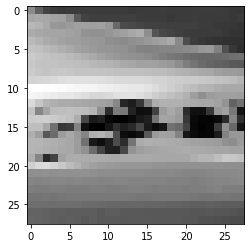

1/1 [==============================] - 0s 34ms/step
[[2.9087328e-19 2.7345715e-38 2.1013407e-19 7.4281421e-17 2.0650180e-07
  1.4568739e-25 3.5180670e-17 3.1536115e-13 2.3422621e-11 1.0970997e-25
  7.5038850e-02 6.0338534e-10 7.0725837e-18 1.3386715e-07 1.9194771e-19
  3.7088519e-17 4.3218557e-04 4.0355797e-08 2.9952618e-15 5.9120054e-17
  2.4241477e-11 9.2452866e-01 1.1767917e-18 1.4996840e-13 2.5085123e-08
  1.1864742e-25]]
v


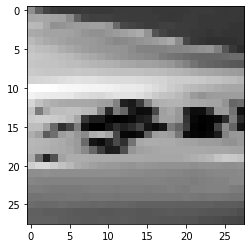

1/1 [==============================] - 0s 27ms/step
[[1.2779862e-19 2.4291030e-38 4.0397674e-19 1.1217703e-16 7.0901478e-08
  3.4896680e-25 2.0975813e-17 1.0186012e-13 2.7851190e-11 8.5244729e-26
  1.1568141e-01 2.2298983e-09 3.6388262e-18 8.4471836e-08 4.0451955e-19
  7.7808322e-18 7.7313991e-05 1.3130622e-08 2.2534801e-15 2.5809160e-17
  1.0817266e-11 8.8424110e-01 2.0899291e-18 1.9086065e-13 1.5888386e-08
  9.1352083e-26]]
v


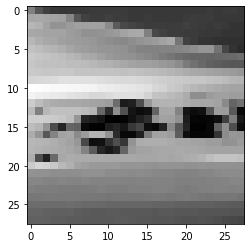

1/1 [==============================] - 0s 25ms/step
[[8.99882938e-20 0.00000000e+00 7.60911813e-19 4.02310554e-16
  2.18604015e-08 3.99892723e-25 2.56543780e-17 2.03115167e-13
  8.43435946e-11 1.05354827e-25 3.75129074e-01 1.94357308e-09
  6.83225750e-18 7.67086590e-08 2.64055883e-18 1.15647468e-17
  1.52946704e-05 2.37387821e-09 2.65302218e-15 2.12199256e-17
  1.34014171e-11 6.24855459e-01 8.25990796e-18 9.51905519e-14
  1.00120175e-07 1.16810394e-25]]
v


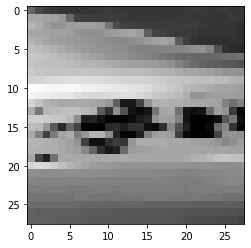

1/1 [==============================] - 0s 37ms/step
[[3.6774088e-20 0.0000000e+00 8.3033068e-20 3.6686307e-16 4.1984261e-09
  6.8709132e-26 2.1657031e-17 1.1400882e-13 7.4142227e-11 4.9262173e-26
  9.5596552e-01 4.2350429e-10 5.1159930e-18 8.9740979e-08 3.1350718e-18
  7.8841248e-18 3.4675180e-05 4.3648565e-09 1.1313897e-15 2.6921464e-18
  5.8510839e-12 4.3999542e-02 2.4382085e-18 4.7320326e-15 1.9078942e-07
  5.6274403e-26]]
k


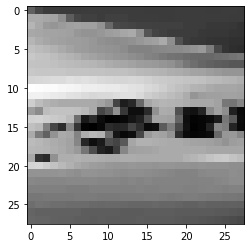

1/1 [==============================] - 0s 27ms/step
[[2.0877551e-19 0.0000000e+00 7.0514485e-20 2.3270825e-16 3.8467474e-09
  1.6947142e-25 1.1771675e-18 3.9439464e-13 2.6670749e-10 3.0394986e-26
  8.7911320e-01 1.2432182e-10 2.3612121e-18 6.1803098e-07 1.7873880e-18
  3.6953165e-18 2.2527540e-06 3.4043952e-11 2.7053813e-15 6.0388620e-19
  1.5161372e-12 1.2088388e-01 1.2377948e-18 9.9528838e-16 2.9715512e-08
  3.1344756e-26]]
k


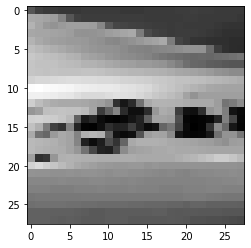

1/1 [==============================] - 0s 24ms/step
[[1.1890070e-19 0.0000000e+00 1.0968274e-20 1.6798572e-16 1.5690511e-09
  5.8801365e-26 1.0522733e-19 3.4450933e-13 1.0374376e-09 2.1150228e-26
  9.7685927e-01 6.0487752e-12 5.6316024e-18 6.1346367e-07 1.2784544e-18
  8.4847290e-18 5.2941273e-06 7.1112036e-12 1.9269735e-15 4.2869597e-19
  1.3548796e-12 2.3134600e-02 8.4650691e-19 5.4562183e-16 1.2947001e-07
  2.2738976e-26]]
k


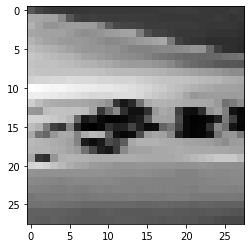

1/1 [==============================] - 0s 28ms/step
[[6.13363730e-20 0.00000000e+00 1.05007453e-20 2.70652967e-16
  1.59190572e-09 1.78710398e-26 8.87875248e-20 4.83719130e-13
  1.00786990e-10 1.17979865e-26 9.67671633e-01 1.02369814e-11
  1.39526406e-18 4.68547114e-07 5.09553028e-19 2.00059938e-18
  3.89496972e-06 2.91469834e-11 1.34737976e-15 7.74823505e-20
  7.97881672e-13 3.23240198e-02 4.82777308e-20 1.12544235e-16
  2.88861361e-08 1.13727049e-26]]
k


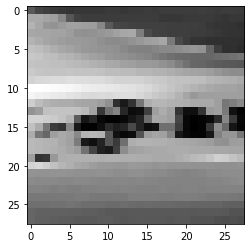

1/1 [==============================] - 0s 26ms/step
[[5.98571673e-20 0.00000000e+00 1.28960234e-21 8.93528968e-17
  5.75635983e-10 1.26814876e-26 2.75762791e-20 1.73256198e-13
  3.71079834e-10 7.92081060e-27 9.88462269e-01 1.17546771e-12
  1.11588071e-18 2.53280831e-07 3.59036168e-19 4.23901195e-18
  2.79775577e-06 3.07930938e-12 1.12502916e-15 1.20905578e-19
  5.23618150e-13 1.15346378e-02 6.79731532e-20 1.22723110e-16
  5.72543293e-08 8.39987720e-27]]
k


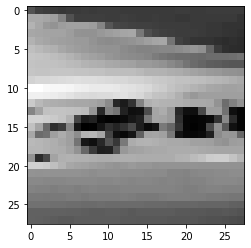

1/1 [==============================] - 0s 31ms/step
[[1.1883495e-20 0.0000000e+00 6.4845220e-22 3.3497404e-17 7.8974091e-11
  6.3194488e-27 5.3932984e-21 8.7293921e-14 1.2026662e-10 1.8033355e-27
  9.8780549e-01 4.7552061e-13 5.6182320e-20 9.4871950e-08 1.3134833e-19
  3.3430481e-19 4.5414890e-07 1.0160012e-13 3.2597867e-16 1.4754030e-20
  6.9324788e-14 1.2193919e-02 4.9243488e-21 1.0207250e-17 2.3658551e-08
  1.9718393e-27]]
k


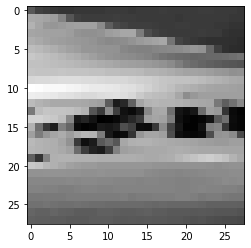

1/1 [==============================] - 0s 26ms/step
[[1.5554516e-20 0.0000000e+00 2.8434912e-22 5.5034009e-18 7.5274259e-10
  1.4672067e-25 2.8867418e-20 1.9393601e-13 6.0456196e-10 6.4150808e-27
  7.0549858e-01 8.7775913e-13 1.0609369e-19 1.6947634e-07 3.3675753e-19
  1.8673809e-18 2.0280520e-06 4.1591859e-15 9.2997145e-16 4.2139724e-19
  9.1022329e-13 2.9449913e-01 4.1759005e-20 3.3983958e-17 1.0911027e-07
  8.8292964e-27]]
k


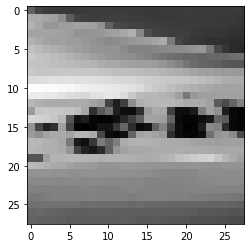

1/1 [==============================] - 0s 25ms/step
[[5.3907312e-20 0.0000000e+00 3.6623385e-23 2.7826595e-20 1.0698556e-09
  8.6812427e-25 2.1633701e-21 6.6580808e-14 1.0357879e-08 6.2291227e-27
  2.2147404e-02 2.6767916e-13 8.3652000e-21 7.9261397e-08 1.6669919e-20
  1.2686325e-17 4.5518464e-06 3.0836545e-17 7.5125644e-16 6.9950746e-19
  2.1553234e-12 9.7784787e-01 1.4419854e-19 3.4223969e-16 8.8683372e-09
  6.7167885e-27]]
v


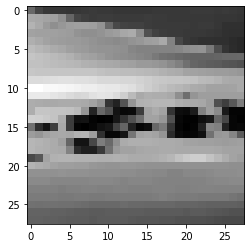

1/1 [==============================] - 0s 37ms/step
[[9.78982989e-20 0.00000000e+00 4.44017176e-23 4.91617833e-21
  5.35572087e-10 1.19665693e-24 1.39532071e-21 1.05521216e-13
  4.87331864e-09 4.11793135e-27 3.43180122e-03 1.89567370e-13
  5.89451762e-22 7.89378234e-08 5.56307114e-21 6.54054812e-18
  1.86793966e-06 2.65201218e-18 4.60429587e-16 8.83524123e-19
  1.47170839e-12 9.96566236e-01 1.11473315e-19 6.88042679e-17
  7.58196617e-09 3.51122567e-27]]
v


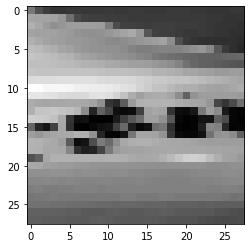

1/1 [==============================] - 0s 29ms/step
[[6.7091534e-20 0.0000000e+00 1.8824073e-23 9.8969585e-22 1.0726236e-10
  5.2205981e-25 1.1114846e-22 2.1653132e-14 2.3141278e-09 1.4122612e-27
  6.5982412e-04 1.3872819e-13 3.2794081e-22 1.5376044e-08 7.3754738e-22
  1.5250810e-18 1.3462468e-06 2.6962547e-19 3.7883194e-16 3.9691194e-19
  5.7375030e-13 9.9933881e-01 1.3214283e-20 8.2024169e-17 1.5668359e-09
  1.0821412e-27]]
v


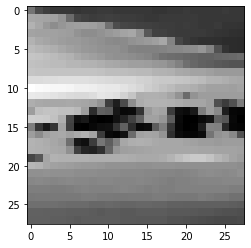

1/1 [==============================] - 0s 24ms/step
[[3.5291567e-20 0.0000000e+00 3.5334080e-23 4.7218099e-21 1.2185717e-09
  5.0004359e-25 1.5947064e-21 1.3385278e-13 2.9281904e-09 3.5318239e-27
  3.1835719e-03 1.0009481e-13 2.0492844e-21 6.2708573e-08 8.6215920e-21
  5.5480195e-18 1.6178337e-06 6.0089158e-18 2.7726517e-16 1.0681931e-18
  1.7923454e-12 9.9681467e-01 1.0173498e-19 4.5689563e-17 7.2463453e-09
  3.3849197e-27]]
v


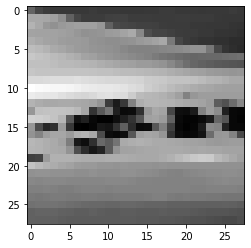

1/1 [==============================] - 0s 24ms/step
[[4.1548662e-20 0.0000000e+00 8.5499377e-23 3.4543347e-20 3.8468899e-09
  1.9260654e-24 1.9363095e-20 1.2377375e-13 3.9609116e-09 7.3688892e-27
  1.3339044e-02 4.6121315e-13 1.7179703e-20 6.1009317e-08 8.6549930e-20
  7.6981233e-18 1.9790984e-06 2.5027269e-17 3.0370591e-16 2.1805610e-18
  3.5738647e-12 9.8665881e-01 6.0538816e-19 4.2600764e-17 2.0235888e-08
  7.7702838e-27]]
v


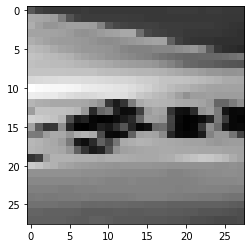

1/1 [==============================] - 0s 26ms/step
[[5.2272031e-20 0.0000000e+00 9.6880992e-23 2.0892637e-20 1.6248348e-08
  1.2651623e-23 1.9477431e-19 1.9639240e-13 1.6137932e-08 1.5372284e-26
  3.0217869e-03 1.8809377e-12 7.6983573e-20 4.6605454e-08 2.6752494e-19
  1.1829228e-17 9.2543854e-07 1.2031065e-16 2.5512455e-16 1.5718960e-17
  3.4608160e-11 9.9697721e-01 1.3101508e-17 8.1093234e-17 1.1367217e-08
  1.4961351e-26]]
v


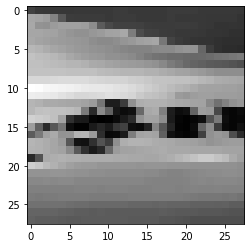

1/1 [==============================] - 0s 25ms/step
[[5.8996815e-20 0.0000000e+00 1.9474083e-21 8.8046293e-20 7.6543706e-08
  2.0534230e-22 6.0436317e-17 1.1321744e-12 3.5223169e-07 2.4455013e-25
  2.4192708e-02 9.8128804e-11 6.6577338e-19 1.6556223e-07 1.2735150e-17
  3.9035527e-16 2.1078586e-06 3.5391012e-15 3.6592806e-15 1.2780035e-15
  1.0991378e-09 9.7579831e-01 4.3590655e-16 5.4959113e-16 6.3537436e-06
  2.0756286e-25]]
v


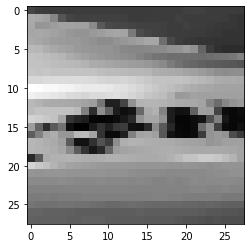

1/1 [==============================] - 0s 27ms/step
[[2.4450725e-20 0.0000000e+00 9.6588634e-22 5.0986718e-20 3.0325484e-08
  3.4650441e-23 2.0881481e-17 5.8227983e-13 2.5529789e-07 1.5685809e-25
  2.0440293e-02 4.0878776e-11 1.2755389e-18 1.1210596e-07 5.2293945e-18
  4.2017964e-16 3.0835402e-06 3.5242460e-15 2.5849231e-15 5.1736428e-16
  9.0341545e-10 9.7955155e-01 8.1106105e-17 2.8200599e-16 4.7285171e-06
  1.2852589e-25]]
v


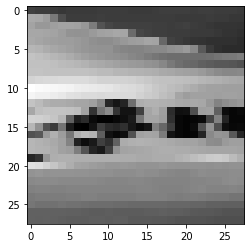

1/1 [==============================] - 0s 26ms/step
[[8.7397680e-20 0.0000000e+00 6.0374345e-22 7.6402284e-19 3.3122038e-08
  2.7326012e-23 2.5964467e-17 1.6537968e-12 3.1298208e-07 2.3789183e-25
  9.5861237e-03 1.7481125e-10 5.5514419e-18 3.4966234e-08 1.4726877e-17
  2.7935099e-16 1.3030117e-04 3.3876008e-13 3.9538295e-15 2.9949304e-16
  1.6894244e-09 9.9027562e-01 7.7465034e-17 1.6052560e-15 7.6428369e-06
  2.1383219e-25]]
v


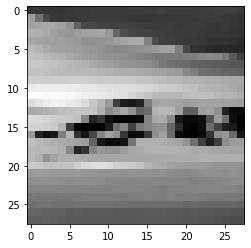

1/1 [==============================] - 0s 26ms/step
[[3.7805866e-21 5.1078541e-35 1.9186962e-27 7.3309756e-25 2.8359582e-15
  3.0789457e-29 2.5959637e-25 5.1788955e-13 4.5244930e-10 4.9575743e-30
  4.1690962e-10 1.3570791e-15 1.0754431e-24 8.8415311e-17 2.3256326e-24
  3.2800904e-18 9.9997950e-01 7.7187029e-15 7.2082587e-20 5.4434838e-21
  1.5732666e-15 2.0485624e-05 1.0102020e-21 2.3138690e-19 1.1026317e-09
  3.3303286e-29]]
q


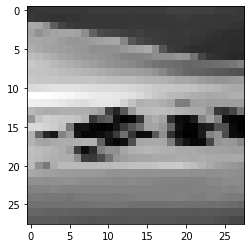

1/1 [==============================] - 0s 26ms/step
[[3.8393504e-20 0.0000000e+00 2.3644879e-21 1.0802484e-20 7.0087151e-11
  1.6348521e-25 1.3748389e-21 6.3154644e-08 9.8597290e-08 3.9295149e-27
  8.0570153e-08 2.8585347e-08 4.9775817e-25 1.7458039e-09 6.3201806e-18
  5.8114682e-16 7.5818878e-03 2.9686458e-14 3.1444371e-19 7.9558581e-16
  1.4517421e-14 9.9241781e-01 4.1284290e-20 4.9770494e-18 7.5704492e-09
  1.6403612e-26]]
v


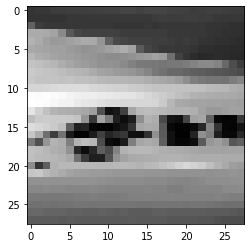

1/1 [==============================] - 0s 25ms/step
[[9.6881190e-20 0.0000000e+00 1.5351720e-19 5.9443384e-21 2.4904785e-09
  9.0033042e-23 1.1544125e-14 1.4355908e-05 1.8501605e-04 1.3597513e-24
  6.8493432e-07 2.7335234e-02 3.6332297e-21 9.0772495e-10 1.3790207e-14
  9.8582839e-13 3.5850707e-02 2.9006060e-09 1.1969957e-16 2.1834589e-12
  1.0014892e-11 9.3661314e-01 3.3748578e-14 9.4746215e-16 7.6702338e-07
  5.7918953e-24]]
v


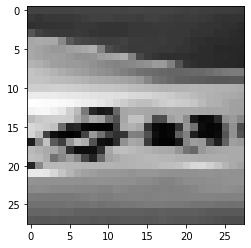

1/1 [==============================] - 0s 27ms/step
[[3.85095041e-23 2.60403768e-35 4.46013565e-21 3.06046649e-25
  1.00677695e-11 1.10780538e-26 1.36598251e-16 7.23239784e-12
  6.81604797e-06 3.18458853e-27 4.24658765e-07 4.50190747e-08
  1.14112251e-21 5.55293914e-18 4.57623147e-19 3.81442566e-09
  9.99992371e-01 6.64536839e-13 7.04759982e-21 2.16974186e-16
  5.25711907e-13 2.86477416e-07 1.23131453e-11 9.06654381e-20
  2.22093384e-08 1.42808291e-26]]
q


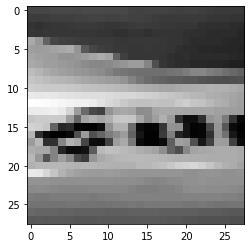

1/1 [==============================] - 0s 27ms/step
[[6.4714993e-23 2.1745047e-31 2.9293124e-22 2.7877458e-23 7.9129659e-17
  1.5022625e-26 1.4414376e-13 3.3811014e-12 1.2599984e-08 1.0313037e-27
  4.8517040e-03 2.8853619e-10 8.4357907e-23 4.0151293e-18 4.4535609e-17
  8.4279694e-09 9.9514729e-01 7.4345051e-14 1.6430628e-23 2.2816915e-21
  1.0141402e-15 5.6345081e-11 4.6311663e-07 3.1871950e-22 5.5364882e-07
  8.5139138e-27]]
q


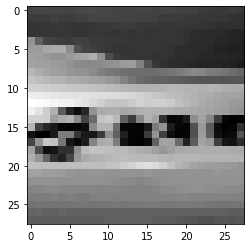

1/1 [==============================] - 0s 25ms/step
[[1.3279432e-22 6.6626338e-31 3.4154317e-20 5.4401516e-21 4.9545132e-14
  2.9403979e-23 1.9284203e-10 1.6691439e-07 2.4223004e-07 5.3506506e-26
  9.7224426e-01 1.5506080e-07 5.4895450e-26 1.5090417e-11 1.6174938e-14
  7.7754780e-10 6.3061593e-03 4.6274979e-13 6.1425609e-18 4.3318029e-17
  5.2275268e-16 1.2286190e-08 3.2502203e-04 2.0668573e-22 2.1124046e-02
  2.9439754e-25]]
k


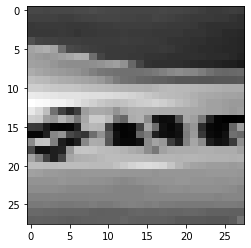

1/1 [==============================] - 0s 24ms/step
[[1.5682656e-24 4.0094863e-34 4.6654103e-18 1.6323597e-20 2.5844402e-16
  1.8380902e-23 8.7342953e-13 2.4472298e-09 1.6795157e-08 6.9927623e-28
  5.6099291e-03 1.8284210e-05 2.5527823e-31 2.9580881e-13 4.8791907e-14
  7.5201217e-12 7.8557963e-07 2.9004642e-13 7.5803369e-18 9.9709587e-21
  2.0567534e-20 2.6900292e-12 1.0413310e-07 6.0865207e-23 9.9437088e-01
  3.0421677e-27]]
y


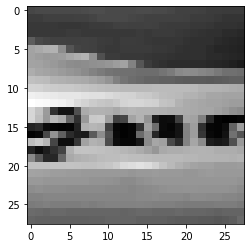

1/1 [==============================] - 0s 27ms/step
[[1.6423742e-24 1.3944899e-35 5.2118665e-19 9.1699175e-21 2.1269224e-17
  3.8199512e-21 6.4086188e-14 3.1930400e-10 1.6620705e-08 3.2855888e-28
  2.6529056e-06 1.9648736e-05 1.9781733e-32 6.5593223e-13 1.0679204e-13
  1.4398349e-12 1.3561307e-09 2.2701099e-15 3.6964034e-18 1.6270061e-20
  1.4240448e-21 1.1238513e-13 4.1210401e-07 1.6011449e-22 9.9997723e-01
  8.3956159e-28]]
y


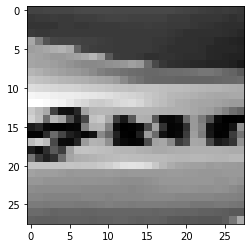

1/1 [==============================] - 0s 27ms/step
[[6.1605096e-25 1.8999492e-36 2.8492131e-22 1.3184380e-21 2.9212747e-17
  5.3084962e-20 9.4656387e-16 3.7529363e-10 2.5572666e-09 9.1204056e-29
  1.0114013e-08 4.6106189e-07 1.1450967e-32 4.0831448e-15 5.6242551e-15
  3.0759138e-14 1.2849358e-08 1.5088928e-16 1.8225157e-18 8.7058505e-19
  4.6599369e-21 3.2799494e-14 2.3985065e-09 6.5037452e-24 9.9999952e-01
  1.8581687e-28]]
y


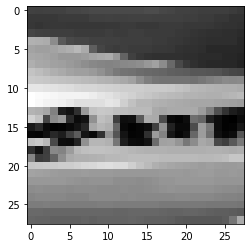

1/1 [==============================] - 0s 25ms/step
[[7.7912376e-24 2.9743069e-37 2.8315936e-22 1.8067777e-21 4.9350389e-18
  7.7547386e-16 2.3443318e-15 3.7013773e-12 5.1128946e-09 6.3328664e-28
  1.4801359e-09 3.3088455e-07 1.7735708e-27 4.4320938e-14 6.9994188e-14
  1.8269709e-13 1.3669464e-11 3.8137716e-22 1.2440004e-17 3.8899138e-13
  1.3056566e-18 1.5899407e-11 3.1082513e-05 1.1266229e-21 9.9996853e-01
  1.0038802e-27]]
y


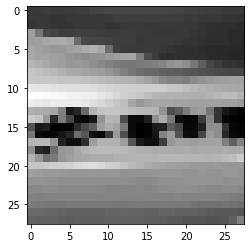

1/1 [==============================] - 0s 27ms/step
[[3.8138109e-18 3.4527693e-32 2.2695081e-18 8.8507078e-20 2.4416347e-11
  1.9532060e-14 4.0819903e-09 3.6787137e-10 1.7862056e-03 6.8512420e-24
  2.2515587e-03 4.9323749e-05 3.0760785e-18 7.6935552e-10 7.4424440e-13
  1.9846857e-08 1.4047994e-05 7.6102312e-18 1.9016209e-17 1.3119842e-09
  1.3822747e-11 4.3371958e-07 3.6336324e-01 8.0299544e-16 6.3253516e-01
  2.4017588e-23]]
y


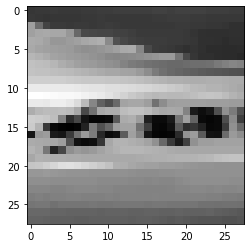

1/1 [==============================] - 0s 25ms/step
[[2.3003468e-17 9.1871965e-31 1.1541487e-16 1.4337566e-22 1.7060080e-08
  2.3967265e-21 3.1146635e-12 4.9073041e-11 5.8242965e-01 2.3639801e-24
  1.2090183e-01 4.0936243e-08 1.3042037e-18 2.0471295e-10 1.9756759e-17
  2.7495655e-09 2.9666567e-01 5.4735239e-14 4.2944314e-18 3.1275158e-12
  6.5686276e-11 1.5728432e-06 1.0091992e-07 4.8466886e-16 1.1928133e-06
  6.6250156e-24]]
i


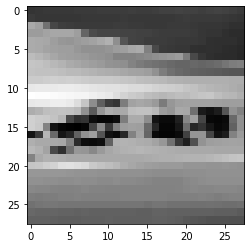

1/1 [==============================] - 0s 25ms/step
[[3.9336048e-17 7.8526399e-29 6.3370414e-18 4.4822706e-24 7.4316114e-10
  6.7058385e-21 2.5047813e-13 5.8466105e-12 5.8726496e-01 4.8920331e-25
  7.7410768e-06 5.1472373e-09 2.6366871e-19 2.9213790e-13 2.2664910e-18
  1.4870735e-10 4.1272619e-01 2.1508660e-14 1.9196242e-18 6.0069560e-11
  1.3255190e-11 1.0589716e-06 7.3083495e-09 1.6354065e-14 9.7155812e-08
  1.8459312e-24]]
i


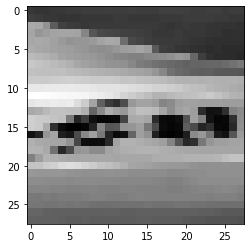

1/1 [==============================] - 0s 26ms/step
[[5.65360495e-18 9.78076225e-30 7.71998295e-20 7.22988431e-26
  7.79760631e-11 6.59403050e-22 4.45859350e-16 8.17479114e-13
  5.53331226e-02 2.30259100e-26 8.72570460e-09 6.09271744e-10
  1.81250798e-20 3.20778196e-15 1.57900611e-19 2.08819463e-12
  9.44665849e-01 1.17984744e-15 6.88943610e-20 4.74059377e-12
  1.07712103e-12 1.04810749e-06 1.08732676e-11 9.14436272e-15
  9.90934357e-09 9.78839689e-26]]
q


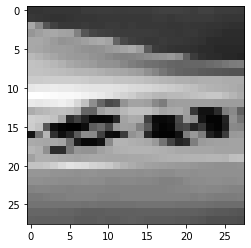

1/1 [==============================] - 0s 27ms/step
[[8.27138840e-18 5.68261165e-30 1.58217286e-18 8.82202872e-25
  1.87571270e-09 7.55686742e-22 1.42725811e-13 1.36753781e-12
  8.76932263e-01 1.71105040e-25 5.88612420e-05 2.12165796e-09
  6.58896145e-20 6.94864001e-12 1.20435571e-19 2.26107341e-10
  1.23008735e-01 2.46420710e-15 3.43289286e-19 2.15648506e-11
  4.51397513e-12 7.67337838e-08 3.04396686e-09 1.47784618e-16
  3.83944476e-09 4.67479318e-25]]
i


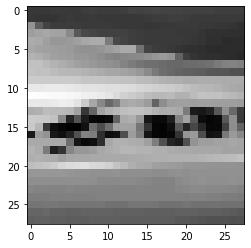

1/1 [==============================] - 0s 25ms/step
[[7.9362573e-17 4.8221139e-31 5.3403019e-16 2.7466587e-22 7.7269799e-09
  2.6300363e-20 1.4872234e-11 1.0523695e-10 8.6600012e-01 6.4431800e-24
  1.2258316e-01 1.5072227e-06 1.9518270e-18 3.7371700e-10 7.9894139e-17
  7.9101596e-09 1.1408646e-02 8.2033562e-14 2.2037433e-17 1.9077873e-11
  1.5020542e-10 4.0438476e-06 1.3707435e-06 1.3819493e-15 1.1267948e-06
  2.1540756e-23]]
i


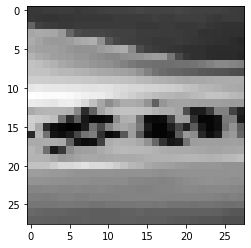

1/1 [==============================] - 0s 24ms/step
[[1.2832958e-16 1.0390153e-30 3.2874422e-15 5.8133009e-21 1.6890404e-08
  2.9981254e-18 4.0332284e-09 8.4093332e-10 6.4070988e-01 5.9007193e-23
  3.5736519e-01 4.8622060e-05 1.8801500e-16 2.8276756e-09 8.0261657e-15
  1.7733559e-07 1.2184717e-03 5.2127816e-12 1.2761684e-16 8.2922294e-11
  1.4442685e-09 6.1438286e-06 6.4304785e-04 1.9043256e-14 8.5093534e-06
  2.4423121e-22]]
i


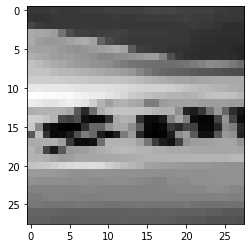

1/1 [==============================] - 0s 33ms/step
[[1.9044780e-17 9.1201000e-32 2.1107456e-16 6.1568240e-21 1.5003093e-09
  2.2104712e-18 5.0883826e-09 1.7629334e-10 2.3345736e-01 2.3764914e-23
  7.5703263e-01 1.5392714e-05 1.4453796e-15 3.8102743e-09 2.4692959e-14
  5.8600147e-08 2.1200140e-04 6.3146585e-13 2.0586977e-17 2.3550991e-11
  7.5114653e-10 7.5245038e-07 9.2781177e-03 1.5546737e-14 3.6310128e-06
  1.4558385e-22]]
k


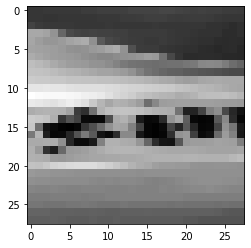

1/1 [==============================] - 0s 25ms/step
[[3.7938096e-17 8.2568146e-32 1.0726036e-15 1.6460749e-19 4.0830084e-10
  5.5392825e-17 1.8373203e-08 9.0515018e-10 3.5199362e-01 3.8638016e-23
  6.0237652e-01 1.5941360e-04 9.4701314e-17 2.9797167e-09 1.8755916e-13
  2.3251969e-08 1.4342702e-04 2.8304144e-13 7.0123601e-17 1.6311110e-11
  1.9117558e-10 1.1826971e-06 4.5289185e-02 1.0246013e-14 3.6581339e-05
  1.9703313e-22]]
k


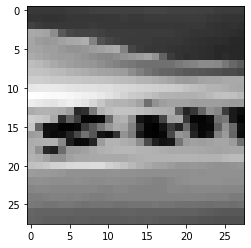

1/1 [==============================] - 0s 26ms/step
[[6.2258986e-17 9.0653713e-32 6.2284445e-16 8.4784850e-19 2.0080877e-10
  1.7117761e-15 6.8995213e-08 2.3356170e-09 3.6833602e-01 5.4240978e-23
  1.5347619e-01 7.0953713e-04 1.8964755e-17 5.8584941e-09 6.6744868e-13
  4.6177320e-08 6.5287335e-05 7.1393060e-14 2.3473358e-16 3.4254943e-11
  2.4047372e-10 1.7539727e-06 4.7703603e-01 1.5998116e-14 3.7515702e-04
  3.1864147e-22]]
w


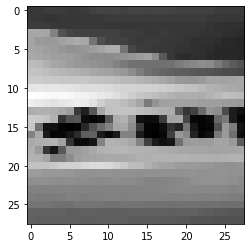

1/1 [==============================] - 0s 26ms/step
[[2.3404711e-16 1.8883055e-32 3.6915435e-16 6.6572064e-19 4.1921924e-10
  6.6492727e-16 3.0076219e-08 5.3695435e-09 5.6611240e-01 6.8829925e-23
  2.2522047e-01 1.0257683e-03 2.5780366e-16 7.6251556e-09 4.0696206e-13
  6.2599511e-08 4.0995801e-05 2.4294881e-13 1.1891108e-15 3.5240363e-11
  6.5324718e-10 3.3271158e-06 2.0715028e-01 6.0244487e-14 4.4667046e-04
  4.5012035e-22]]
i


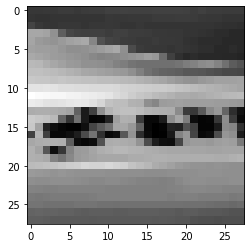

1/1 [==============================] - 0s 27ms/step
[[1.1324492e-16 7.3378789e-32 3.5165264e-16 2.0824120e-20 8.8755286e-10
  4.6298136e-17 6.3575438e-09 5.0657665e-09 7.9704535e-01 8.3080325e-23
  1.5330923e-01 1.3087606e-03 2.1419745e-14 1.4735287e-08 9.2525664e-14
  1.5381252e-07 3.9057286e-05 8.0218982e-12 7.1661777e-16 2.5956184e-10
  2.6036027e-09 8.0640330e-06 4.8276324e-02 3.0385643e-14 1.3106715e-05
  5.5635136e-22]]
i


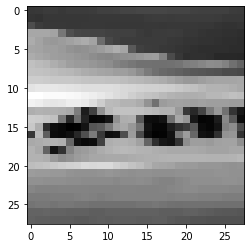

1/1 [==============================] - 0s 26ms/step
[[4.65115387e-17 5.64458563e-31 6.96138594e-17 2.05960743e-21
  2.83800938e-09 1.36232279e-17 2.61635247e-09 7.83835219e-10
  9.76935029e-01 3.04143839e-23 1.83816645e-02 1.26295825e-04
  1.69850816e-15 1.86560478e-09 7.28301967e-15 1.52013200e-07
  1.58440234e-04 4.63289173e-12 1.09894194e-16 3.77079479e-10
  1.82231519e-09 1.07550591e-06 4.39583790e-03 4.64079323e-14
  1.51042605e-06 1.96677501e-22]]
i


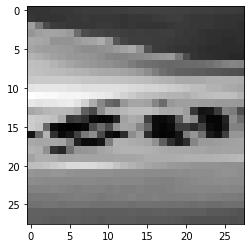

1/1 [==============================] - 0s 28ms/step
[[7.1012273e-18 1.5244156e-30 9.0704149e-19 2.6376306e-25 7.1239792e-10
  3.5160273e-21 5.0532278e-14 1.1872879e-12 9.9501812e-01 1.1243579e-25
  1.4002506e-05 1.3667217e-08 2.5249767e-20 1.5758955e-11 1.4793385e-19
  1.4802821e-10 4.9678576e-03 2.3143505e-16 2.9297525e-19 2.7019815e-11
  3.8147588e-12 4.3755623e-08 1.0414738e-08 1.7982081e-16 1.8379704e-09
  3.6680967e-25]]
i


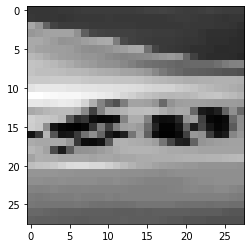

1/1 [==============================] - 0s 25ms/step
[[6.0494709e-17 2.4722966e-29 6.3778471e-18 8.5711443e-25 5.7692739e-10
  4.4501748e-20 1.1348814e-13 7.0194818e-12 9.8116642e-01 3.2747926e-25
  1.9073245e-06 2.6877174e-08 2.6378085e-20 2.4999961e-12 1.0321742e-18
  1.5383522e-10 1.8831434e-02 9.7376115e-16 8.9968093e-19 5.2204019e-10
  3.7564838e-12 2.5893871e-07 7.6963564e-09 2.9574259e-15 4.1983066e-09
  1.0637665e-24]]
i


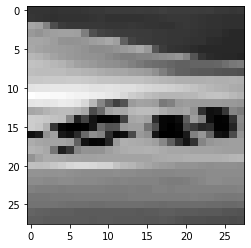

1/1 [==============================] - 0s 27ms/step
[[3.95626193e-17 1.30268442e-29 1.88464740e-19 2.23943362e-25
  7.10945636e-10 9.05391832e-21 1.26983516e-15 1.41080385e-11
  3.73430878e-01 1.58347150e-25 2.05859561e-08 1.10940270e-08
  5.08679888e-20 9.10625850e-13 1.16082795e-18 3.77401617e-11
  6.26564682e-01 1.86924268e-15 2.26540601e-19 2.06059697e-10
  3.51595055e-12 4.35968877e-06 1.02014737e-10 1.19564316e-14
  8.23933455e-09 5.86381709e-25]]
q


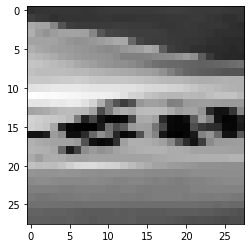

1/1 [==============================] - 0s 27ms/step
[[1.87570711e-18 1.59176617e-31 1.07245653e-21 4.45181572e-26
  6.08595535e-11 2.61334046e-23 8.59806619e-20 1.33959207e-11
  1.27854975e-04 3.84840477e-27 7.81781861e-10 3.16276415e-11
  5.17098576e-23 2.90554202e-13 4.96228194e-21 1.70446339e-14
  9.99745309e-01 6.31443127e-18 1.13741729e-19 1.62476317e-11
  1.81478140e-12 1.26806292e-04 2.23271717e-16 2.55965532e-17
  1.15475762e-09 1.27150735e-26]]
q


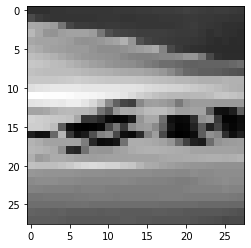

1/1 [==============================] - 0s 26ms/step
[[4.1875167e-18 1.7912668e-31 7.8097255e-23 5.2501787e-26 1.4291968e-11
  6.1210640e-24 2.5114227e-21 7.9604908e-12 1.9688267e-05 2.7958348e-27
  1.1638196e-09 4.8605824e-13 2.1187206e-22 6.3039905e-14 1.9841688e-21
  5.8861023e-15 9.9953806e-01 1.8732961e-17 3.4868212e-19 1.4707266e-12
  1.0825508e-12 4.4231411e-04 2.9744877e-16 1.8406905e-16 9.0849350e-10
  1.1814225e-26]]
q


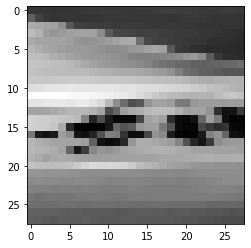

1/1 [==============================] - 0s 29ms/step
[[1.9193639e-17 5.7838577e-32 2.2909926e-23 8.5467518e-24 1.1811279e-11
  2.9422316e-23 3.5312642e-23 1.4319625e-10 2.7467045e-06 4.1819697e-27
  9.4701649e-11 1.5039496e-11 3.9424032e-22 3.2066926e-14 2.2899650e-20
  1.7363261e-15 9.7570115e-01 6.1763885e-16 7.3074304e-19 1.4119072e-13
  1.0143941e-12 2.4296097e-02 1.1388365e-15 4.9965504e-15 1.6886719e-09
  2.4475154e-26]]
q


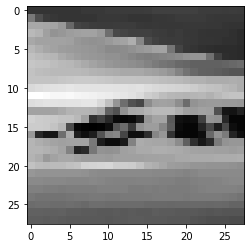

1/1 [==============================] - 0s 33ms/step
[[3.79993166e-18 1.36591927e-34 5.46696108e-24 3.52979157e-23
  1.88443358e-12 3.44700898e-24 1.49891271e-23 1.07368635e-10
  2.34551560e-08 2.13452106e-27 4.35003318e-11 1.38514486e-11
  2.81859067e-22 1.38801747e-14 1.53194082e-19 7.25692936e-16
  9.70114350e-01 1.18729989e-14 4.80658576e-19 4.32687088e-15
  3.73258987e-13 2.98853591e-02 7.12327604e-16 4.13888250e-16
  2.24459953e-07 1.00306699e-26]]
q


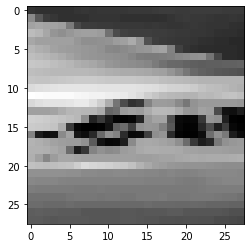

1/1 [==============================] - 0s 27ms/step
[[3.93116345e-19 3.35929910e-33 1.91735256e-25 5.38761479e-25
  2.15506391e-13 3.71673245e-25 6.42507436e-25 7.42038549e-12
  1.43955052e-08 1.11036710e-28 1.33398208e-12 1.01669161e-13
  9.15479644e-23 1.99614498e-16 1.07943203e-21 5.11414108e-17
  9.99541283e-01 1.05124068e-16 4.15699972e-20 2.93122078e-16
  1.66654058e-13 4.58725524e-04 1.04707434e-16 2.59988081e-16
  1.93877092e-09 7.29417366e-28]]
q


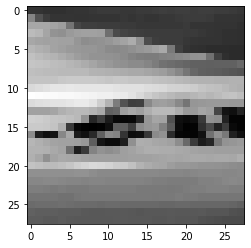

1/1 [==============================] - 0s 32ms/step
[[1.5508698e-18 8.0050952e-33 1.8925493e-24 5.5179609e-24 2.8678789e-12
  8.2206098e-24 5.2936720e-24 3.2917617e-11 5.4945541e-08 7.1274228e-28
  4.0624327e-12 2.1165459e-12 5.7131856e-22 1.7945469e-15 1.2700816e-20
  2.2244295e-16 9.9277580e-01 5.2680690e-16 1.8826246e-19 3.4237002e-15
  7.3321584e-13 7.2241677e-03 2.1580900e-15 1.7227272e-15 2.7387883e-09
  4.3073654e-27]]
q


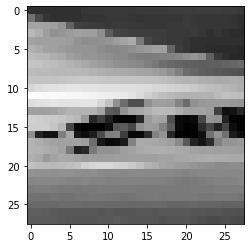

1/1 [==============================] - 0s 26ms/step
[[2.5323599e-18 1.2819527e-33 5.6355257e-24 2.5636605e-23 7.5968520e-12
  6.3573046e-24 2.0413492e-23 1.7518979e-10 8.5656801e-08 2.2430139e-27
  2.9515387e-11 4.8575913e-12 6.5968527e-22 1.5539760e-14 1.3566066e-19
  7.4016592e-16 9.7992480e-01 2.4022900e-15 2.0187719e-19 5.5104457e-15
  9.6704979e-13 2.0075118e-02 2.5454676e-15 4.4757396e-16 2.5970580e-08
  1.2409146e-26]]
q


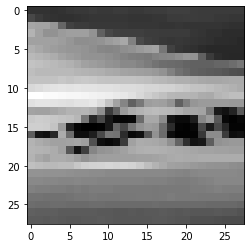

1/1 [==============================] - 0s 36ms/step
[[2.01641371e-17 2.30530414e-32 4.07361461e-22 2.27811796e-23
  1.01762633e-10 8.16074335e-23 2.25833192e-21 4.60583571e-10
  3.64406769e-05 1.83568410e-26 1.60053948e-09 2.06554530e-11
  3.02791170e-22 6.43799358e-13 8.64915235e-20 1.82563908e-14
  9.20990884e-01 2.95483579e-16 4.24277108e-18 2.75214075e-12
  2.12109128e-12 7.89726675e-02 1.02651510e-15 1.69862706e-15
  9.43284650e-09 1.00773116e-25]]
q


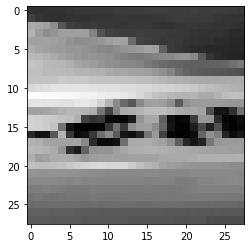

1/1 [==============================] - 0s 26ms/step
[[2.12659218e-17 5.85786039e-32 2.09089650e-21 7.53048296e-25
  2.16377929e-10 1.91685526e-22 3.23698780e-20 2.46635740e-10
  6.31496019e-04 3.49066143e-26 2.59969291e-09 2.47375297e-11
  7.43359610e-22 1.94057769e-12 3.77244443e-20 1.48848531e-13
  9.90834832e-01 6.15232389e-17 9.20716542e-18 1.08429994e-10
  1.48495053e-11 8.53375345e-03 2.48004555e-15 8.50297412e-16
  1.95158751e-08 1.44612687e-25]]
q


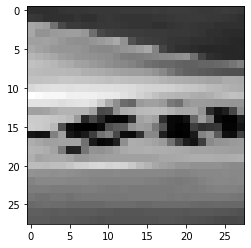

1/1 [==============================] - 0s 33ms/step
[[1.4383281e-17 2.2879632e-31 9.2942216e-21 6.2579688e-26 1.0123804e-09
  4.2138660e-22 2.1985809e-19 1.3720666e-10 4.1845678e-03 2.6028650e-26
  1.3323135e-09 3.5541151e-10 1.3308470e-22 3.4561286e-12 1.8128057e-20
  2.2576521e-13 9.9490029e-01 4.5707337e-18 2.2040488e-18 2.6603861e-10
  1.7072477e-11 9.1507990e-04 9.9030730e-16 3.0497435e-16 2.9809024e-09
  8.5211923e-26]]
q


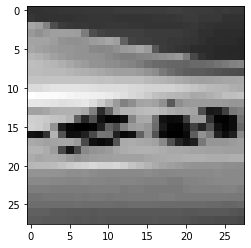

1/1 [==============================] - 0s 26ms/step
[[7.6507219e-16 4.6637545e-30 2.4551482e-18 1.0790649e-22 2.0740335e-07
  1.1198116e-18 7.0709341e-15 4.1852438e-08 5.6298727e-01 1.0085574e-23
  1.0532048e-06 5.6262269e-07 4.9513261e-20 4.8774544e-09 1.1652254e-16
  2.3115776e-10 4.3124670e-01 3.6602330e-14 1.8169701e-16 1.4534750e-08
  9.0895919e-10 5.7636397e-03 7.7694733e-11 4.4898066e-14 5.3394388e-07
  3.3655239e-23]]
i


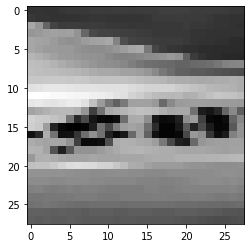

1/1 [==============================] - 0s 25ms/step
[[1.6058342e-16 1.6392645e-29 2.9432300e-18 5.6204754e-24 2.9579714e-09
  1.0957213e-19 6.9593257e-14 9.0328002e-11 9.8242873e-01 6.3707011e-25
  3.2134614e-07 6.4286624e-08 2.0687189e-20 2.9330021e-11 2.4235300e-18
  1.0518059e-10 1.7570378e-02 2.9838186e-15 2.2829056e-18 1.5109080e-09
  5.5974765e-12 5.1250220e-07 4.2818549e-09 3.1125079e-15 9.1511989e-09
  1.8018131e-24]]
i


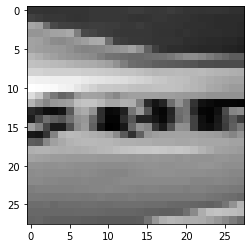

1/1 [==============================] - 0s 26ms/step
[[1.6813342e-24 2.3688138e-36 4.3460035e-16 1.7928445e-18 1.5024701e-14
  3.2752806e-18 6.5061140e-21 1.0263295e-16 9.9989676e-01 2.0313782e-28
  9.0816167e-05 4.2260019e-17 1.4921344e-22 9.4185619e-09 1.0906980e-24
  2.3319045e-11 1.9918774e-18 2.3776670e-29 7.0946628e-15 1.3169229e-17
  3.9911168e-15 2.4997573e-06 8.3542886e-17 3.2838129e-10 9.8824894e-06
  8.1339515e-29]]
i


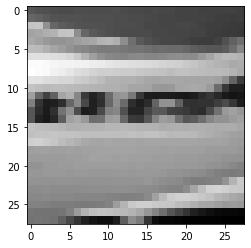

1/1 [==============================] - 0s 25ms/step
[[6.1163255e-11 5.0305254e-20 1.1725824e-16 5.9115031e-15 7.5298781e-28
  6.6822263e-11 2.2983189e-13 3.4430440e-18 4.9350590e-02 9.0889460e-26
  2.2022422e-02 8.0199497e-20 8.8809848e-01 1.8820755e-10 1.6479974e-21
  1.8418134e-06 3.8359413e-18 8.0309775e-26 4.4886956e-09 1.2280486e-18
  2.4519334e-21 4.0315004e-12 3.6044887e-22 1.1239118e-06 4.0525451e-02
  3.2235510e-26]]
m


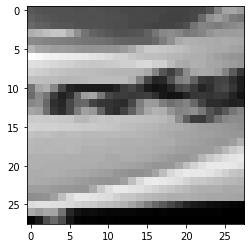

1/1 [==============================] - 0s 25ms/step
[[1.41040047e-07 5.67860191e-25 1.27347897e-24 5.16416687e-10
  8.41146482e-18 5.84117309e-14 5.53930551e-03 5.93829283e-12
  5.03957453e-05 4.10855128e-24 9.92479563e-01 3.04779986e-12
  2.61534387e-06 2.04674416e-05 2.98774135e-14 1.77756208e-03
  1.02445161e-18 1.51714440e-20 1.05509425e-04 3.46428974e-09
  3.25201250e-19 8.66074728e-18 3.65949772e-22 4.34498547e-13
  2.44719849e-05 4.68622476e-25]]
k


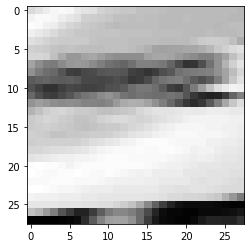

1/1 [==============================] - 0s 26ms/step
[[1.20425376e-03 1.33474922e-16 7.17997239e-32 2.10117673e-17
  3.42807109e-13 8.64898918e-22 1.26338934e-21 9.98793364e-01
  1.85491820e-06 7.27607245e-29 1.58006225e-15 6.79580835e-33
  2.28994447e-15 1.03919816e-13 2.85357099e-14 9.15150622e-08
  1.26082558e-17 2.06870478e-31 5.67146807e-13 3.69902608e-07
  8.28938905e-24 3.07888048e-25 8.73364733e-26 1.24375826e-23
  7.13787927e-08 1.32335371e-29]]
h


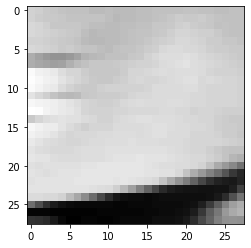

1/1 [==============================] - 0s 25ms/step
[[2.04045159e-09 1.08724485e-13 2.65537786e-10 4.66875635e-11
  4.46636648e-08 1.24905418e-05 1.82293486e-11 6.77734192e-07
  1.07515818e-02 2.39258389e-20 3.11196380e-09 4.93352234e-11
  4.69082683e-01 7.03476516e-14 1.85805689e-14 1.22546908e-07
  1.42886653e-03 7.55923237e-14 6.57102674e-08 5.10929763e-01
  1.38863417e-11 3.39707391e-08 6.27943697e-09 3.45352134e-07
  7.79337855e-03 2.34950374e-21]]
t


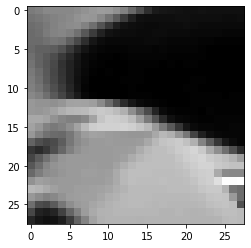

1/1 [==============================] - 0s 27ms/step
[[1.9836969e-22 2.9613679e-28 1.8998572e-32 2.8151830e-26 4.4784202e-22
  5.6407376e-35 5.9652739e-17 9.2520350e-17 2.5975217e-23 1.2589260e-35
  9.9656749e-01 9.1505590e-18 5.6430046e-25 2.1160929e-15 1.0516040e-26
  1.0850164e-15 3.4265246e-16 8.4909590e-16 9.6531262e-25 4.1343885e-33
  2.7797497e-22 1.3349580e-25 7.8683470e-26 1.5101748e-32 3.4325256e-03
  3.9564938e-36]]
k


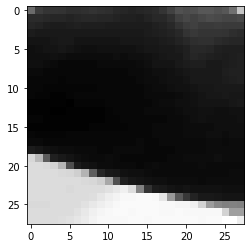

1/1 [==============================] - 0s 26ms/step
[[2.8198899e-16 4.6606962e-26 7.6706342e-02 1.9077713e-12 8.8149211e-23
  1.1311873e-18 1.2074034e-11 8.9921033e-01 1.6087673e-16 2.1529692e-28
  5.0751322e-15 2.3518126e-02 4.2041807e-20 1.5765145e-23 1.0719677e-25
  3.4619417e-12 5.6499493e-04 1.1509967e-26 2.7780465e-24 3.1344800e-18
  9.2640940e-26 1.7513985e-07 1.1884087e-32 3.0827099e-13 8.8447470e-27
  1.3389628e-28]]
h


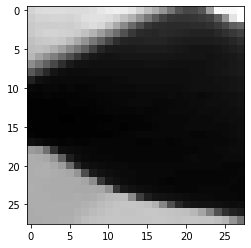

1/1 [==============================] - 0s 26ms/step
[[1.43551881e-06 1.16775630e-14 7.58193672e-01 5.59938277e-17
  6.11166326e-11 3.89003055e-03 9.70727433e-06 1.13565437e-01
  9.69968255e-07 5.12651672e-24 2.87190254e-11 7.00678227e-09
  6.16069533e-13 1.00242100e-18 5.62566660e-12 1.20338351e-01
  3.88481049e-03 4.62320639e-27 1.28722369e-12 2.01479669e-08
  1.05359126e-16 1.15501505e-04 1.92966472e-14 1.29598154e-08
  5.62360193e-21 5.47050534e-25]]
c


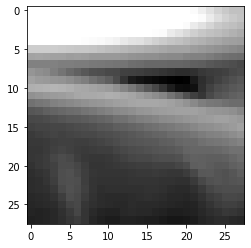

1/1 [==============================] - 0s 25ms/step
[[9.5369277e-04 2.1405141e-19 3.7338897e-26 7.2431550e-16 1.6091371e-02
  1.3344474e-12 1.3353083e-04 8.0121090e-06 7.3402436e-05 2.0395945e-21
  2.7333709e-08 2.6446288e-16 8.9679382e-11 3.3841925e-03 1.3283519e-02
  5.1424466e-02 8.1063523e-23 3.2555962e-29 7.3848445e-05 9.1457337e-01
  7.2982918e-24 5.2145190e-25 1.2584640e-18 5.4640520e-07 4.9623357e-14
  3.1984915e-21]]
t


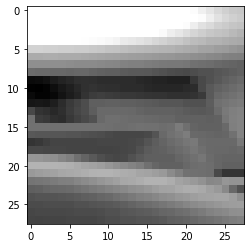

1/1 [==============================] - 0s 27ms/step
[[1.3121341e-02 3.5723914e-19 3.3082237e-18 9.7650221e-11 8.4951458e-13
  3.0232520e-14 4.3461648e-07 1.7833112e-04 7.0690135e-07 5.3683297e-23
  2.8658958e-04 3.2611904e-04 3.2241061e-08 6.4943000e-13 3.9299063e-12
  6.0624951e-01 3.6459345e-01 8.8055814e-16 9.0210291e-05 7.7735542e-08
  2.9755222e-19 5.9664762e-13 9.2307480e-22 3.9464859e-19 1.5153137e-02
  1.2995753e-22]]
p


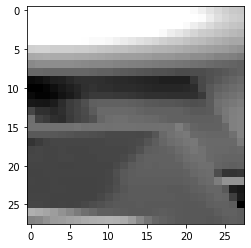

1/1 [==============================] - 0s 27ms/step
[[4.9728908e-07 1.7784901e-17 1.2104793e-28 2.5713337e-13 1.1165820e-10
  5.8383719e-15 1.9660551e-04 2.7234202e-07 2.2257200e-13 4.2219012e-25
  1.4799716e-08 1.8296898e-16 6.0161165e-10 9.8191515e-14 8.3612723e-13
  9.9815351e-01 2.6150491e-11 1.7925064e-18 1.1759439e-04 4.2173258e-04
  6.8681824e-18 1.2689280e-23 6.4224748e-24 7.7201944e-17 1.1098592e-03
  8.5859581e-25]]
p


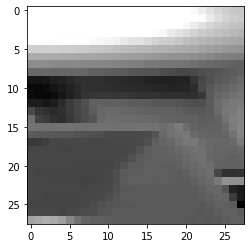

1/1 [==============================] - 0s 25ms/step
[[1.2989266e-05 1.7248520e-16 1.2132391e-29 1.0651668e-12 9.2001379e-10
  3.4442721e-14 1.2885233e-05 7.1938553e-07 2.6822933e-11 3.2372692e-24
  8.4643453e-08 9.5649025e-16 2.8503102e-09 1.0928924e-11 1.1732517e-11
  9.5381224e-01 1.5725168e-11 2.9731415e-19 7.0617790e-04 2.0133584e-05
  1.0088128e-19 2.1054316e-23 2.0699860e-22 9.0237590e-17 4.5434847e-02
  6.7154135e-24]]
p


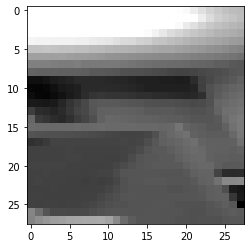

1/1 [==============================] - 0s 25ms/step
[[1.8894676e-06 5.1441260e-17 2.2732142e-30 3.0974322e-13 3.5547572e-11
  1.4569167e-12 1.9815448e-06 9.8653985e-10 6.4054530e-12 1.0909399e-25
  6.5566198e-11 1.7980048e-17 3.2553923e-10 1.3255818e-12 6.0571856e-12
  9.9969959e-01 8.5541729e-14 3.1068700e-20 2.0936431e-04 1.6563999e-05
  3.6342122e-20 5.2508495e-25 4.3755724e-22 3.3629506e-16 7.0633410e-05
  2.5310119e-25]]
p


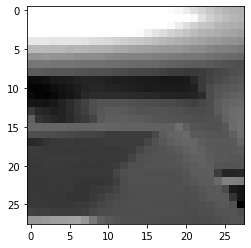

1/1 [==============================] - 0s 24ms/step
[[2.88931129e-04 8.07084862e-16 4.95914623e-29 3.74572403e-14
  9.17094845e-10 1.82108606e-10 1.97309831e-07 1.53035895e-09
  6.46492415e-10 5.15784771e-25 1.29405792e-10 3.00537084e-16
  3.84621446e-09 3.89207590e-11 5.98079711e-11 9.98249054e-01
  9.25282020e-15 1.25701104e-20 8.32671358e-04 1.10351866e-05
  3.64034796e-21 1.29070700e-23 4.38653207e-19 4.32004723e-16
  6.18145976e-04 1.13602853e-24]]
p


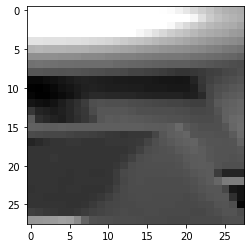

1/1 [==============================] - 0s 25ms/step
[[4.7568567e-04 1.4526175e-15 7.3884685e-29 2.5406333e-14 5.1719833e-09
  2.3797722e-10 1.7157424e-08 2.6912315e-09 1.9969000e-09 7.9657878e-25
  1.6039263e-10 3.1384990e-16 1.0732012e-08 3.2277066e-11 1.2827775e-10
  9.9737108e-01 9.4158046e-15 1.4892464e-21 1.0193131e-03 4.5281072e-06
  1.4891555e-21 2.9226151e-23 1.1838778e-17 2.4236718e-16 1.1293617e-03
  1.5230551e-24]]
p


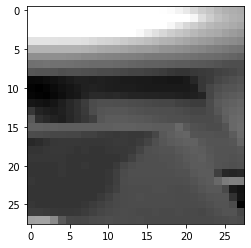

1/1 [==============================] - 0s 27ms/step
[[4.2477390e-05 1.5999349e-16 1.0622972e-28 1.5571897e-15 3.6088308e-09
  2.0813911e-11 5.4940286e-10 1.8646424e-09 8.0738277e-10 3.7431881e-25
  4.4645271e-10 6.4434717e-16 3.2223844e-09 2.4512899e-11 2.0880115e-11
  9.9897075e-01 2.0620049e-15 3.6960436e-22 1.4090566e-04 1.0221499e-07
  1.4702296e-22 3.9033071e-23 5.6388778e-19 9.1903828e-18 8.4572419e-04
  6.3222626e-25]]
p


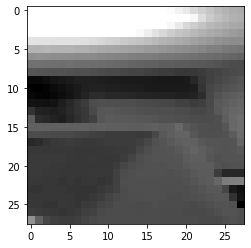

1/1 [==============================] - 0s 37ms/step
[[9.22267554e-06 4.69111887e-16 6.59838380e-28 1.45087617e-15
  2.51486143e-09 9.79806375e-11 2.94140323e-10 6.68240352e-10
  4.73702466e-10 3.88148260e-25 3.92650162e-10 2.19211830e-15
  1.24238009e-09 5.84197924e-12 1.34759166e-11 9.99265969e-01
  5.40834984e-16 8.86487049e-23 2.60701145e-05 6.28062082e-08
  2.29253976e-23 2.33296320e-23 5.25113402e-18 3.12198849e-18
  6.98558986e-04 7.90441733e-25]]
p


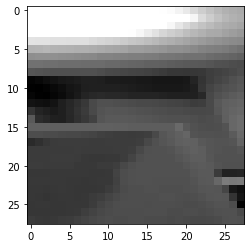

1/1 [==============================] - 0s 25ms/step
[[9.2121090e-06 1.9568661e-16 7.6459284e-28 2.0243137e-15 3.0576435e-09
  6.7085795e-11 2.8405059e-10 1.5022021e-09 7.8405848e-10 5.3661864e-25
  8.7677843e-10 1.1752894e-15 1.2124296e-09 5.6036755e-12 1.4922627e-11
  9.9850959e-01 1.8258178e-15 2.1067695e-22 5.5823541e-05 4.8745136e-08
  3.8521110e-23 7.8555040e-23 2.0680831e-18 1.0514293e-18 1.4253757e-03
  9.6922892e-25]]
p


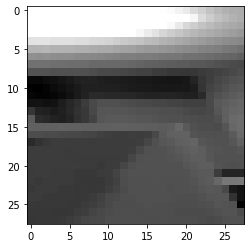

1/1 [==============================] - 0s 27ms/step
[[5.4799016e-06 6.2555593e-17 4.3926061e-28 6.5106404e-16 1.8267017e-09
  2.8336170e-11 2.9304620e-10 1.4948740e-09 2.2969762e-10 3.6855002e-25
  1.0720655e-09 2.0247429e-15 6.0757599e-10 4.5442066e-12 1.3378065e-11
  9.9849272e-01 1.4306514e-15 3.6925559e-22 2.7659789e-05 5.7585890e-08
  6.3893436e-23 7.0508628e-23 1.1488796e-18 2.8437632e-19 1.4740991e-03
  6.7506994e-25]]
p


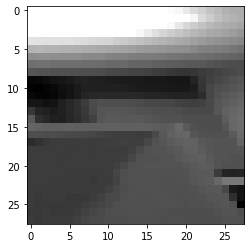

1/1 [==============================] - 0s 27ms/step
[[9.43852046e-06 1.33074554e-16 3.07437425e-28 2.08758427e-15
  2.57899124e-09 2.76792235e-11 3.52529672e-10 1.64699110e-09
  5.09412790e-10 5.89169050e-25 1.92064187e-09 2.53846711e-15
  1.30411548e-09 1.04267159e-11 3.69535097e-11 9.98330414e-01
  3.07515629e-15 3.81266901e-22 9.60633479e-05 2.81506178e-08
  4.87177176e-23 1.01919453e-22 1.62217956e-18 8.58613114e-19
  1.56410458e-03 1.08953386e-24]]
p


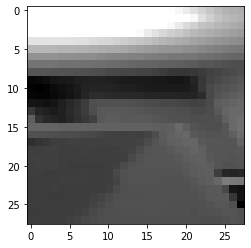

1/1 [==============================] - 0s 25ms/step
[[4.6682294e-06 8.7303401e-17 1.9872608e-28 2.7609729e-15 1.5480375e-09
  1.1097129e-11 6.6680794e-10 2.2817805e-09 4.7479237e-10 5.3584743e-25
  2.8956975e-09 1.8368975e-15 4.5956355e-10 2.0138738e-11 2.5299748e-11
  9.9705172e-01 7.0413328e-15 7.5817040e-22 1.6480357e-04 5.0989549e-08
  3.6498470e-23 4.7332629e-23 2.7048193e-19 1.0623590e-18 2.7788093e-03
  1.1189000e-24]]
p


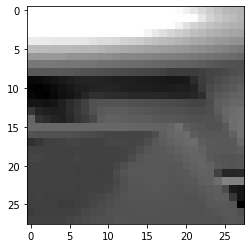

1/1 [==============================] - 0s 26ms/step
[[1.4371037e-06 5.1135654e-17 6.3672965e-29 2.5540987e-15 3.6399533e-10
  1.6090680e-12 1.3090111e-09 3.4583825e-09 3.6263624e-11 2.3830682e-25
  2.2553410e-09 9.6695926e-16 1.6519093e-10 5.8663257e-12 4.6796933e-12
  9.9730754e-01 1.1105169e-14 8.3206266e-22 3.4697106e-05 4.8396849e-08
  3.3939333e-23 1.8769694e-23 1.5565812e-20 2.5548241e-19 2.6563348e-03
  4.9912043e-25]]
p


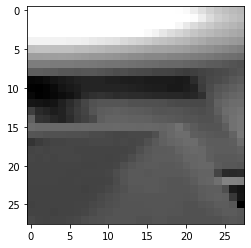

1/1 [==============================] - 0s 31ms/step
[[8.0094696e-07 1.1632925e-17 3.6386272e-29 3.9155309e-15 1.8766126e-10
  2.1030186e-13 1.5675036e-08 1.3708463e-08 1.8972521e-11 3.6988680e-25
  1.0581892e-08 6.4569465e-16 1.1103452e-10 4.2587873e-12 2.8236033e-12
  9.8712766e-01 2.8587430e-14 3.4987268e-21 4.7424819e-05 3.3080241e-07
  6.7040570e-22 1.8386898e-23 8.4548320e-22 4.6016264e-19 1.2823753e-02
  7.6793701e-25]]
p


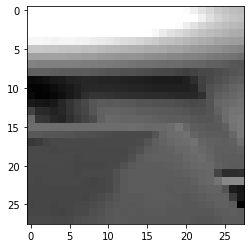

1/1 [==============================] - 0s 36ms/step
[[3.9096869e-07 3.2504420e-18 6.4603665e-30 1.3636949e-14 5.8936434e-10
  1.8365999e-14 2.1414667e-08 2.2369559e-08 1.1793531e-11 4.4364773e-25
  2.7363146e-08 7.8442218e-16 1.9290988e-10 4.0101143e-12 1.8215687e-12
  9.9356765e-01 4.5095161e-13 1.3777984e-20 5.5424647e-05 1.4393034e-07
  1.2672259e-21 1.5116612e-23 1.1943186e-22 6.3293839e-19 6.3763512e-03
  8.9000609e-25]]
p


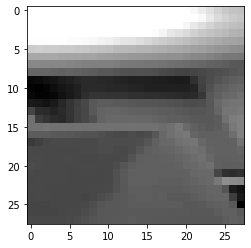

1/1 [==============================] - 0s 26ms/step
[[3.2225873e-06 2.2266339e-17 3.7849805e-29 6.2608230e-14 6.0131167e-09
  4.4064595e-14 1.0169181e-06 1.0005278e-06 1.6643784e-11 3.7129001e-24
  1.0456299e-07 3.5173717e-15 2.6493316e-10 3.5476561e-12 2.9605615e-12
  9.4978040e-01 4.8331360e-11 1.2992486e-19 7.7255638e-05 1.3681448e-05
  1.5263806e-20 1.1137957e-22 4.5459184e-22 5.3906626e-19 5.0123248e-02
  6.0230930e-24]]
p


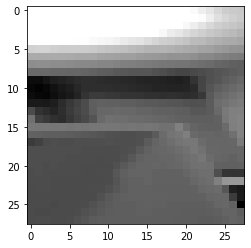

1/1 [==============================] - 0s 27ms/step
[[1.4943632e-05 8.8052066e-17 7.3514834e-29 2.7800464e-13 1.2573608e-08
  7.1695539e-14 1.8155690e-06 4.1843532e-06 4.9218248e-11 1.1423949e-23
  3.6007057e-07 8.4014843e-15 7.0430017e-10 7.4410981e-12 3.7787048e-12
  9.2951912e-01 4.7138510e-10 7.0552548e-20 1.1689977e-04 8.3122184e-05
  2.8661837e-20 1.1616655e-22 1.6172682e-21 1.5572017e-18 7.0259497e-02
  1.8281763e-23]]
p


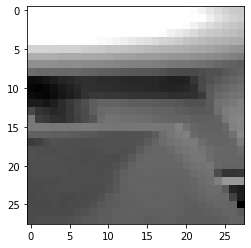

1/1 [==============================] - 0s 24ms/step
[[2.29214365e-05 9.65372582e-17 1.49468739e-28 1.44852107e-13
  2.35788349e-08 5.74770266e-14 7.42380234e-06 5.14123440e-06
  3.50788773e-11 1.17448625e-23 6.34214757e-07 7.99767323e-15
  3.45416973e-10 9.85106614e-12 1.19819215e-12 9.12944436e-01
  3.05101083e-10 9.38422188e-20 4.54254114e-05 3.13567492e-04
  3.25888773e-20 7.39756838e-23 5.14487317e-21 1.98941652e-18
  8.66604745e-02 1.70688658e-23]]
p


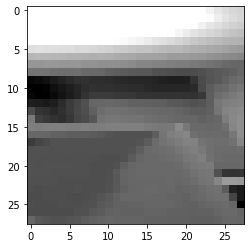

1/1 [==============================] - 0s 27ms/step
[[3.77969591e-05 1.08015455e-16 4.82440426e-29 1.07507590e-12
  3.75012066e-09 1.12683680e-13 1.52114808e-05 4.78225047e-05
  1.06051307e-10 5.29521305e-23 3.76815501e-06 1.13572147e-15
  1.49932822e-09 2.19412197e-11 5.76073954e-12 8.71641755e-01
  3.62505387e-10 3.18985821e-20 1.86455582e-04 2.77423393e-03
  1.30919078e-19 5.25958020e-23 8.22084647e-21 1.21468139e-17
  1.25292927e-01 6.44613965e-23]]
p


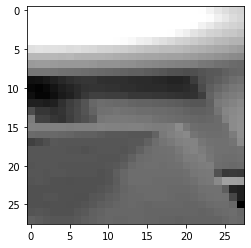

1/1 [==============================] - 0s 26ms/step
[[3.0042351e-05 2.4028752e-16 5.7693302e-29 1.4913875e-12 3.4520313e-09
  1.3727958e-13 2.4335766e-05 2.2889961e-05 9.1743287e-11 4.6154914e-23
  6.2393356e-06 6.1558855e-16 1.8916111e-09 3.2750847e-11 2.1346319e-12
  9.2256147e-01 9.4202202e-11 2.7452738e-20 8.4566767e-05 2.2570316e-03
  1.5474446e-19 2.2522182e-23 6.2059024e-21 2.0013680e-17 7.5013414e-02
  5.3968171e-23]]
p


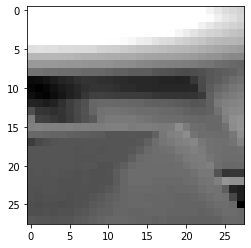

1/1 [==============================] - 0s 24ms/step
[[3.1054769e-05 6.2586411e-17 2.1056347e-29 3.6778837e-13 4.2058628e-09
  6.0713241e-14 2.4003262e-05 5.0284863e-05 1.0524454e-10 4.1282158e-23
  2.4699607e-06 2.9967626e-16 6.2613859e-10 1.5193961e-11 3.7412946e-12
  9.5285243e-01 5.6086434e-11 2.2095010e-20 8.0161190e-05 9.5256437e-03
  1.6415180e-19 2.3522404e-23 5.6468280e-21 7.7650306e-18 3.7433833e-02
  4.4788458e-23]]
p


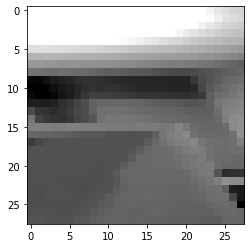

1/1 [==============================] - 0s 28ms/step
[[1.8650946e-05 3.8582897e-17 3.3126242e-29 3.0869177e-13 6.8030723e-09
  6.0581524e-14 1.9866860e-05 3.5825749e-05 4.2728196e-11 3.3028177e-23
  1.6945778e-06 4.1099198e-16 2.9491765e-10 6.1808865e-12 2.7195397e-12
  9.4724828e-01 7.3964425e-11 2.4870978e-20 2.7039549e-05 9.5811170e-03
  2.2753012e-19 3.5230534e-23 4.9977707e-21 3.2164972e-18 4.3067623e-02
  3.4888166e-23]]
p


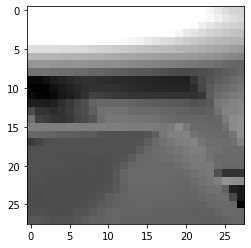

1/1 [==============================] - 0s 25ms/step
[[3.0950847e-05 5.0493603e-17 2.3661850e-29 1.8123777e-13 2.8005736e-09
  6.0438545e-14 6.2046665e-06 3.7215439e-05 5.9361065e-11 2.7434907e-23
  2.3424086e-06 1.4706541e-16 4.0426815e-10 1.0849392e-11 1.6531635e-12
  9.5145857e-01 3.9328249e-11 5.8141831e-21 4.8604037e-05 7.4516996e-03
  9.4524520e-20 2.2529323e-23 9.7784655e-21 3.1196128e-18 4.0964425e-02
  3.0214111e-23]]
p


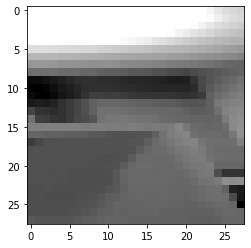

1/1 [==============================] - 0s 26ms/step
[[1.3670481e-05 2.7162035e-17 3.9924865e-29 1.4851186e-13 5.5093246e-09
  5.6133663e-14 1.3526996e-05 3.4560977e-05 2.3207698e-11 2.4006027e-23
  2.2319023e-06 4.9068486e-16 3.9830397e-10 4.3955278e-12 1.3129125e-12
  9.7589171e-01 7.0224555e-11 1.4000475e-20 3.0446545e-05 8.1606861e-03
  1.5805491e-19 3.6453764e-23 3.5446176e-21 2.3179528e-18 1.5853176e-02
  2.5704846e-23]]
p


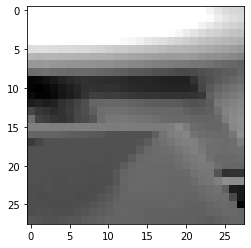

1/1 [==============================] - 0s 25ms/step
[[3.6737008e-05 3.6624954e-17 2.0187092e-29 1.6162919e-13 4.1682386e-09
  6.0655691e-14 1.8227132e-05 4.4809614e-05 4.0172931e-11 3.4435006e-23
  9.0613338e-07 3.0946796e-16 4.8376747e-10 5.9381900e-12 2.5312489e-12
  9.5678753e-01 6.2969741e-11 1.4500678e-20 2.9341634e-05 1.9651543e-02
  2.1296402e-19 2.0669347e-23 1.6265410e-20 3.6647013e-18 2.3430891e-02
  3.5367714e-23]]
p


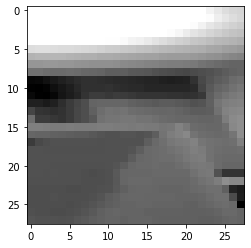

1/1 [==============================] - 0s 25ms/step
[[4.69243896e-05 1.94430788e-17 2.02219499e-29 8.77441904e-14
  3.85001275e-09 2.49694420e-14 1.70115745e-05 2.25778713e-05
  4.04278624e-11 3.20920891e-23 1.84005387e-06 1.35795740e-16
  6.45312859e-10 6.27878392e-12 2.18165503e-12 9.57314253e-01
  2.36755060e-11 1.49155786e-20 6.90458546e-05 7.84110092e-03
  1.70471339e-19 3.64717975e-23 1.28790915e-20 4.24612447e-18
  3.46871503e-02 3.28278249e-23]]
p


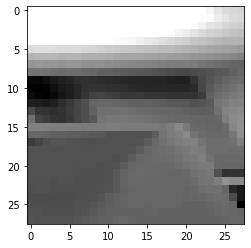

1/1 [==============================] - 0s 25ms/step
[[2.4754294e-05 1.6518463e-17 1.2097731e-29 9.6293287e-14 3.6159493e-09
  6.9069140e-14 1.0827758e-05 4.8159331e-05 5.7027060e-11 2.1652001e-23
  6.6133697e-07 1.6930851e-16 2.2342014e-10 3.8372552e-12 2.0849069e-12
  9.6404004e-01 6.8784617e-11 7.1096432e-21 3.5499626e-05 1.0363384e-02
  9.8587993e-20 2.9301582e-23 2.7071560e-21 1.2373216e-18 2.5476625e-02
  2.3199806e-23]]
p


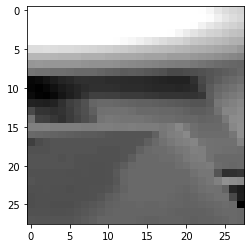

1/1 [==============================] - 0s 25ms/step
[[4.2558051e-05 1.9205620e-17 1.1973012e-29 1.7148986e-13 2.9076586e-09
  3.9355455e-14 3.5034097e-06 4.9086284e-05 7.8568131e-11 2.5749146e-23
  1.2237033e-06 1.4228111e-16 6.4280736e-10 4.6027826e-12 2.4542837e-12
  9.7595268e-01 9.4325089e-11 4.4075366e-21 6.4711581e-05 3.2363709e-03
  1.1531622e-19 2.4951121e-23 8.5233732e-21 4.9348210e-18 2.0649830e-02
  2.7332557e-23]]
p


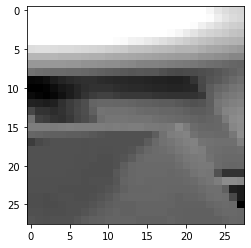

1/1 [==============================] - 0s 29ms/step
[[4.2059852e-05 2.3312153e-17 3.0514518e-29 2.0013062e-13 7.7337310e-09
  5.1206987e-14 2.0492354e-05 6.1051796e-05 7.0630647e-11 4.4685648e-23
  3.5567434e-06 2.8761544e-16 1.1932991e-09 5.9845167e-12 3.7352343e-12
  9.1968149e-01 9.2839916e-11 1.6246136e-20 8.4955056e-05 1.4019523e-02
  4.5268219e-19 4.4734428e-23 1.4272662e-20 6.8634083e-18 6.6086911e-02
  5.3101970e-23]]
p


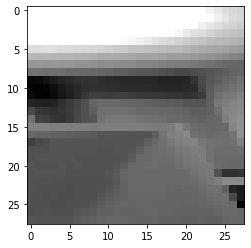

1/1 [==============================] - 0s 37ms/step
[[1.8831290e-05 2.0400114e-17 2.5941924e-29 2.5938320e-13 3.3113667e-09
  6.6208385e-14 1.2538553e-05 3.5284633e-05 4.8501467e-11 2.9007924e-23
  1.8259633e-06 5.1200865e-16 9.5668695e-10 7.3304383e-12 2.5675931e-12
  9.6914524e-01 7.6399498e-11 1.1402491e-20 5.4190190e-05 5.1450944e-03
  2.4025448e-19 1.7435782e-23 7.3670588e-21 8.0258804e-18 2.5587078e-02
  3.3236953e-23]]
p


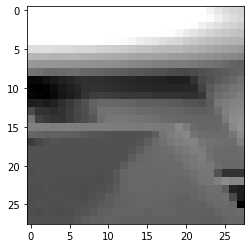

1/1 [==============================] - 0s 26ms/step
[[3.30676557e-05 2.72719016e-17 8.08590402e-30 2.36515695e-13
  4.38878534e-09 2.32740412e-14 1.42825174e-05 8.46000112e-05
  1.15038118e-10 3.15279179e-23 2.97501947e-06 1.33701424e-16
  2.52400878e-10 7.95592411e-12 3.56103536e-12 9.74575520e-01
  5.92500979e-11 4.88254908e-21 9.53863273e-05 1.14124632e-02
  1.23865385e-19 1.76280388e-23 8.19646726e-21 4.95481228e-18
  1.37817925e-02 3.49397886e-23]]
p


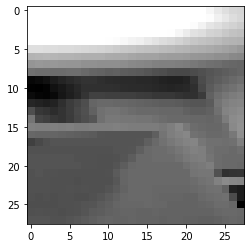

1/1 [==============================] - 0s 40ms/step
[[1.91823456e-05 3.57252689e-17 1.31997882e-29 3.32576577e-13
  5.02383068e-09 7.91676159e-14 1.26062687e-05 5.94903322e-05
  6.60302577e-11 3.24156514e-23 1.92049583e-06 1.22999282e-16
  5.42288103e-10 1.20512255e-11 4.34688613e-12 9.68450189e-01
  6.00081651e-11 5.28483835e-21 5.33502898e-05 5.21639641e-03
  1.53289919e-19 1.41513032e-23 1.47676846e-20 9.35247045e-18
  2.61869077e-02 3.87594752e-23]]
p


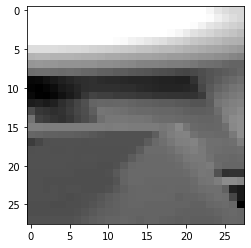

1/1 [==============================] - 0s 27ms/step
[[1.94694821e-05 1.52419724e-17 1.49472476e-29 9.19422145e-14
  1.73922154e-09 3.03221566e-14 7.20465641e-06 5.84191694e-05
  3.50532173e-11 2.60439651e-23 1.75508978e-06 2.33231290e-16
  5.70489378e-10 4.23459054e-12 2.49772989e-12 9.42656517e-01
  7.53118887e-11 1.17973113e-20 3.78932236e-05 8.71198811e-03
  1.75111577e-19 3.65563729e-23 1.04799446e-20 2.71664518e-18
  4.85067442e-02 2.76656549e-23]]
p


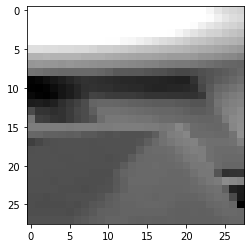

1/1 [==============================] - 0s 27ms/step
[[7.2496281e-05 3.0482343e-17 2.6286287e-29 2.2064887e-13 4.5222865e-09
  1.0432918e-13 1.8779043e-05 9.7409749e-05 1.3526970e-10 4.5548201e-23
  1.9450508e-06 3.1134718e-16 7.2021228e-10 8.1230647e-12 5.4172825e-12
  9.2168295e-01 5.1013724e-11 7.0394880e-21 6.4434098e-05 2.3537545e-02
  1.8718243e-19 3.0979644e-23 2.7481580e-20 5.0333030e-18 5.4524306e-02
  5.0447276e-23]]
p


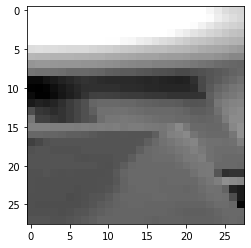

1/1 [==============================] - 0s 29ms/step
[[3.13058772e-05 1.68541243e-17 7.32920916e-30 1.45996984e-13
  2.85423263e-09 3.93927072e-14 5.98133056e-06 6.83422768e-05
  6.67510283e-11 2.88361351e-23 1.55539078e-06 1.03579735e-16
  7.98626831e-10 4.76414177e-12 4.25594412e-12 9.71610248e-01
  9.56939736e-11 5.09025664e-21 7.95585947e-05 5.12371445e-03
  1.76440287e-19 1.84435490e-23 7.50771661e-21 3.70364494e-18
  2.30792090e-02 2.94825972e-23]]
p


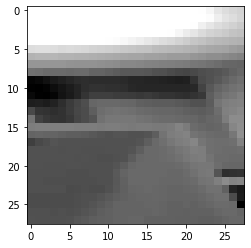

1/1 [==============================] - 0s 26ms/step
[[3.0867381e-05 8.8049480e-18 1.3028784e-29 6.0137937e-14 3.8591512e-09
  8.8586644e-15 7.2427129e-06 6.1713487e-05 2.2497329e-11 2.3801327e-23
  3.4764507e-06 1.4826404e-16 3.7676959e-10 4.1485660e-12 1.5519307e-12
  9.8199028e-01 5.6679987e-11 9.2576374e-21 3.1642292e-05 6.1401525e-03
  1.9977121e-19 2.1551320e-23 1.4255392e-20 1.9329362e-18 1.1734574e-02
  2.3851042e-23]]
p


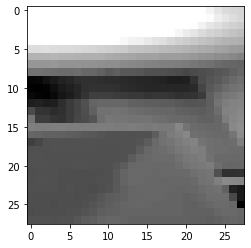

1/1 [==============================] - 0s 26ms/step
[[3.7281327e-05 3.4227936e-17 4.9054203e-29 8.6521963e-14 2.5133666e-09
  7.6764394e-14 1.5927188e-05 5.5835069e-05 4.0927796e-11 3.4178639e-23
  3.1623067e-06 2.7587937e-16 4.2383058e-10 7.5147432e-12 2.3648939e-12
  9.2613792e-01 2.7710671e-11 9.4166814e-21 6.0557086e-05 1.9088212e-02
  1.7390707e-19 3.5275698e-23 1.7458033e-20 3.4191372e-18 5.4601114e-02
  3.7408097e-23]]
p


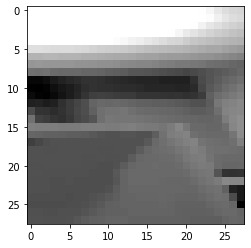

1/1 [==============================] - 0s 26ms/step
[[2.01487401e-05 1.22893595e-17 2.95401271e-29 9.16214533e-14
  3.70607545e-09 3.93201639e-14 2.23360603e-05 7.77303067e-05
  3.93467064e-11 4.19982446e-23 2.41955490e-06 6.46508485e-16
  4.89074836e-10 5.92151458e-12 3.15588311e-12 9.28574443e-01
  9.89993226e-11 3.37976111e-20 3.71158712e-05 1.16596567e-02
  5.23320157e-19 5.31716231e-23 1.10387665e-20 2.99411092e-18
  5.96060529e-02 4.40655272e-23]]
p


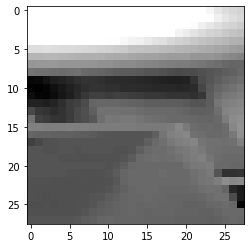

1/1 [==============================] - 0s 28ms/step
[[3.8124708e-05 1.8920234e-17 1.0603514e-29 1.6638969e-13 2.4617037e-09
  4.1499749e-14 4.9224172e-06 4.9535236e-05 9.3876906e-11 3.3770580e-23
  1.8577866e-06 1.1408839e-16 1.2528243e-09 4.7799507e-12 4.4579115e-12
  9.6513259e-01 1.3043515e-10 5.0634238e-21 6.3700230e-05 5.0282553e-03
  1.9762446e-19 2.1383829e-23 6.2986484e-21 4.9617279e-18 2.9681008e-02
  3.3981351e-23]]
p


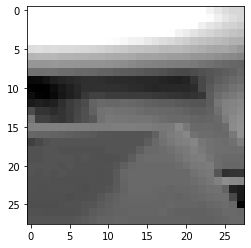

1/1 [==============================] - 0s 25ms/step
[[3.9696715e-05 2.6941456e-17 2.3713470e-29 1.1704727e-13 2.4561848e-09
  6.9886385e-14 6.8082186e-06 5.9226779e-05 5.3726492e-11 3.1689524e-23
  1.3955290e-06 1.7534424e-16 9.0487157e-10 4.3254332e-12 1.6758103e-12
  9.5419645e-01 9.7945388e-11 5.9531353e-21 4.6756359e-05 5.2567581e-03
  2.3883261e-19 2.2936304e-23 2.1855887e-20 4.8595384e-18 4.0392801e-02
  3.1749055e-23]]
p


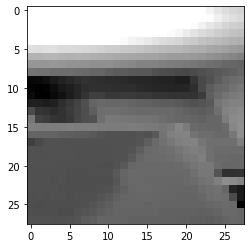

1/1 [==============================] - 0s 30ms/step
[[1.8720915e-05 4.9714230e-17 2.4716870e-29 1.3485658e-13 1.7640994e-09
  6.9677289e-14 9.2751907e-06 1.8784725e-05 3.2187707e-11 2.5085695e-23
  6.1094602e-07 2.9604429e-16 2.9233790e-10 4.7110553e-12 1.9489076e-12
  9.5006311e-01 2.6565665e-11 1.4017225e-20 4.4033044e-05 3.2079539e-03
  7.6995858e-20 1.2223180e-23 1.9107313e-20 6.2522314e-18 4.6637479e-02
  2.5617769e-23]]
p


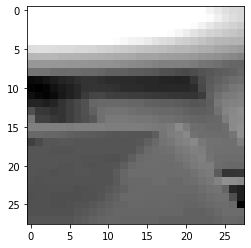

1/1 [==============================] - 0s 33ms/step
[[3.1283835e-05 1.8957668e-17 1.0188634e-29 1.9541664e-13 5.0061653e-09
  4.7965606e-14 1.5536400e-05 1.0239375e-04 6.4754008e-11 3.4613279e-23
  1.9498750e-06 2.1475311e-16 5.4355892e-10 5.4091384e-12 3.0079582e-12
  9.6758455e-01 1.1808524e-10 7.7290238e-21 7.6770251e-05 6.8399878e-03
  1.6771410e-19 2.4525769e-23 6.4344813e-21 3.0822540e-18 2.5347508e-02
  3.4801019e-23]]
p


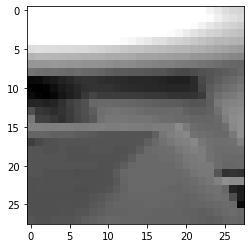

1/1 [==============================] - 0s 24ms/step
[[3.4328212e-05 2.2064935e-17 2.5690115e-29 1.2170991e-13 4.2085841e-09
  5.2657016e-14 1.9430823e-05 4.4105425e-05 3.3291019e-11 3.2192738e-23
  1.6393606e-06 2.7180136e-16 6.8784678e-10 5.3853285e-12 2.5277911e-12
  9.6824741e-01 3.9719013e-11 9.9586059e-21 4.3119526e-05 1.8421564e-02
  2.0823172e-19 2.6000557e-23 6.1234169e-21 3.7836598e-18 1.3188396e-02
  3.3514513e-23]]
p


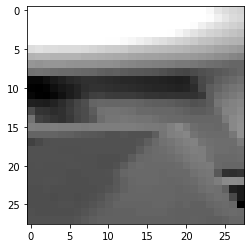

1/1 [==============================] - 0s 25ms/step
[[3.6012560e-05 2.3377941e-17 1.6305091e-29 8.0259679e-14 3.2645495e-09
  3.2162349e-14 9.7695647e-06 1.2999563e-04 5.7910048e-11 4.0890223e-23
  3.0950803e-06 2.5956719e-16 7.6806372e-10 6.5118427e-12 2.3975021e-12
  9.5793027e-01 1.4568724e-10 1.2321452e-20 6.4504216e-05 1.0356263e-02
  2.4270270e-19 3.2848200e-23 2.1561724e-20 2.2148309e-18 3.1470098e-02
  4.1237817e-23]]
p


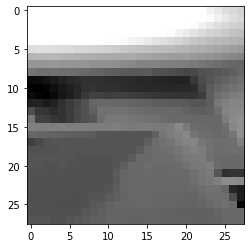

1/1 [==============================] - 0s 25ms/step
[[3.58207435e-05 2.76537811e-17 2.01371097e-29 1.06452492e-13
  2.97287928e-09 5.99838308e-14 6.88652153e-06 7.42754128e-05
  4.75855987e-11 3.29306577e-23 1.70392082e-06 1.59363757e-16
  7.59930341e-10 4.41371592e-12 2.79824406e-12 9.57525611e-01
  4.61820165e-11 5.96384176e-21 3.42412022e-05 1.69308763e-02
  1.85378271e-19 2.35312459e-23 1.27026516e-20 3.19162283e-18
  2.53904779e-02 3.24347103e-23]]
p


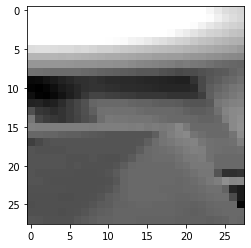

1/1 [==============================] - 0s 27ms/step
[[4.3932760e-05 2.2282168e-17 1.4880225e-29 1.3507785e-13 4.6831961e-09
  6.9048018e-14 1.4518537e-05 5.9722624e-05 9.1216208e-11 3.9454238e-23
  1.6098846e-06 1.6091061e-16 6.5354538e-10 5.0625372e-12 4.0912833e-12
  9.4578993e-01 3.8100807e-11 8.2938920e-21 5.0711165e-05 2.2482002e-02
  1.7360171e-19 3.2257431e-23 1.1116418e-20 2.8334542e-18 3.1557553e-02
  3.9907284e-23]]
p


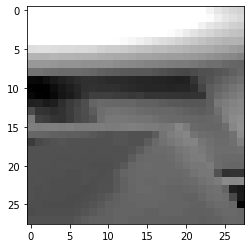

1/1 [==============================] - 0s 26ms/step
[[4.1767635e-05 1.9893813e-17 3.8215834e-29 1.1336840e-13 2.4570079e-09
  9.7872556e-14 1.2340730e-05 4.7514251e-05 5.0732224e-11 3.6916885e-23
  2.4771587e-06 2.1312283e-16 1.2972516e-09 6.6496591e-12 2.3583754e-12
  9.2735738e-01 3.5063657e-11 8.0218562e-21 3.7332193e-05 1.4494450e-02
  2.6090313e-19 3.1888992e-23 1.4093893e-20 4.9158620e-18 5.8006618e-02
  3.6996115e-23]]
p


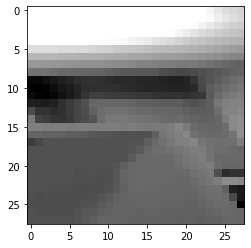

1/1 [==============================] - 0s 25ms/step
[[2.4673931e-05 4.2734324e-17 2.1467553e-29 2.2324606e-13 4.1713983e-09
  5.9364324e-14 6.6498219e-06 3.4496439e-05 5.0587989e-11 2.6872247e-23
  1.4112630e-06 2.0237547e-16 5.9714222e-10 9.4116815e-12 2.4433741e-12
  9.7934878e-01 4.0954122e-11 1.2079943e-20 3.3023793e-05 7.0646275e-03
  1.0001076e-19 1.2049687e-23 7.1142840e-21 5.1514976e-18 1.3486402e-02
  2.6649296e-23]]
p


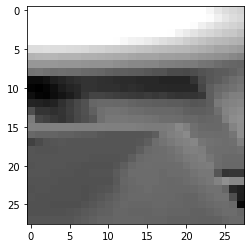

1/1 [==============================] - 0s 27ms/step
[[5.0197286e-05 3.6761207e-17 1.2975002e-29 1.9565256e-13 4.1636206e-09
  9.0129828e-14 9.3346471e-06 3.9210150e-05 8.5770821e-11 3.3105390e-23
  2.0620807e-06 1.3029945e-16 6.3379557e-10 4.2770596e-12 3.8885175e-12
  9.5973170e-01 6.6991045e-11 3.5262588e-21 9.9894271e-05 1.0209327e-02
  1.6599163e-19 1.9915423e-23 1.5929610e-20 6.0580512e-18 2.9858269e-02
  3.6028344e-23]]
p


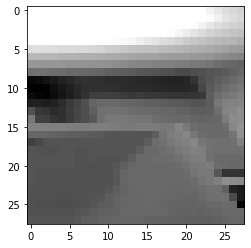

1/1 [==============================] - 0s 27ms/step
[[3.14545105e-05 3.32360409e-17 1.18174693e-29 6.91886259e-14
  4.05926182e-09 2.11445275e-14 4.83067515e-06 8.88307914e-05
  4.55251323e-11 2.78184383e-23 2.85096030e-06 9.31473662e-17
  3.31832700e-10 4.79306395e-12 1.93925626e-12 9.75186527e-01
  1.11378164e-10 7.44046214e-21 4.87970647e-05 7.80421542e-03
  2.36005149e-19 2.81032234e-23 1.24980383e-20 2.48906401e-18
  1.68326069e-02 2.77059688e-23]]
p


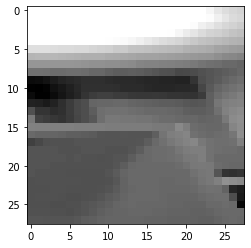

1/1 [==============================] - 0s 49ms/step
[[9.48575471e-05 4.05548787e-17 6.19293246e-29 2.66470656e-13
  6.57224453e-09 7.43379967e-14 1.26035557e-05 4.31207118e-05
  1.04923750e-10 5.11808191e-23 8.77232469e-06 1.89344594e-16
  1.51733703e-09 1.87489295e-11 4.41743430e-12 9.45519328e-01
  1.67958217e-11 5.49893354e-21 1.11103705e-04 1.20757995e-02
  1.51031625e-19 3.88582658e-23 5.42658593e-20 8.73151671e-18
  4.21343781e-02 5.37609654e-23]]
p


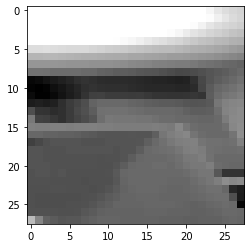

1/1 [==============================] - 0s 30ms/step
[[6.32790106e-05 4.19920852e-17 9.25755329e-30 1.53670045e-13
  3.65396979e-09 2.67086886e-14 9.51671973e-06 1.14828748e-04
  6.82702853e-11 3.03569832e-23 3.28934470e-06 1.10856191e-16
  4.40152886e-10 5.74919409e-12 3.04531292e-12 9.68603492e-01
  5.86332857e-11 2.70869500e-21 8.01263232e-05 1.57026704e-02
  3.41753780e-19 1.10192596e-23 1.32293128e-20 7.94853402e-18
  1.54228797e-02 3.45243871e-23]]
p


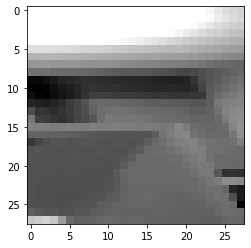

1/1 [==============================] - 0s 26ms/step
[[2.8570040e-04 1.5593731e-17 1.5892341e-29 1.3476988e-13 3.8886143e-09
  7.3961799e-15 5.8200410e-05 8.9077791e-04 4.7870329e-11 2.2854328e-23
  1.5419362e-06 1.1584526e-16 1.0065634e-09 6.8845459e-12 4.3428663e-12
  8.0929220e-01 4.0488801e-10 5.4143679e-20 1.9368250e-04 1.5840964e-01
  2.6927918e-18 1.4792277e-22 6.8798915e-22 3.2664918e-18 3.0868370e-02
  2.7247139e-23]]
p


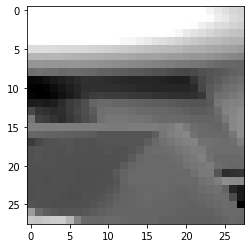

1/1 [==============================] - 0s 27ms/step
[[1.8638621e-04 6.3720727e-17 2.6627810e-30 2.8016660e-13 1.2982149e-09
  1.8283991e-14 1.2241483e-04 1.5016469e-04 2.2315004e-11 1.3589622e-23
  5.0654222e-07 2.2982006e-17 1.6300323e-09 6.4321543e-12 3.3266564e-12
  8.8070172e-01 3.1007466e-10 8.3173011e-20 2.0189860e-04 8.7617911e-02
  1.1285971e-17 2.1213667e-23 2.1754402e-21 4.5794529e-17 3.1019000e-02
  1.6193763e-23]]
p


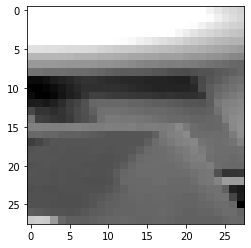

1/1 [==============================] - 0s 27ms/step
[[6.10473799e-05 9.58572430e-17 7.35521899e-30 1.07072619e-12
  1.66694458e-09 1.28025896e-14 1.27501553e-05 1.09856162e-04
  5.07299376e-11 1.50245375e-23 9.55674636e-07 1.28761899e-16
  7.11737835e-10 1.08006165e-11 3.08829590e-12 9.62199807e-01
  1.71602788e-10 1.92252866e-20 1.46323189e-04 4.08337824e-03
  1.59683327e-19 1.32862462e-23 4.27590076e-22 1.58665782e-17
  3.33858542e-02 2.09371526e-23]]
p


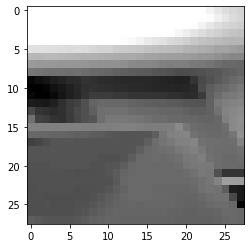

1/1 [==============================] - 0s 29ms/step
[[1.32593077e-05 4.93413070e-17 1.55924326e-29 5.30164346e-13
  3.30734773e-09 4.55293355e-14 2.82493202e-05 1.89963976e-05
  3.99933836e-11 2.47273342e-23 2.79309279e-06 4.86633504e-16
  1.23616029e-09 1.18095351e-11 1.45231158e-12 9.64752614e-01
  1.08501375e-10 4.45072703e-20 2.20744896e-05 3.25340591e-03
  1.34227800e-19 1.83881379e-23 1.72478649e-21 5.78585790e-18
  3.19085270e-02 2.89277156e-23]]
p


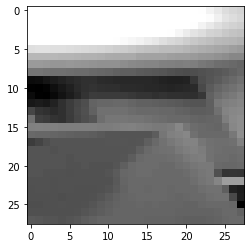

1/1 [==============================] - 0s 35ms/step
[[1.49300768e-05 3.69424883e-17 9.31381828e-30 8.49701169e-13
  5.63535751e-09 4.53569711e-14 1.18259568e-05 2.79224896e-05
  4.64201663e-11 2.45798424e-23 2.05152810e-06 2.63640778e-16
  2.54406429e-09 1.33094724e-11 1.92656503e-12 9.77036417e-01
  9.56118448e-11 2.38648392e-20 3.33844400e-05 1.69328577e-03
  1.66017320e-19 1.50043348e-23 1.06450774e-21 1.02451447e-17
  2.11802013e-02 2.79864846e-23]]
p


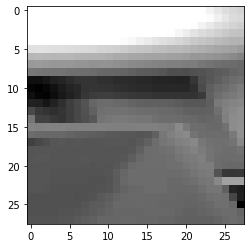

1/1 [==============================] - 0s 27ms/step
[[4.06694817e-05 1.53678591e-16 3.63245434e-29 1.10665426e-12
  5.58451196e-09 1.18313372e-13 1.61943954e-05 1.65824986e-05
  8.44886314e-11 3.81746484e-23 2.20785364e-06 3.73119443e-16
  1.57848901e-09 1.66079112e-11 2.21484680e-12 9.68126833e-01
  5.92565719e-11 8.60621166e-21 2.91965425e-05 7.11676059e-03
  9.49153499e-20 1.60496938e-23 6.04401002e-21 1.11513095e-17
  2.46514697e-02 3.86626725e-23]]
p


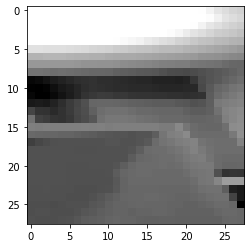

1/1 [==============================] - 0s 33ms/step
[[2.4397234e-05 7.2377662e-17 1.1000139e-29 7.5490455e-13 2.8779306e-09
  6.1320388e-14 8.4943058e-06 2.0952873e-05 9.8673660e-11 2.3671059e-23
  1.4872945e-06 2.7318170e-16 1.4545527e-09 7.1852810e-12 1.4576193e-12
  9.6280336e-01 1.7926137e-10 1.4289981e-20 3.1804491e-05 2.0634895e-03
  1.4098155e-19 1.1264729e-23 4.0233318e-21 9.8528138e-18 3.5045899e-02
  2.5759661e-23]]
p


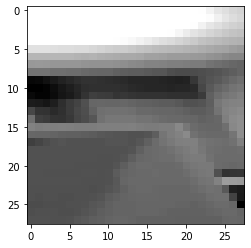

1/1 [==============================] - 0s 33ms/step
[[6.8420042e-05 1.9532618e-16 9.9003265e-29 5.6132090e-13 7.0885364e-09
  1.4379498e-13 2.9300125e-05 1.7122751e-05 8.3071126e-11 5.2022357e-23
  4.1676517e-06 7.0969815e-16 2.3391085e-09 1.4752413e-11 1.8876678e-12
  8.3997250e-01 5.7389121e-11 3.9327662e-20 4.8081056e-05 6.3325707e-03
  1.8969587e-19 2.9216436e-23 2.2748086e-20 1.3256363e-17 1.5352778e-01
  5.9326480e-23]]
p


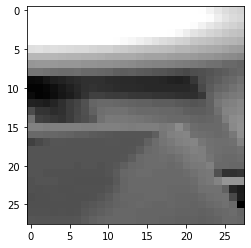

1/1 [==============================] - 0s 26ms/step
[[2.20865968e-05 9.05341041e-17 1.96570867e-29 3.69448910e-13
  2.55689780e-09 6.43688187e-14 8.65250149e-06 2.06365057e-05
  6.01252451e-11 2.39067689e-23 2.77369418e-06 2.25245595e-16
  5.60688995e-10 1.09023571e-11 1.50885370e-12 9.67805624e-01
  3.44243765e-11 8.04869193e-21 4.10371504e-05 2.62405910e-03
  7.40287874e-20 1.27488655e-23 5.79358513e-21 4.89230059e-18
  2.94752084e-02 2.53614994e-23]]
p


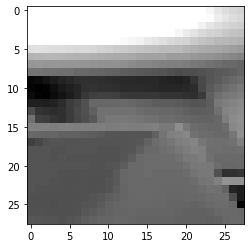

1/1 [==============================] - 0s 38ms/step
[[2.3033690e-05 5.7675956e-17 2.7970756e-29 2.9539701e-13 4.3937445e-09
  7.4284153e-14 8.0597401e-06 2.0887681e-05 8.0660333e-11 2.1795684e-23
  1.1549565e-06 1.3283745e-16 3.9327600e-10 8.2221834e-12 1.2179928e-12
  9.7812325e-01 1.8826083e-11 3.4680290e-21 2.8860151e-05 6.1497786e-03
  5.9201491e-20 9.4374294e-24 1.2399748e-20 4.6966467e-18 1.5644934e-02
  2.3215108e-23]]
p


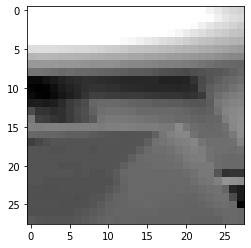

1/1 [==============================] - 0s 26ms/step
[[4.6332058e-05 6.2054249e-17 3.8560274e-29 3.5283549e-13 5.0867861e-09
  1.0857258e-13 2.0662354e-05 3.2624954e-05 5.3815823e-11 4.3018699e-23
  3.6008933e-06 4.3850930e-16 1.8540857e-09 8.4759300e-12 3.7671155e-12
  9.3240196e-01 8.2806956e-11 1.2752855e-20 5.9382197e-05 1.0662438e-02
  2.3963024e-19 3.6449249e-23 1.2414456e-20 7.0721237e-18 5.6772836e-02
  4.7453802e-23]]
p


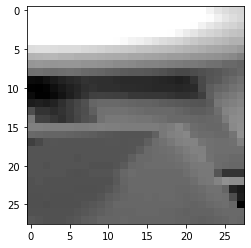

1/1 [==============================] - 0s 35ms/step
[[4.65030316e-05 3.76697091e-17 2.60691079e-29 9.89307919e-14
  3.87207510e-09 7.80039417e-14 1.01720025e-05 4.55618501e-05
  5.40446091e-11 3.08857378e-23 9.65342110e-07 3.29590552e-16
  1.63885128e-10 3.26966470e-12 2.23372753e-12 9.40870106e-01
  6.53084600e-11 8.02565769e-21 4.31610897e-05 1.32988356e-02
  1.54914217e-19 2.48009191e-23 1.75097301e-20 2.65626410e-18
  4.56847027e-02 3.21288279e-23]]
p


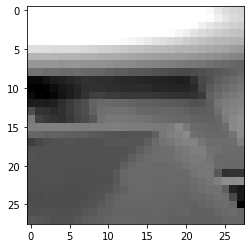

1/1 [==============================] - 0s 27ms/step
[[3.3324461e-05 6.9055473e-17 3.2464995e-29 2.2034566e-13 4.6775215e-09
  6.7214965e-14 2.1494090e-05 6.4643675e-05 8.9887431e-11 4.7512565e-23
  5.1781349e-06 4.8066557e-16 4.1107989e-10 9.9069260e-12 2.9659586e-12
  9.2642236e-01 1.5884405e-10 1.1953968e-20 7.5597032e-05 7.6252162e-03
  3.4329037e-19 3.4674451e-23 2.0456845e-20 6.4324034e-18 6.5752186e-02
  5.3337145e-23]]
p


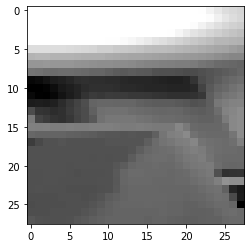

1/1 [==============================] - 0s 27ms/step
[[2.4363359e-05 6.1370608e-17 1.8375868e-29 3.6506610e-13 2.0894164e-09
  4.9609913e-14 2.0585876e-05 2.5482590e-05 6.8383542e-11 3.0601675e-23
  2.9747550e-06 5.7099084e-16 7.9487028e-10 1.5635744e-11 4.2153329e-12
  9.6815848e-01 7.7405554e-11 2.3974528e-20 6.3443076e-05 2.9388412e-03
  1.6761269e-19 1.5894059e-23 2.7267082e-21 1.1180085e-17 2.8765744e-02
  3.3541615e-23]]
p


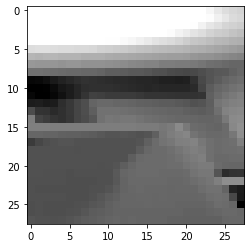

1/1 [==============================] - 0s 45ms/step
[[2.7292286e-05 2.0087289e-17 1.1220867e-29 1.3014503e-13 2.7192573e-09
  3.7808610e-14 6.5670301e-06 5.0558814e-05 8.3993312e-11 3.1214415e-23
  3.1628504e-06 1.7291777e-16 1.5924549e-09 6.0927808e-12 2.7061474e-12
  9.5998704e-01 1.8859458e-10 8.4735162e-21 6.2406325e-05 4.9092867e-03
  1.9834017e-19 2.7619649e-23 1.0026073e-20 4.4706052e-18 3.4953587e-02
  3.4518408e-23]]
p


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

: 

In [32]:
# 导入工具库
import keras
import numpy as np
from PIL import Image
import string
import pandas as pd
import tensorflow as tf

# 导入OpenCV
import cv2
from matplotlib import pyplot

# 设定维度
dim = (28, 28) # 图像维度
letters = list(string.ascii_lowercase) # 识别的字母

x0 = 1920 // 2 - 400 # 400px left of center
x1 = 1920 // 2 + 400 # 400px right of center
y0 = 1080 // 2 - 400 # 400px right of center
y1 = 1080 // 2 + 400 # 400px right of center

# 初始化视频捕获
video=cv2.VideoCapture(0)

cv2.namedWindow('Webcam') # 构建1个窗口
cv2.moveWindow('Webcam',40,30) # 放置窗口

while video.isOpened(): # 只要没有关掉实时摄像头
    ret,capture = video.read() # 抓取每个视频帧
    cropped = capture[y0:y1, x0:x1] # 截取
    img = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) # 转成灰度图
    img = cv2.GaussianBlur(img, (5, 5), 0) # 图像平滑
    img = cv2.resize(img, dim) # 图像大小缩放
    pyplot.imshow(img, cmap='gray') # 可视化展示图片
    pyplot.show() # 展示
    img = np.reshape(img, (1,img.shape[0],img.shape[1],1))
    img = tf.cast(img, tf.float32)
    pred=model.predict(img)

    # 可视化实时效果
    cv2.rectangle(capture, (x0,y0),(x1,y1),(255,0,0),2) # 为图片添加矩形框
    cv2.putText(capture,'{} res50'.format(letters[np.argmax(pred[0])]),(x0+25,y0+50),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),1) # 预测字母
    cv2.imshow('Webcam', capture) # 展示视频
    
    # 结果输出
    print(pred)
    print(letters[np.argmax(pred[0])])
    
    # 退出视频输入
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows()